In [85]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

## Import dependencies

In [87]:
import pandas as pd
import seaborn as sns
from IPython.display import display

from configs import config
from utils.data_viz_utils import create_average_metrics_df, visualize_fairness_metrics_for_prediction_metric

sns.set_theme(style="whitegrid")

## Create average metrics files

In [88]:
STATE = config.DATASET_CONFIG['state']
YEAR = config.DATASET_CONFIG['year']
DATASET_NAME = f"Folktables_{STATE}_{YEAR}"

MODELS_NAMES = [model_config['model_name'] for model_config in config.MODELS_CONFIG]

In [89]:
models_average_results_dct = create_average_metrics_df(DATASET_NAME, MODELS_NAMES)

File with average metrics for LogisticRegression is created
File with average metrics for DecisionTreeClassifier is created
File with average metrics for RandomForestClassifier is created
File with average metrics for XGBClassifier is created
File with average metrics for KNeighborsClassifier is created
File with average metrics for MLPClassifier_1L_100 is created
File with average metrics for MLPClassifier_3L_100_50_100 is created


## Visualize average metrics

### Overall metrics visualizations

In [90]:
def visualize_overall_metrics(models_average_results_dct, metrics_names, x_label="Prediction Metrics"):
    overall_metrics_df = pd.DataFrame()
    for model_name in models_average_results_dct.keys():
        model_average_results_df = models_average_results_dct[model_name].reset_index().copy(deep=True)
        model_average_results_df = model_average_results_df.loc[model_average_results_df['index'].isin(metrics_names)]
        overall_model_metrics_df = pd.DataFrame()
        overall_model_metrics_df['overall'] = model_average_results_df['overall']
        overall_model_metrics_df['metric'] = model_average_results_df['index']
        overall_model_metrics_df['model_name'] = model_name
        overall_metrics_df = pd.concat([overall_metrics_df, overall_model_metrics_df])

    # Draw a nested barplot by species and sex
    g = sns.catplot(
        data=overall_metrics_df, kind="bar",
        x="overall", y="metric", hue="model_name",
        errorbar="sd", palette="bright", alpha=.8, height=6
    )
    g.despine(left=True)
    g.set_axis_labels("", x_label)
    g.legend.set_title("")


def overall_metric_comparison(prediction_metric_name, dataset_name, models_average_results_dct):
    comparison_df = pd.DataFrame(columns=('Dataset_Name', 'Metric_Name', 'Model_Name', 'Metric_Value'))
    for idx, model_name in enumerate(models_average_results_dct.keys()):
        model_average_results_df = models_average_results_dct[model_name]
        comparison_df.loc[idx] = [dataset_name, prediction_metric_name, model_name, model_average_results_df['overall'].loc[prediction_metric_name]]

    return comparison_df.sort_values(by=['Metric_Value'], ascending=False, axis=0)

In [91]:
def display_all_overall_metrics(dataset_name, model_names, models_average_results_dct):
    overall_metrics = list(models_average_results_dct[list(models_average_results_dct.keys())[0]].index)

    for overall_metric in overall_metrics:
        comparison_df = overall_metric_comparison(overall_metric, dataset_name, models_average_results_dct)
        print('#' * 30, f' {overall_metric} Comparison ', '#' * 30)
        display(comparison_df)

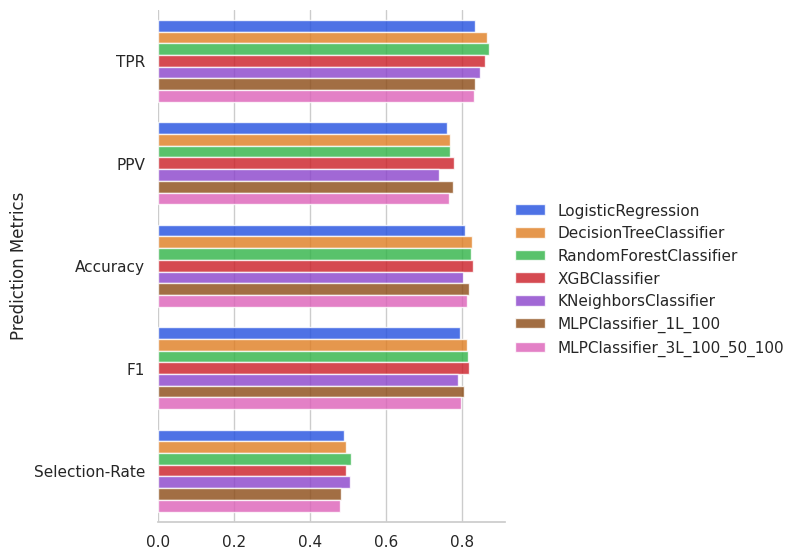

In [92]:
visualize_overall_metrics(models_average_results_dct,
                          metrics_names=['TPR', 'PPV', 'Accuracy', 'F1', 'Selection-Rate'])

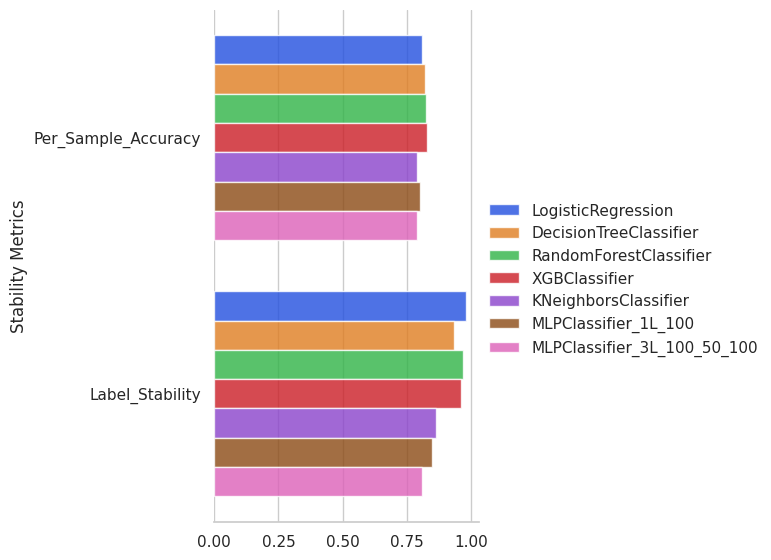

In [93]:
visualize_overall_metrics(models_average_results_dct,
                          metrics_names=['Per_Sample_Accuracy', 'Label_Stability'],
                          x_label="Stability Metrics")

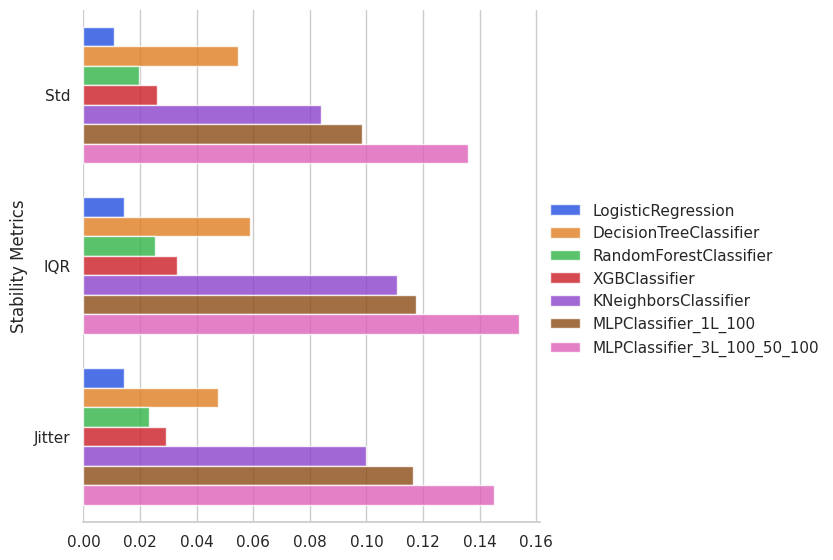

In [94]:
visualize_overall_metrics(models_average_results_dct,
                          metrics_names=['Std', 'IQR', 'Jitter'],
                          x_label="Stability Metrics")

In [95]:
display_all_overall_metrics(DATASET_NAME, MODELS_NAMES, models_average_results_dct)

##############################  General_Ensemble_Accuracy Comparison  ##############################


Dataset_Name                Metric_Name                   Model_Name  \
3  Folktables_GA_2018  General_Ensemble_Accuracy                XGBClassifier   
1  Folktables_GA_2018  General_Ensemble_Accuracy       DecisionTreeClassifier   
2  Folktables_GA_2018  General_Ensemble_Accuracy       RandomForestClassifier   
5  Folktables_GA_2018  General_Ensemble_Accuracy         MLPClassifier_1L_100   
6  Folktables_GA_2018  General_Ensemble_Accuracy  MLPClassifier_3L_100_50_100   
0  Folktables_GA_2018  General_Ensemble_Accuracy           LogisticRegression   
4  Folktables_GA_2018  General_Ensemble_Accuracy         KNeighborsClassifier   

   Metric_Value  
3        0.8272  
1        0.8254  
2        0.8236  
5        0.8183  
6        0.8133  
0        0.8069  
4        0.8014

##############################  Mean Comparison  ##############################


Dataset_Name Metric_Name                   Model_Name  Metric_Value
5  Folktables_GA_2018        Mean         MLPClassifier_1L_100        0.5559
3  Folktables_GA_2018        Mean                XGBClassifier        0.5538
1  Folktables_GA_2018        Mean       DecisionTreeClassifier        0.5537
2  Folktables_GA_2018        Mean       RandomForestClassifier        0.5532
6  Folktables_GA_2018        Mean  MLPClassifier_3L_100_50_100        0.5532
0  Folktables_GA_2018        Mean           LogisticRegression        0.5529
4  Folktables_GA_2018        Mean         KNeighborsClassifier        0.5398

##############################  Std Comparison  ##############################


Dataset_Name Metric_Name                   Model_Name  Metric_Value
6  Folktables_GA_2018         Std  MLPClassifier_3L_100_50_100        0.1360
5  Folktables_GA_2018         Std         MLPClassifier_1L_100        0.0983
4  Folktables_GA_2018         Std         KNeighborsClassifier        0.0841
1  Folktables_GA_2018         Std       DecisionTreeClassifier        0.0546
3  Folktables_GA_2018         Std                XGBClassifier        0.0261
2  Folktables_GA_2018         Std       RandomForestClassifier        0.0198
0  Folktables_GA_2018         Std           LogisticRegression        0.0108

##############################  IQR Comparison  ##############################


Dataset_Name Metric_Name                   Model_Name  Metric_Value
6  Folktables_GA_2018         IQR  MLPClassifier_3L_100_50_100        0.1537
5  Folktables_GA_2018         IQR         MLPClassifier_1L_100        0.1174
4  Folktables_GA_2018         IQR         KNeighborsClassifier        0.1109
1  Folktables_GA_2018         IQR       DecisionTreeClassifier        0.0587
3  Folktables_GA_2018         IQR                XGBClassifier        0.0330
2  Folktables_GA_2018         IQR       RandomForestClassifier        0.0253
0  Folktables_GA_2018         IQR           LogisticRegression        0.0144

##############################  Entropy Comparison  ##############################


Dataset_Name Metric_Name                   Model_Name  Metric_Value
6  Folktables_GA_2018     Entropy  MLPClassifier_3L_100_50_100        0.1981
1  Folktables_GA_2018     Entropy       DecisionTreeClassifier        0.0784
0  Folktables_GA_2018     Entropy           LogisticRegression        0.0000
2  Folktables_GA_2018     Entropy       RandomForestClassifier        0.0000
3  Folktables_GA_2018     Entropy                XGBClassifier        0.0000
4  Folktables_GA_2018     Entropy         KNeighborsClassifier        0.0000
5  Folktables_GA_2018     Entropy         MLPClassifier_1L_100        0.0000

##############################  Jitter Comparison  ##############################


Dataset_Name Metric_Name                   Model_Name  Metric_Value
6  Folktables_GA_2018      Jitter  MLPClassifier_3L_100_50_100        0.1450
5  Folktables_GA_2018      Jitter         MLPClassifier_1L_100        0.1166
4  Folktables_GA_2018      Jitter         KNeighborsClassifier        0.0999
1  Folktables_GA_2018      Jitter       DecisionTreeClassifier        0.0475
3  Folktables_GA_2018      Jitter                XGBClassifier        0.0291
2  Folktables_GA_2018      Jitter       RandomForestClassifier        0.0233
0  Folktables_GA_2018      Jitter           LogisticRegression        0.0142

##############################  Per_Sample_Accuracy Comparison  ##############################


Dataset_Name          Metric_Name                   Model_Name  \
3  Folktables_GA_2018  Per_Sample_Accuracy                XGBClassifier   
2  Folktables_GA_2018  Per_Sample_Accuracy       RandomForestClassifier   
1  Folktables_GA_2018  Per_Sample_Accuracy       DecisionTreeClassifier   
0  Folktables_GA_2018  Per_Sample_Accuracy           LogisticRegression   
5  Folktables_GA_2018  Per_Sample_Accuracy         MLPClassifier_1L_100   
4  Folktables_GA_2018  Per_Sample_Accuracy         KNeighborsClassifier   
6  Folktables_GA_2018  Per_Sample_Accuracy  MLPClassifier_3L_100_50_100   

   Metric_Value  
3        0.8257  
2        0.8226  
1        0.8195  
0        0.8061  
5        0.7987  
4        0.7899  
6        0.7889

##############################  Label_Stability Comparison  ##############################


Dataset_Name      Metric_Name                   Model_Name  \
0  Folktables_GA_2018  Label_Stability           LogisticRegression   
2  Folktables_GA_2018  Label_Stability       RandomForestClassifier   
3  Folktables_GA_2018  Label_Stability                XGBClassifier   
1  Folktables_GA_2018  Label_Stability       DecisionTreeClassifier   
4  Folktables_GA_2018  Label_Stability         KNeighborsClassifier   
5  Folktables_GA_2018  Label_Stability         MLPClassifier_1L_100   
6  Folktables_GA_2018  Label_Stability  MLPClassifier_3L_100_50_100   

   Metric_Value  
0        0.9801  
2        0.9678  
3        0.9595  
1        0.9338  
4        0.8624  
5        0.8463  
6        0.8087

##############################  TPR Comparison  ##############################


Dataset_Name Metric_Name                   Model_Name  Metric_Value
2  Folktables_GA_2018         TPR       RandomForestClassifier      0.869271
1  Folktables_GA_2018         TPR       DecisionTreeClassifier      0.864128
3  Folktables_GA_2018         TPR                XGBClassifier      0.858728
4  Folktables_GA_2018         TPR         KNeighborsClassifier      0.847341
5  Folktables_GA_2018         TPR         MLPClassifier_1L_100      0.833537
0  Folktables_GA_2018         TPR           LogisticRegression      0.831983
6  Folktables_GA_2018         TPR  MLPClassifier_3L_100_50_100      0.830667

##############################  TNR Comparison  ##############################


Dataset_Name Metric_Name                   Model_Name  Metric_Value
5  Folktables_GA_2018         TNR         MLPClassifier_1L_100      0.805914
3  Folktables_GA_2018         TNR                XGBClassifier      0.801792
6  Folktables_GA_2018         TNR  MLPClassifier_3L_100_50_100      0.799734
1  Folktables_GA_2018         TNR       DecisionTreeClassifier      0.794954
2  Folktables_GA_2018         TNR       RandomForestClassifier      0.786738
0  Folktables_GA_2018         TNR           LogisticRegression      0.786559
4  Folktables_GA_2018         TNR         KNeighborsClassifier      0.765383

##############################  PPV Comparison  ##############################


Dataset_Name Metric_Name                   Model_Name  Metric_Value
3  Folktables_GA_2018         PPV                XGBClassifier      0.777688
5  Folktables_GA_2018         PPV         MLPClassifier_1L_100      0.776170
1  Folktables_GA_2018         PPV       DecisionTreeClassifier      0.768075
2  Folktables_GA_2018         PPV       RandomForestClassifier      0.766964
6  Folktables_GA_2018         PPV  MLPClassifier_3L_100_50_100      0.765231
0  Folktables_GA_2018         PPV           LogisticRegression      0.758882
4  Folktables_GA_2018         PPV         KNeighborsClassifier      0.739455

##############################  FNR Comparison  ##############################


Dataset_Name Metric_Name                   Model_Name  Metric_Value
6  Folktables_GA_2018         FNR  MLPClassifier_3L_100_50_100      0.169333
0  Folktables_GA_2018         FNR           LogisticRegression      0.168017
5  Folktables_GA_2018         FNR         MLPClassifier_1L_100      0.166463
4  Folktables_GA_2018         FNR         KNeighborsClassifier      0.152659
3  Folktables_GA_2018         FNR                XGBClassifier      0.141272
1  Folktables_GA_2018         FNR       DecisionTreeClassifier      0.135872
2  Folktables_GA_2018         FNR       RandomForestClassifier      0.130729

##############################  FPR Comparison  ##############################


Dataset_Name Metric_Name                   Model_Name  Metric_Value
4  Folktables_GA_2018         FPR         KNeighborsClassifier      0.234617
0  Folktables_GA_2018         FPR           LogisticRegression      0.213441
2  Folktables_GA_2018         FPR       RandomForestClassifier      0.213262
1  Folktables_GA_2018         FPR       DecisionTreeClassifier      0.205046
6  Folktables_GA_2018         FPR  MLPClassifier_3L_100_50_100      0.200266
3  Folktables_GA_2018         FPR                XGBClassifier      0.198208
5  Folktables_GA_2018         FPR         MLPClassifier_1L_100      0.194086

##############################  Accuracy Comparison  ##############################


Dataset_Name Metric_Name                   Model_Name  Metric_Value
3  Folktables_GA_2018    Accuracy                XGBClassifier      0.827227
1  Folktables_GA_2018    Accuracy       DecisionTreeClassifier      0.825393
2  Folktables_GA_2018    Accuracy       RandomForestClassifier      0.823608
5  Folktables_GA_2018    Accuracy         MLPClassifier_1L_100      0.818254
6  Folktables_GA_2018    Accuracy  MLPClassifier_3L_100_50_100      0.813346
0  Folktables_GA_2018    Accuracy           LogisticRegression      0.806851
4  Folktables_GA_2018    Accuracy         KNeighborsClassifier      0.801448

##############################  F1 Comparison  ##############################


Dataset_Name Metric_Name                   Model_Name  Metric_Value
3  Folktables_GA_2018          F1                XGBClassifier      0.816202
2  Folktables_GA_2018          F1       RandomForestClassifier      0.814919
1  Folktables_GA_2018          F1       DecisionTreeClassifier      0.813275
5  Folktables_GA_2018          F1         MLPClassifier_1L_100      0.803831
6  Folktables_GA_2018          F1  MLPClassifier_3L_100_50_100      0.796607
0  Folktables_GA_2018          F1           LogisticRegression      0.793753
4  Folktables_GA_2018          F1         KNeighborsClassifier      0.789731

##############################  Selection-Rate Comparison  ##############################


Dataset_Name     Metric_Name                   Model_Name  \
2  Folktables_GA_2018  Selection-Rate       RandomForestClassifier   
4  Folktables_GA_2018  Selection-Rate         KNeighborsClassifier   
1  Folktables_GA_2018  Selection-Rate       DecisionTreeClassifier   
3  Folktables_GA_2018  Selection-Rate                XGBClassifier   
0  Folktables_GA_2018  Selection-Rate           LogisticRegression   
5  Folktables_GA_2018  Selection-Rate         MLPClassifier_1L_100   
6  Folktables_GA_2018  Selection-Rate  MLPClassifier_3L_100_50_100   

   Metric_Value  
2      0.506321  
4      0.504239  
1      0.495067  
3      0.493282  
0      0.489763  
5      0.479748  
6      0.477666

##############################  Positive-Rate Comparison  ##############################


Dataset_Name    Metric_Name                   Model_Name  \
4  Folktables_GA_2018  Positive-Rate         KNeighborsClassifier   
2  Folktables_GA_2018  Positive-Rate       RandomForestClassifier   
1  Folktables_GA_2018  Positive-Rate       DecisionTreeClassifier   
3  Folktables_GA_2018  Positive-Rate                XGBClassifier   
0  Folktables_GA_2018  Positive-Rate           LogisticRegression   
6  Folktables_GA_2018  Positive-Rate  MLPClassifier_3L_100_50_100   
5  Folktables_GA_2018  Positive-Rate         MLPClassifier_1L_100   

   Metric_Value  
4      1.145899  
2      1.133393  
1      1.125056  
3      1.104206  
0      1.096327  
6      1.085511  
5      1.073910

### Metrics visualizations by groups

#### Label_Stability

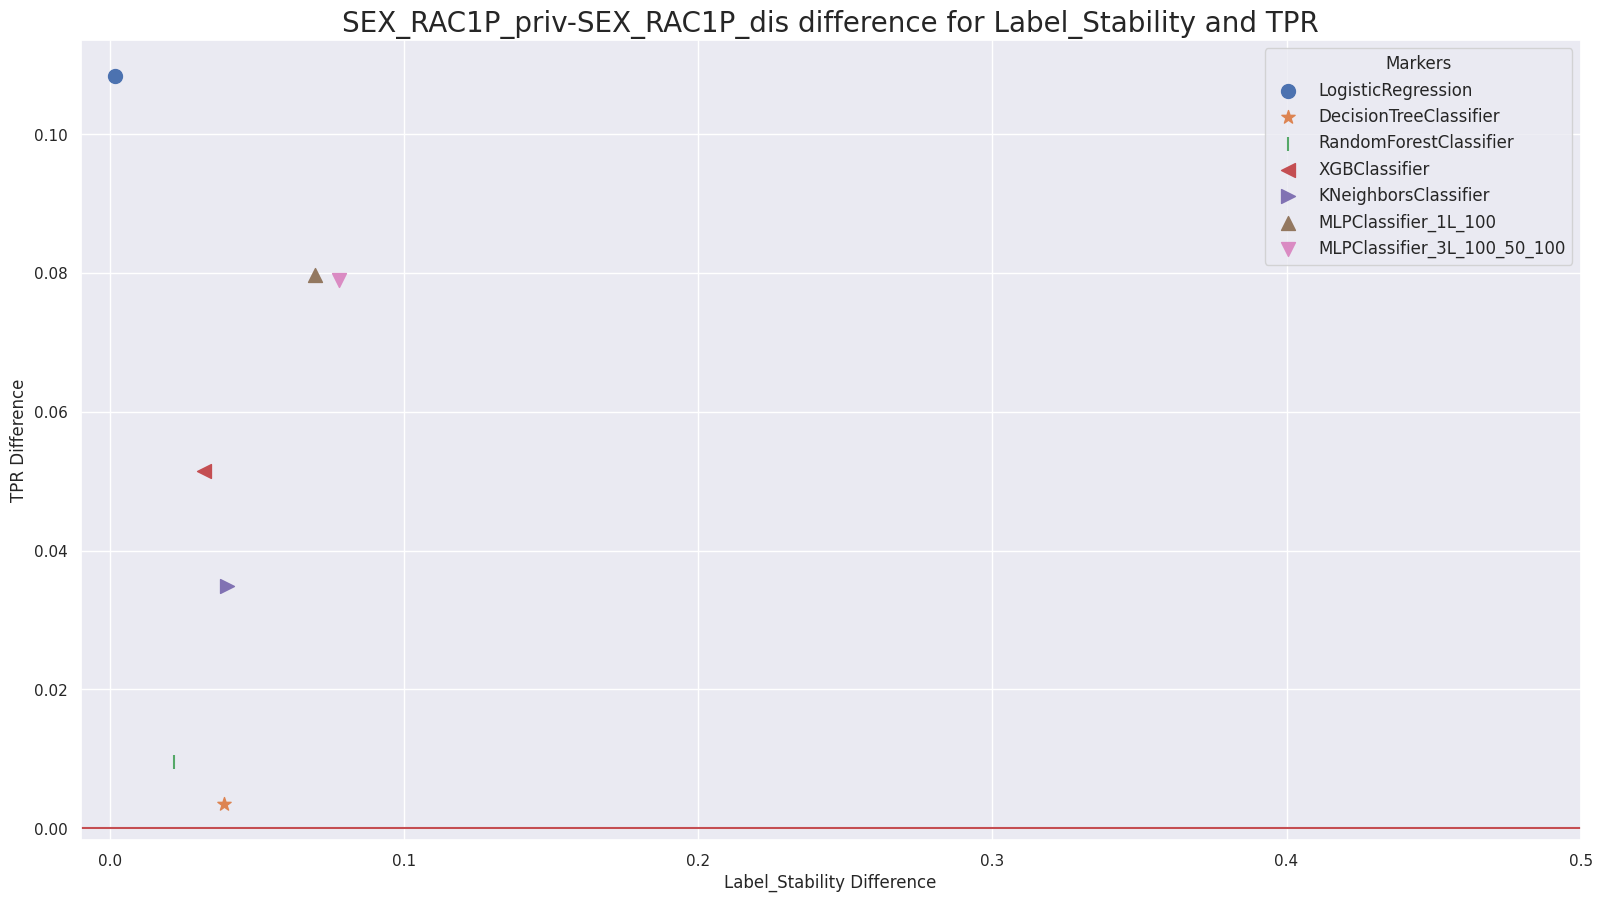

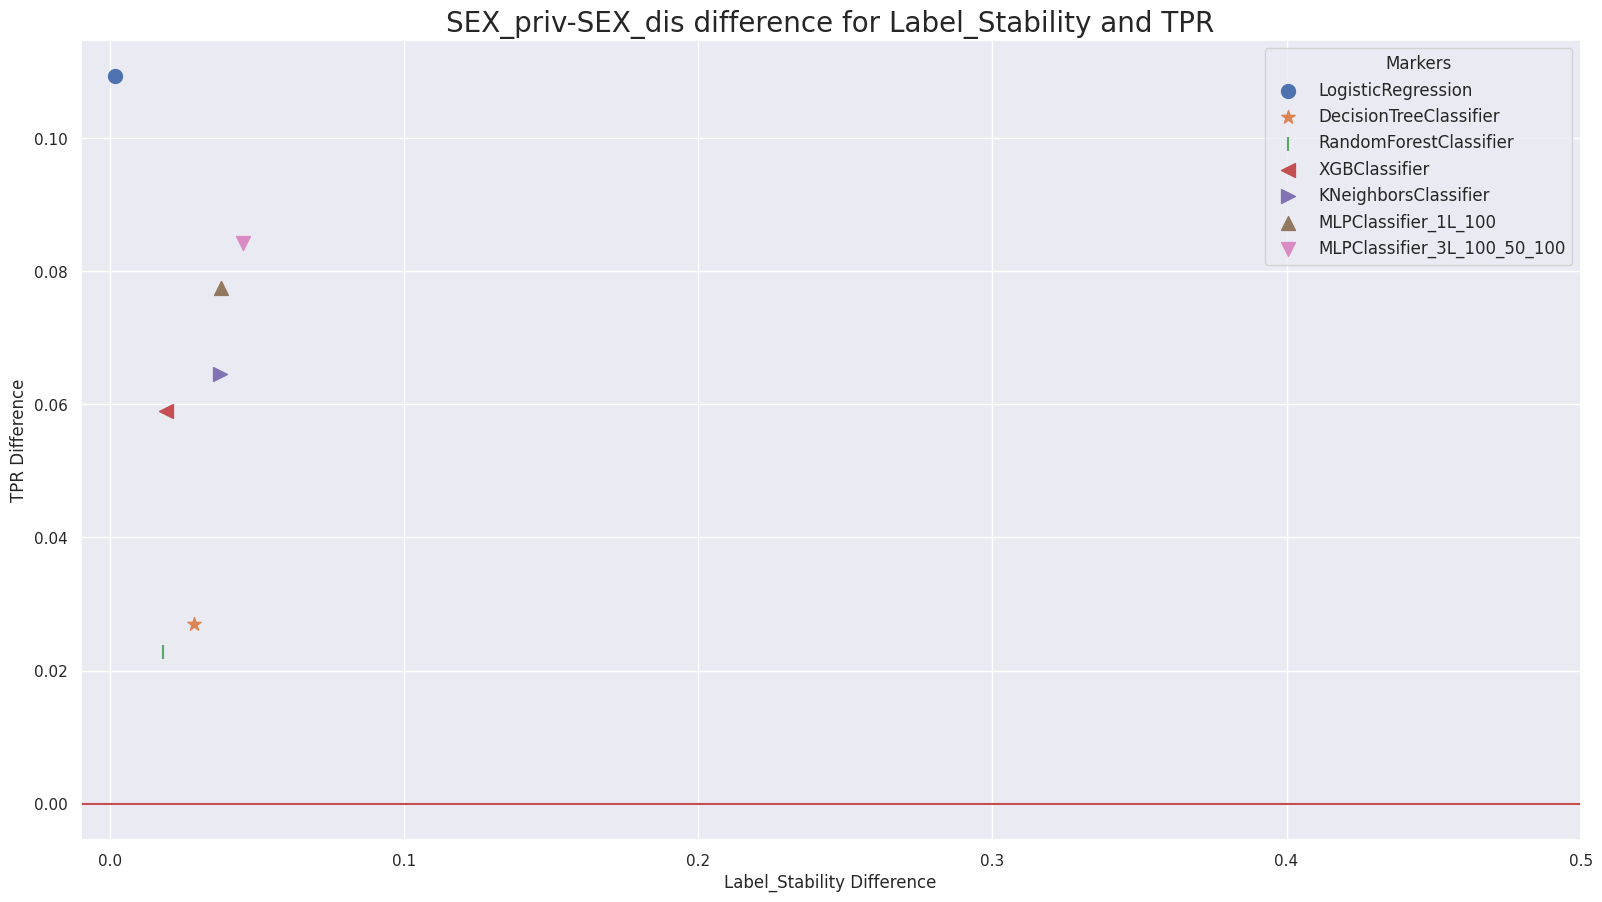

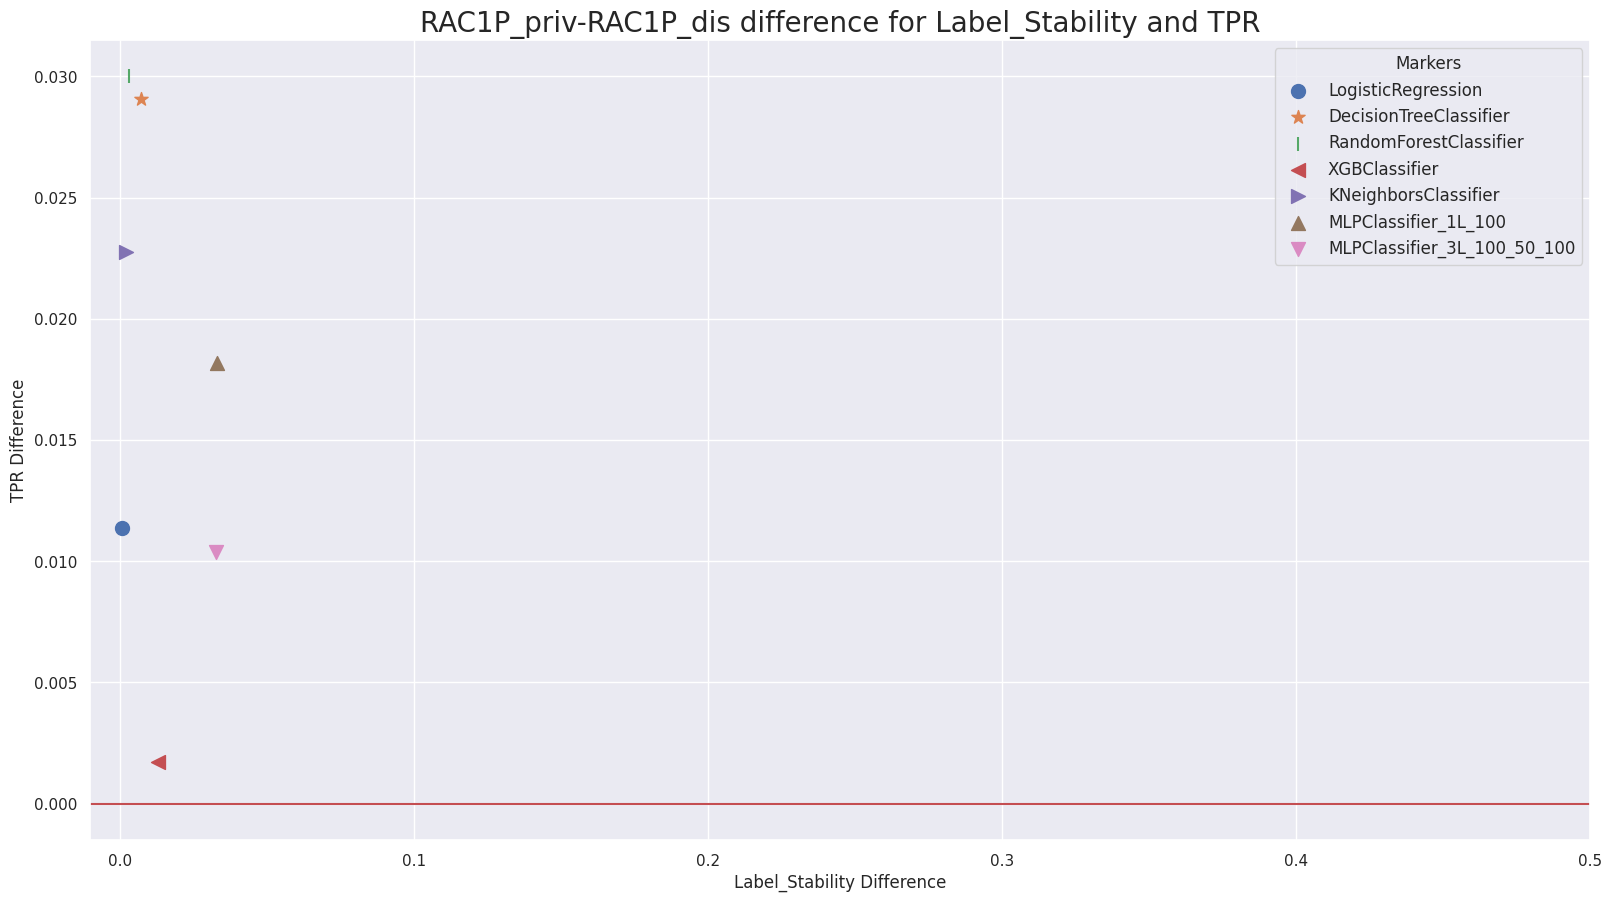

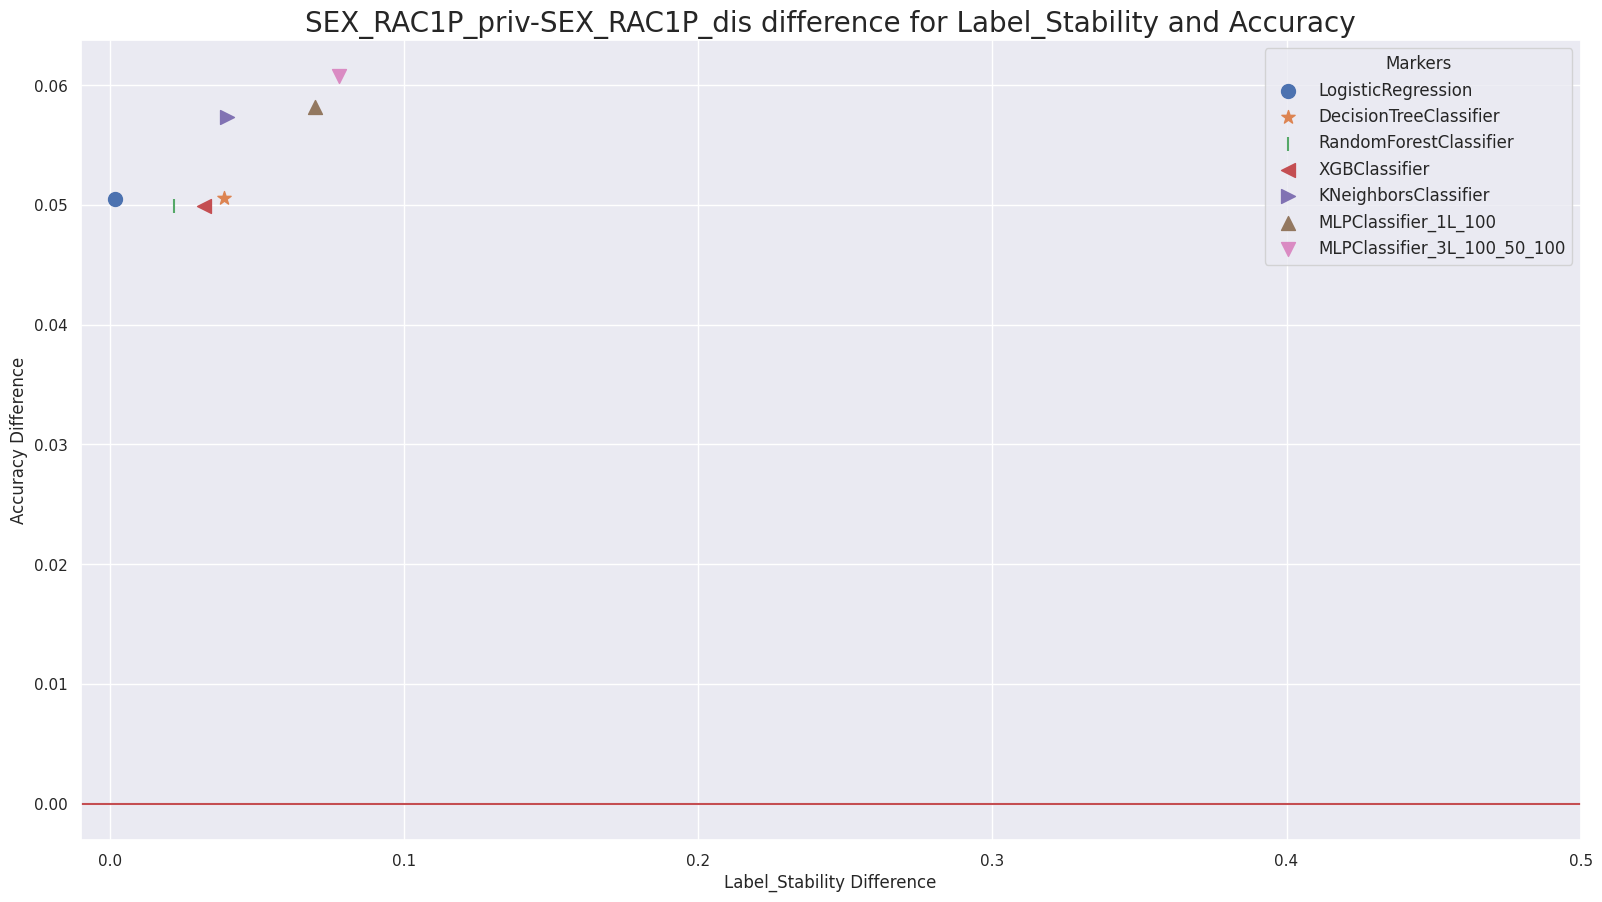

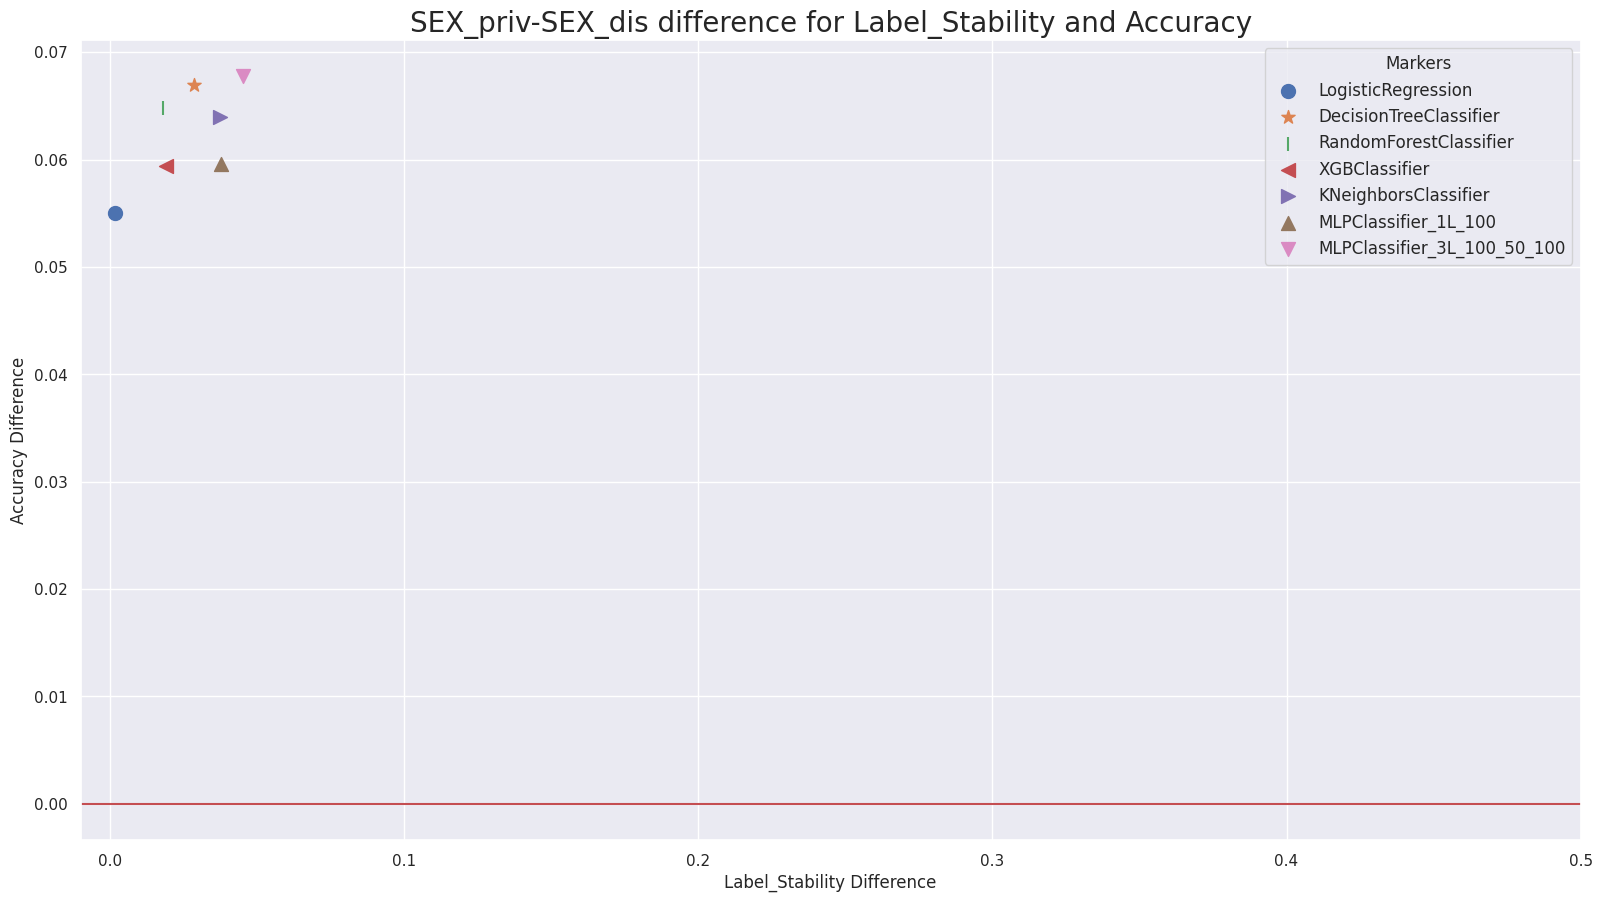

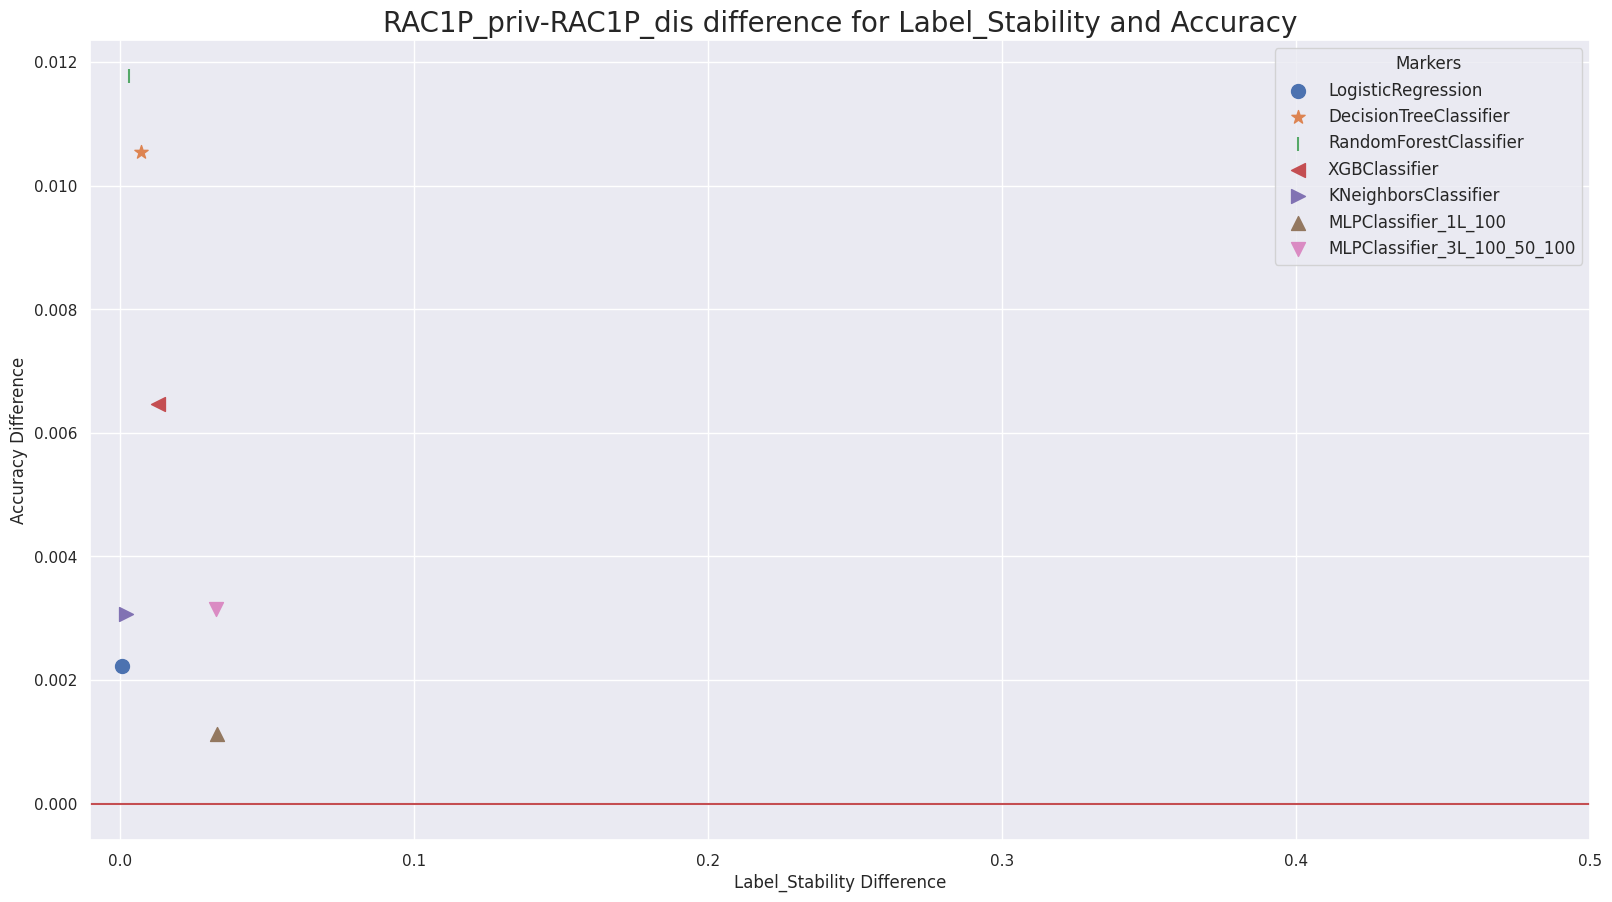

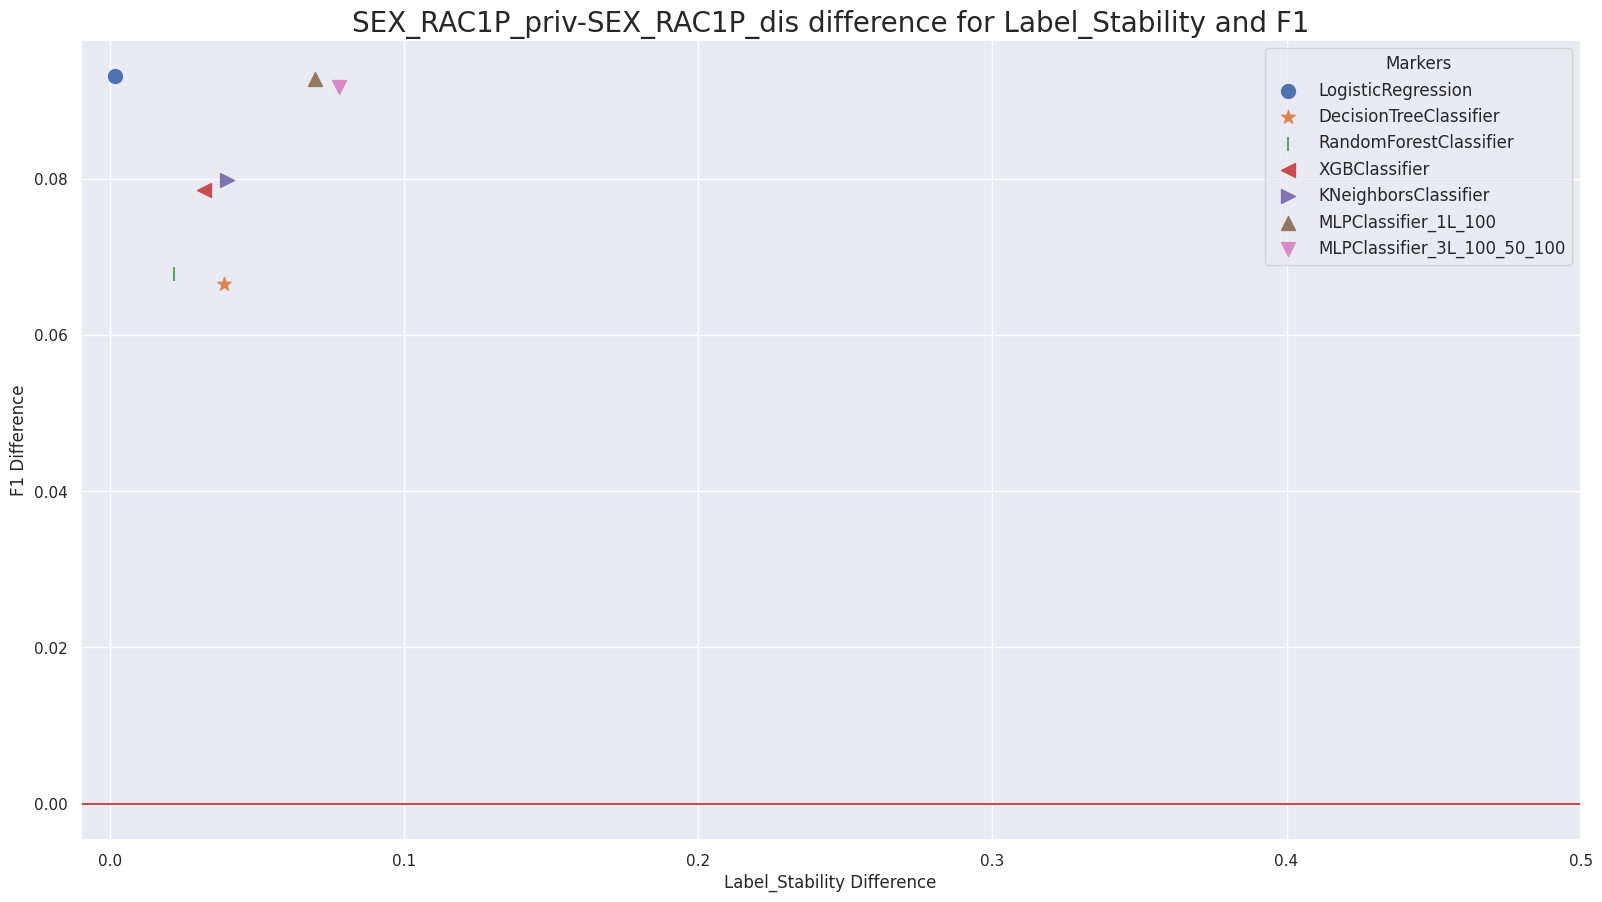

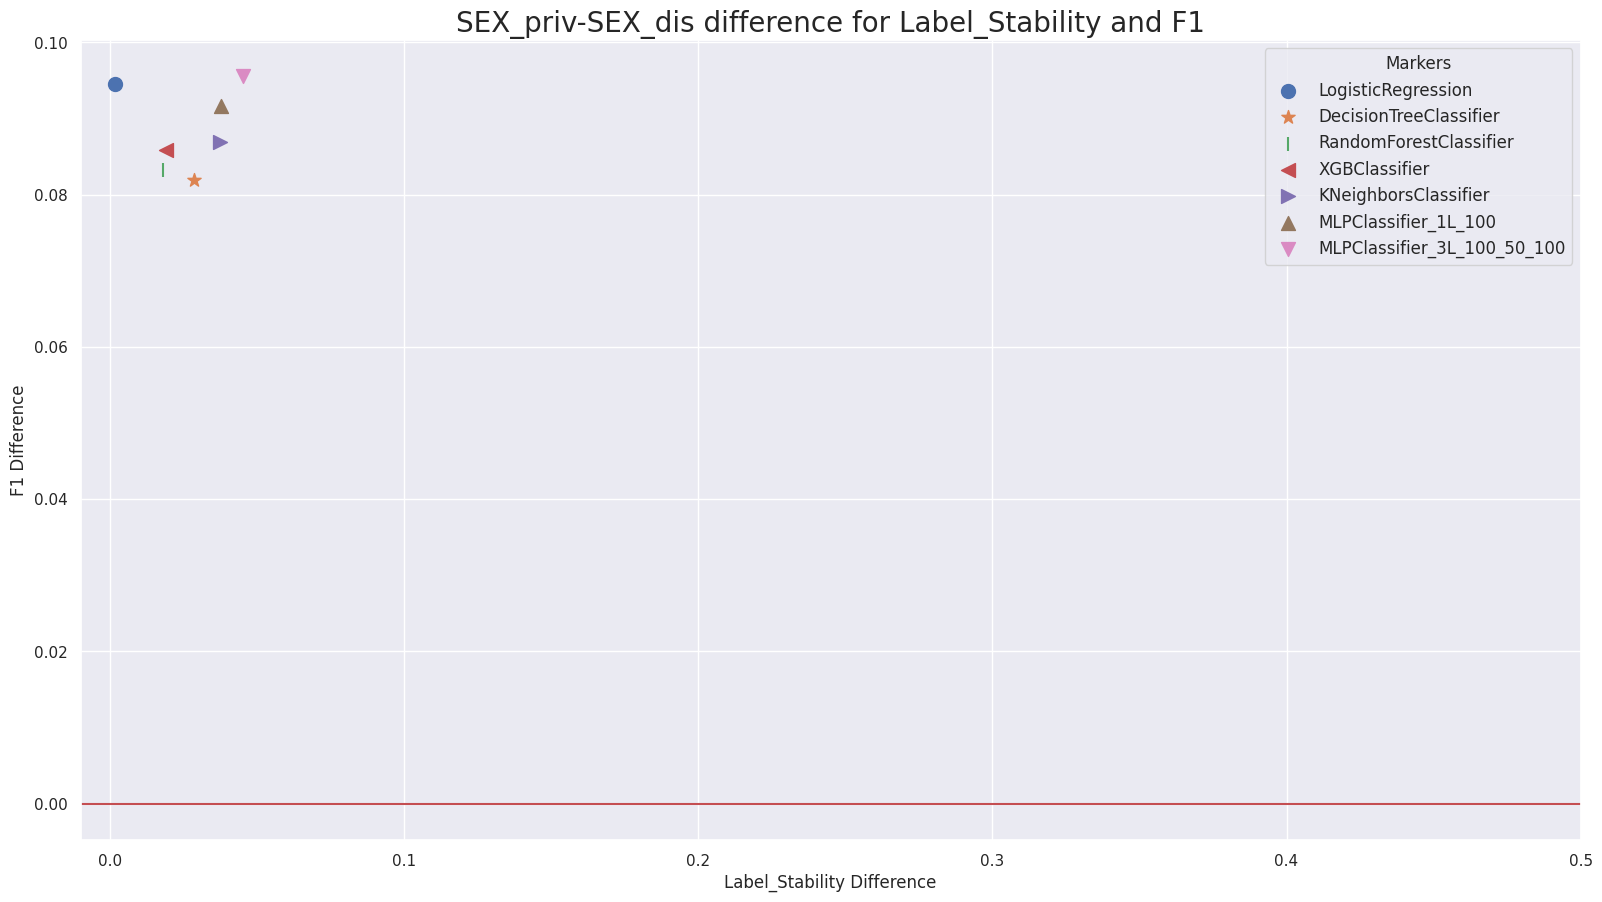

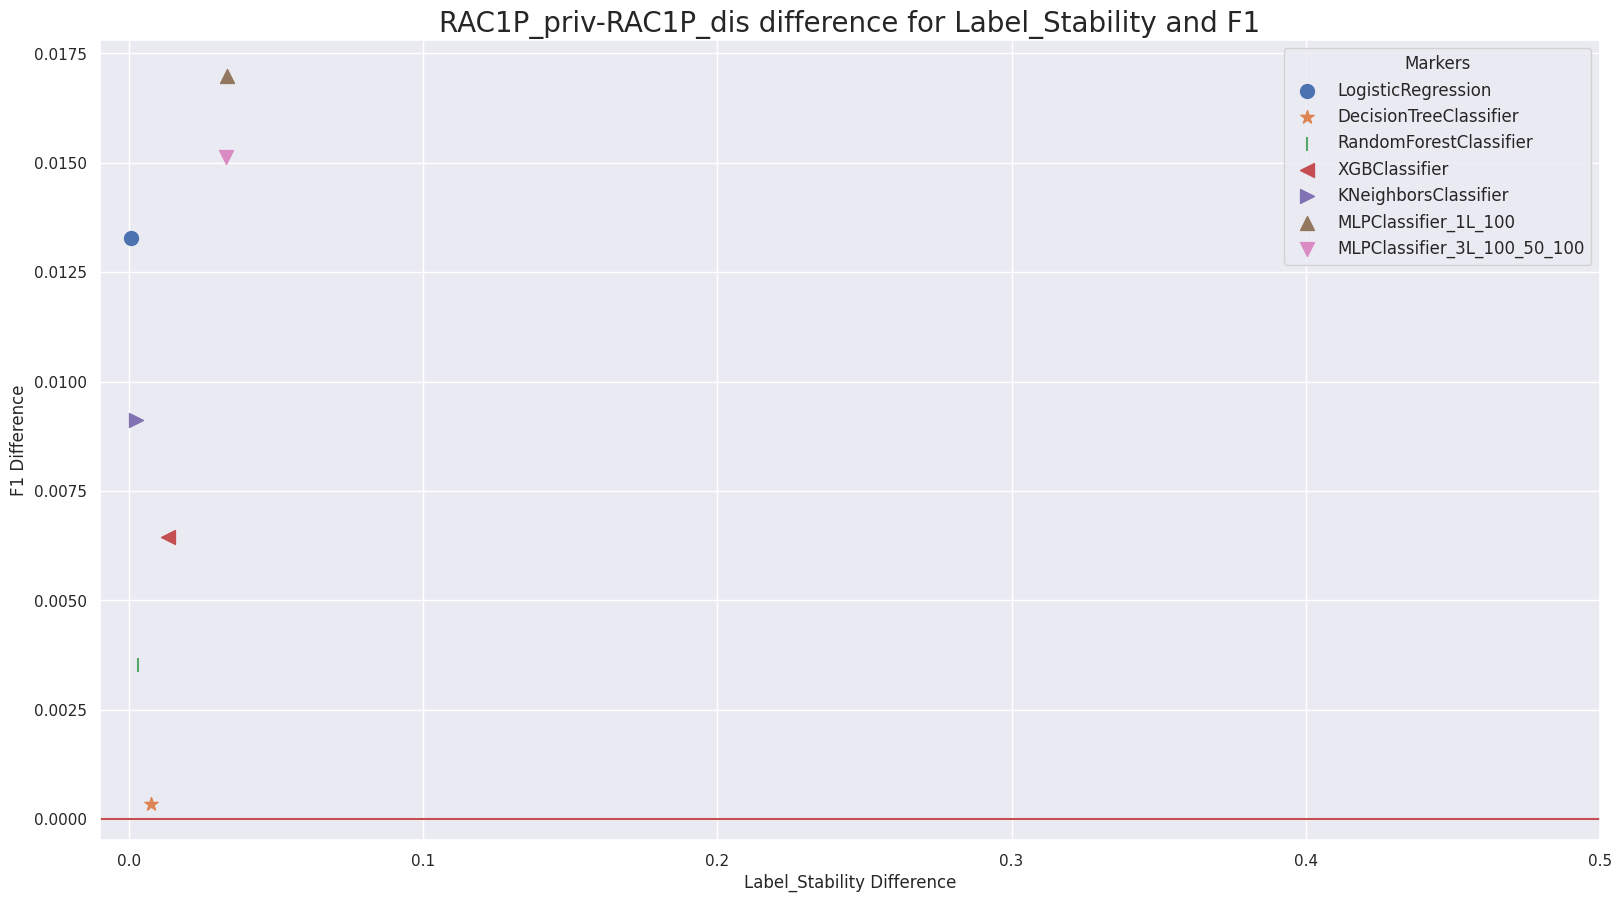

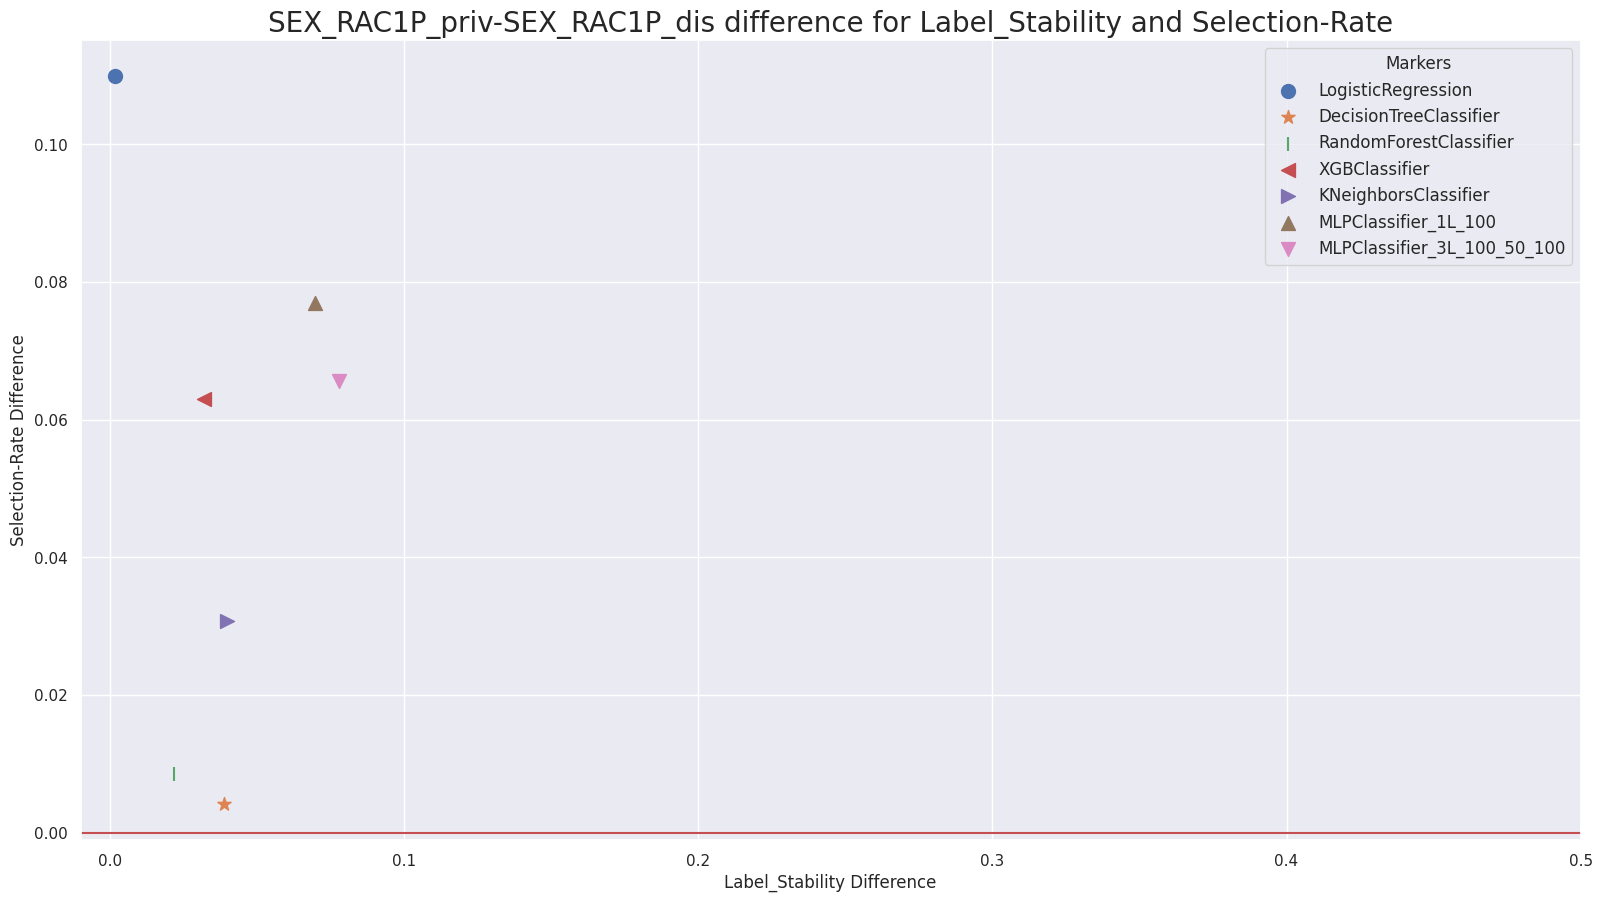

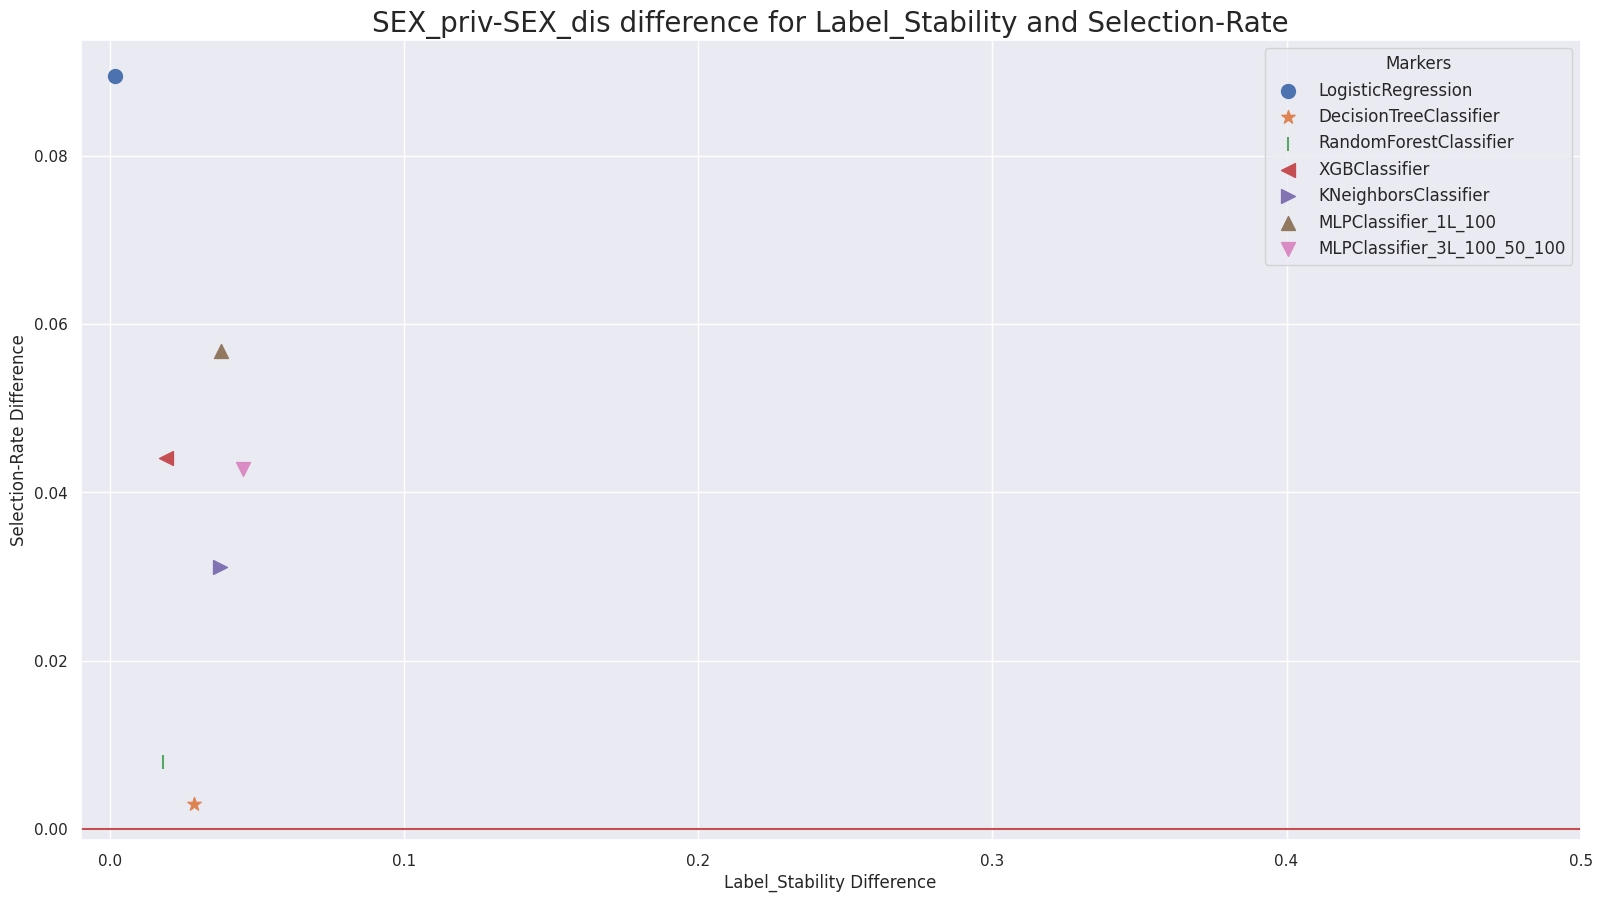

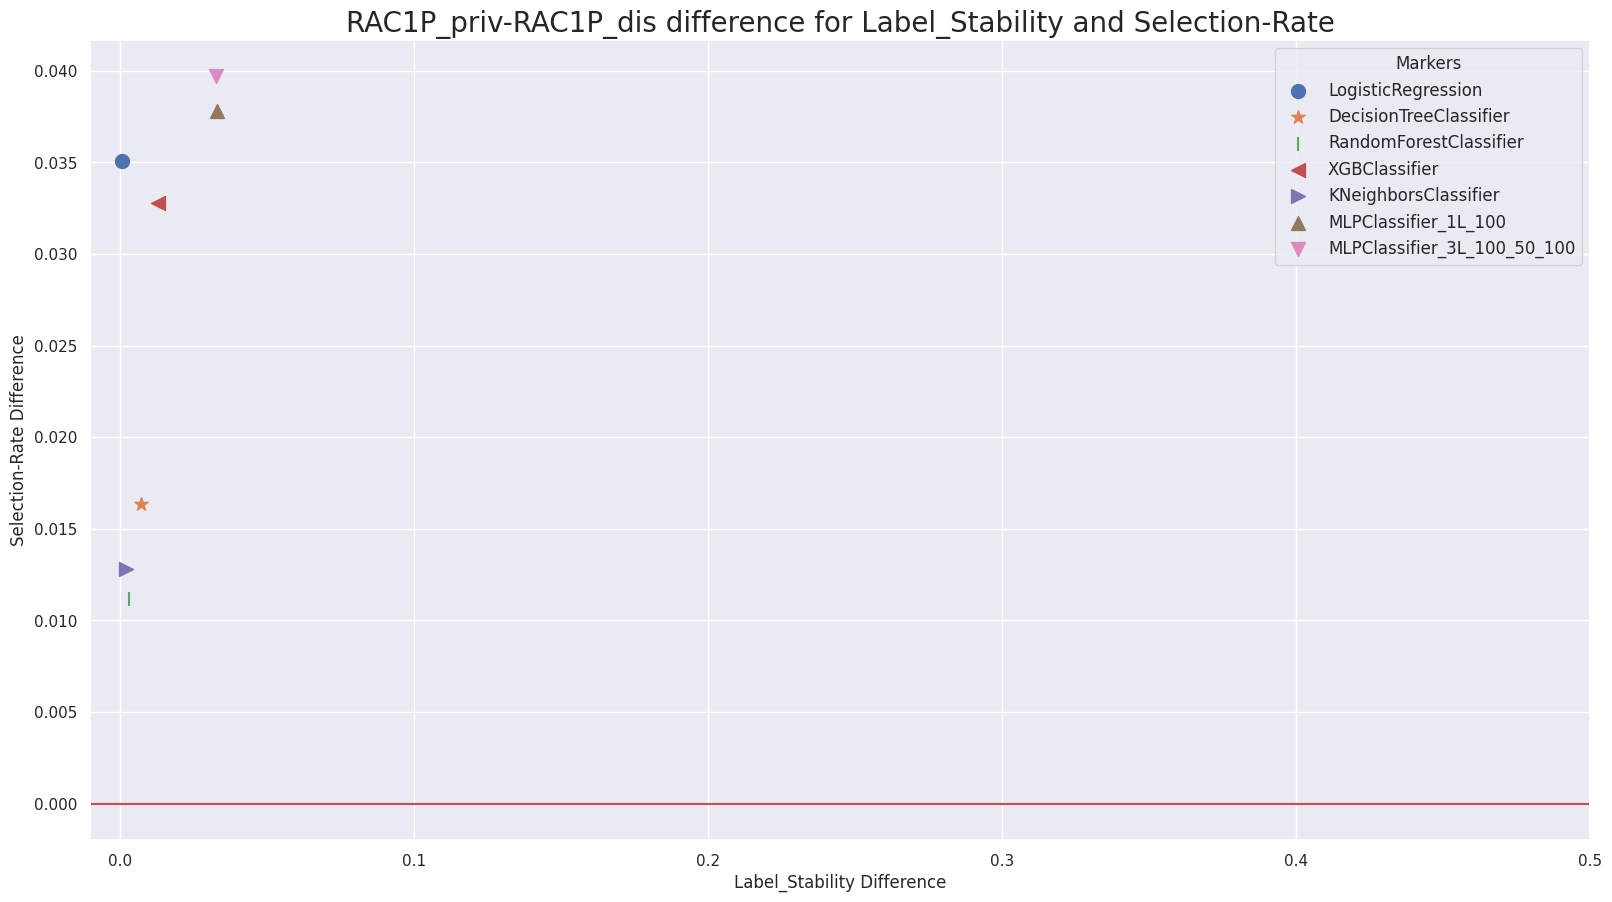

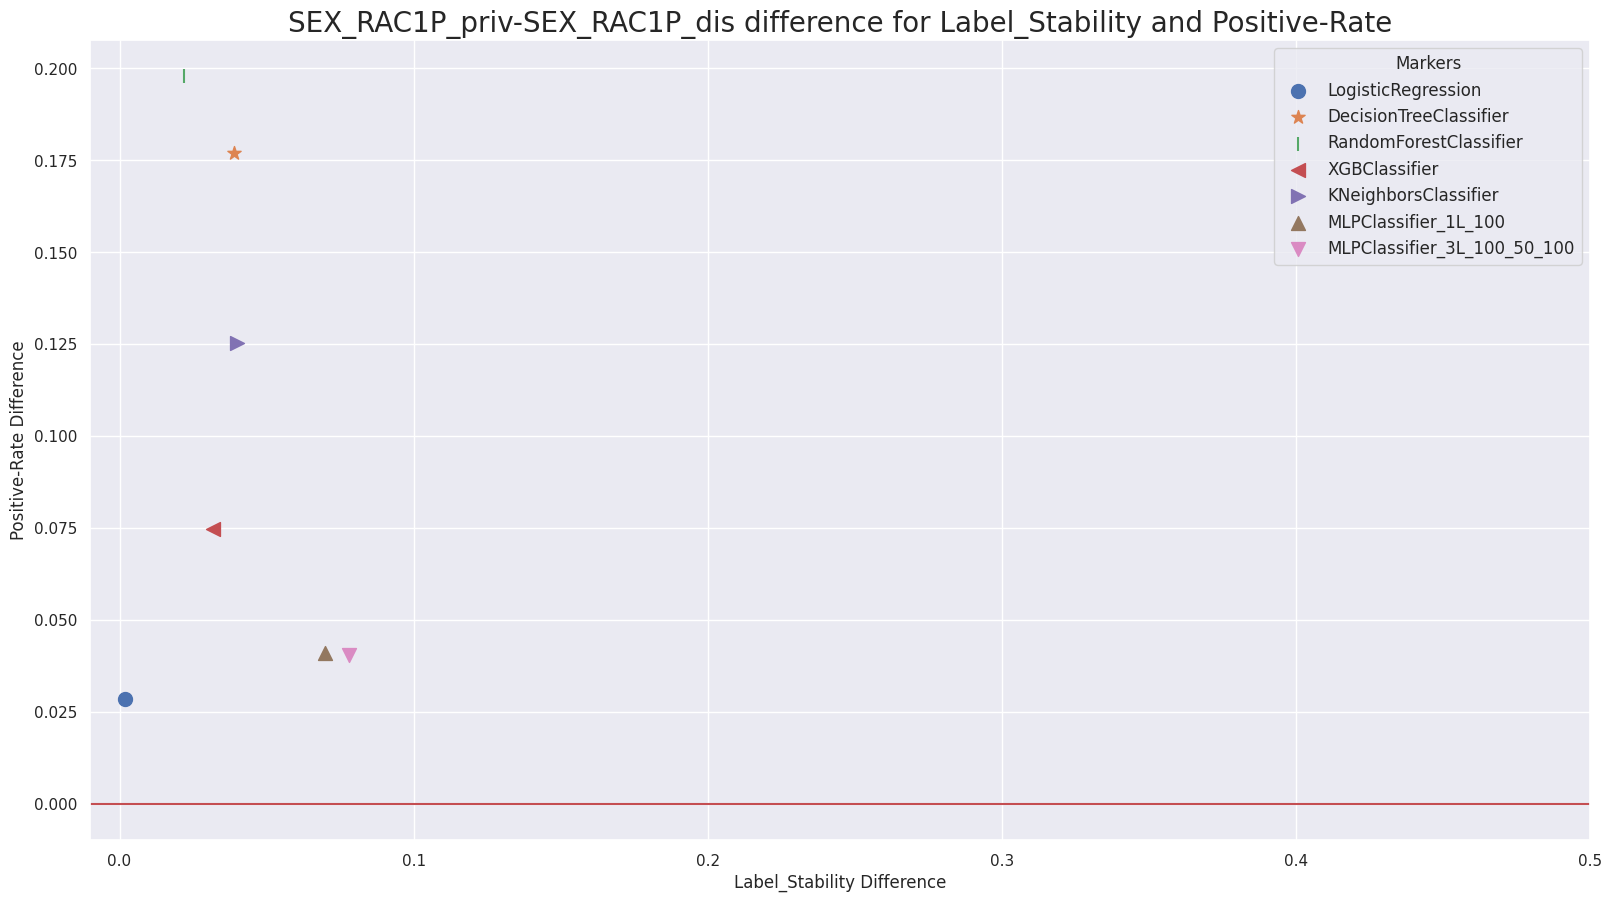

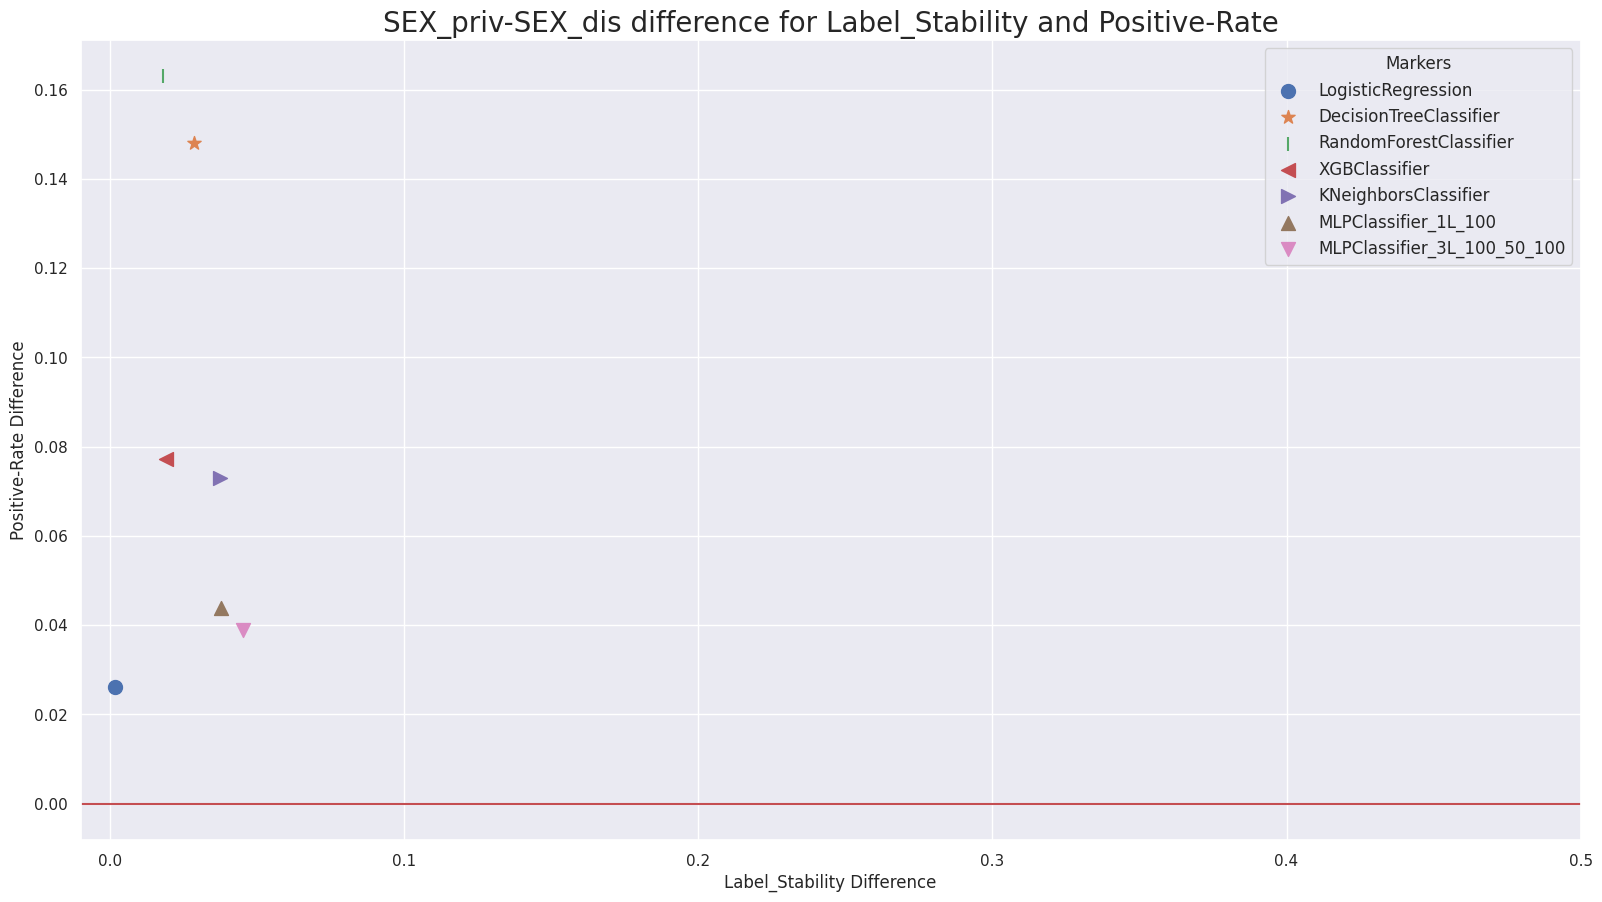

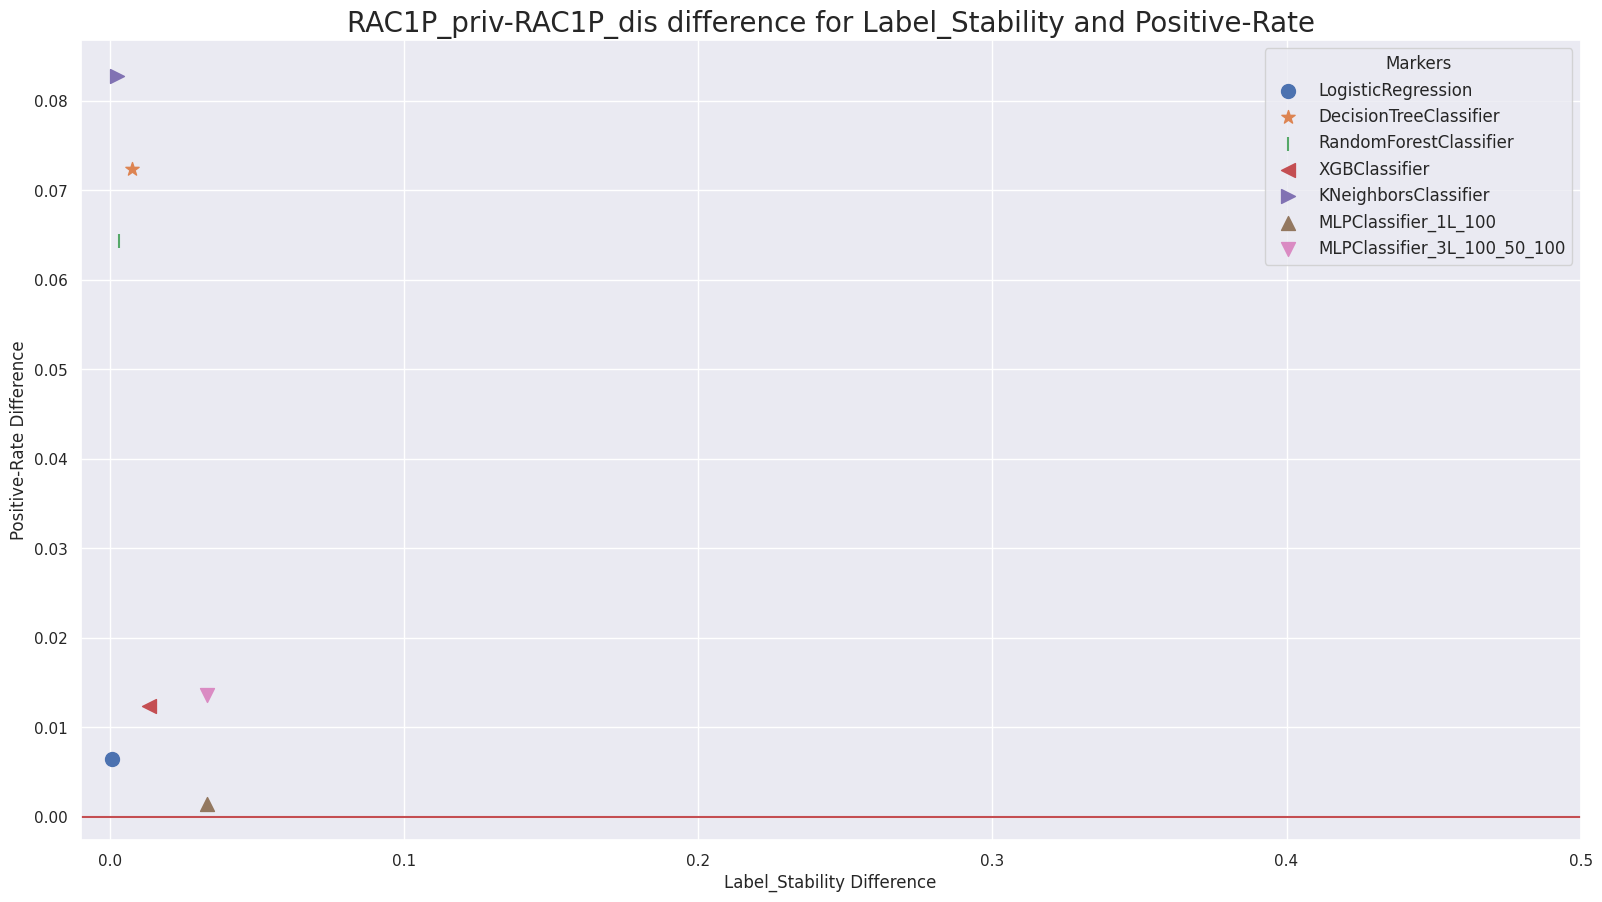

In [96]:
visualize_fairness_metrics_for_prediction_metric(models_average_results_dct,
                                                 x_metric='Label_Stability',
                                                 y_metrics=['TPR', 'Accuracy', 'F1', 'Selection-Rate', 'Positive-Rate'])

### Jitter

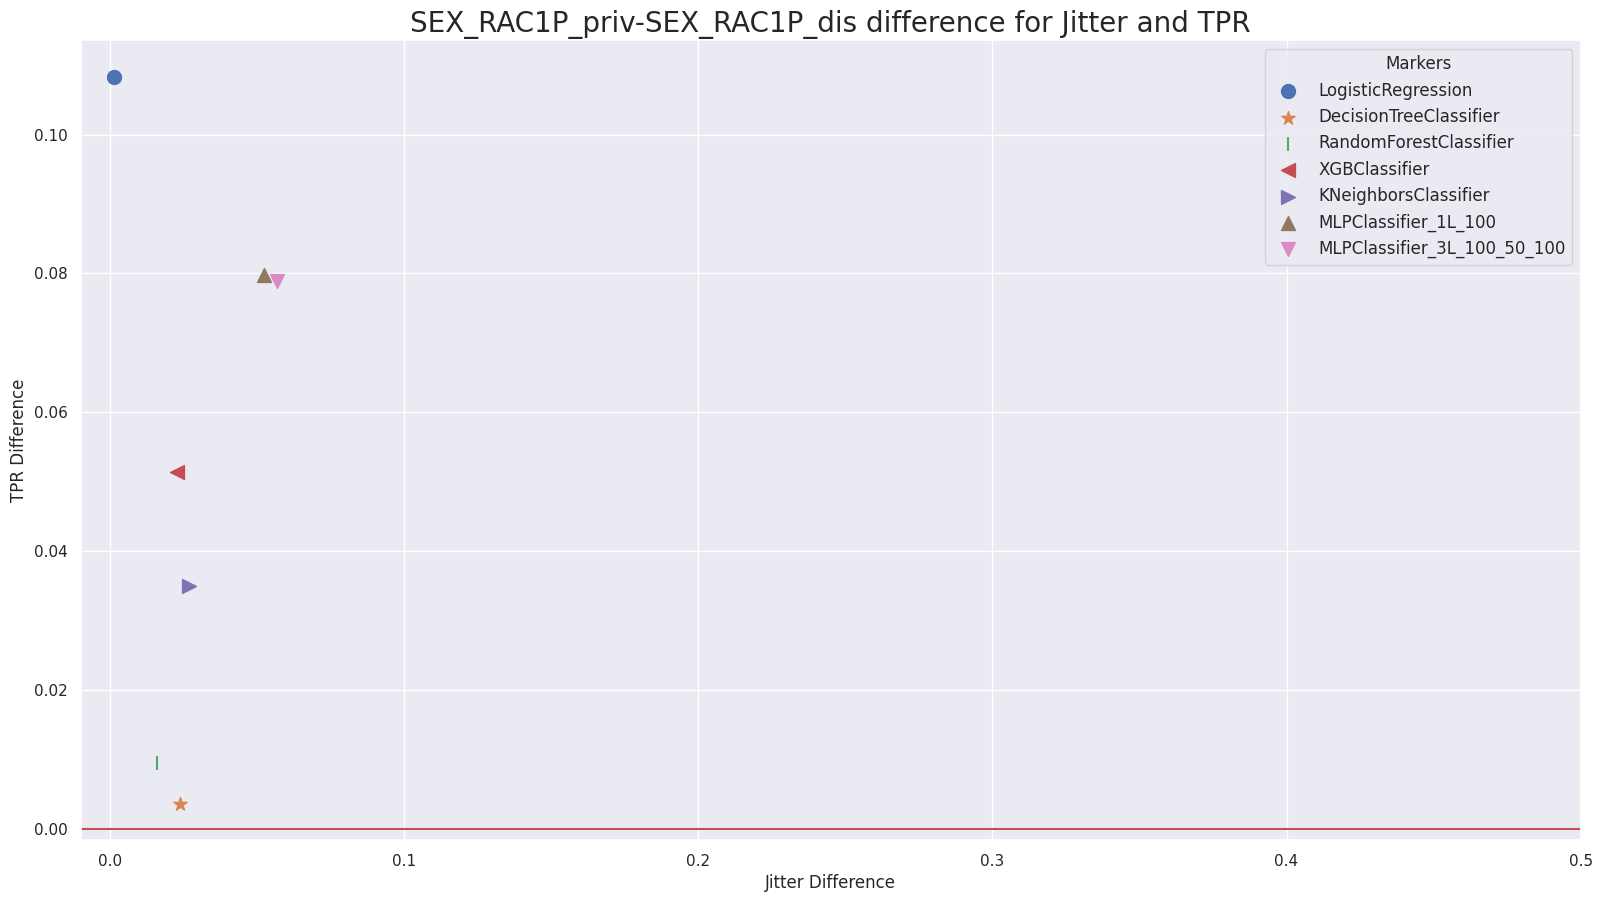

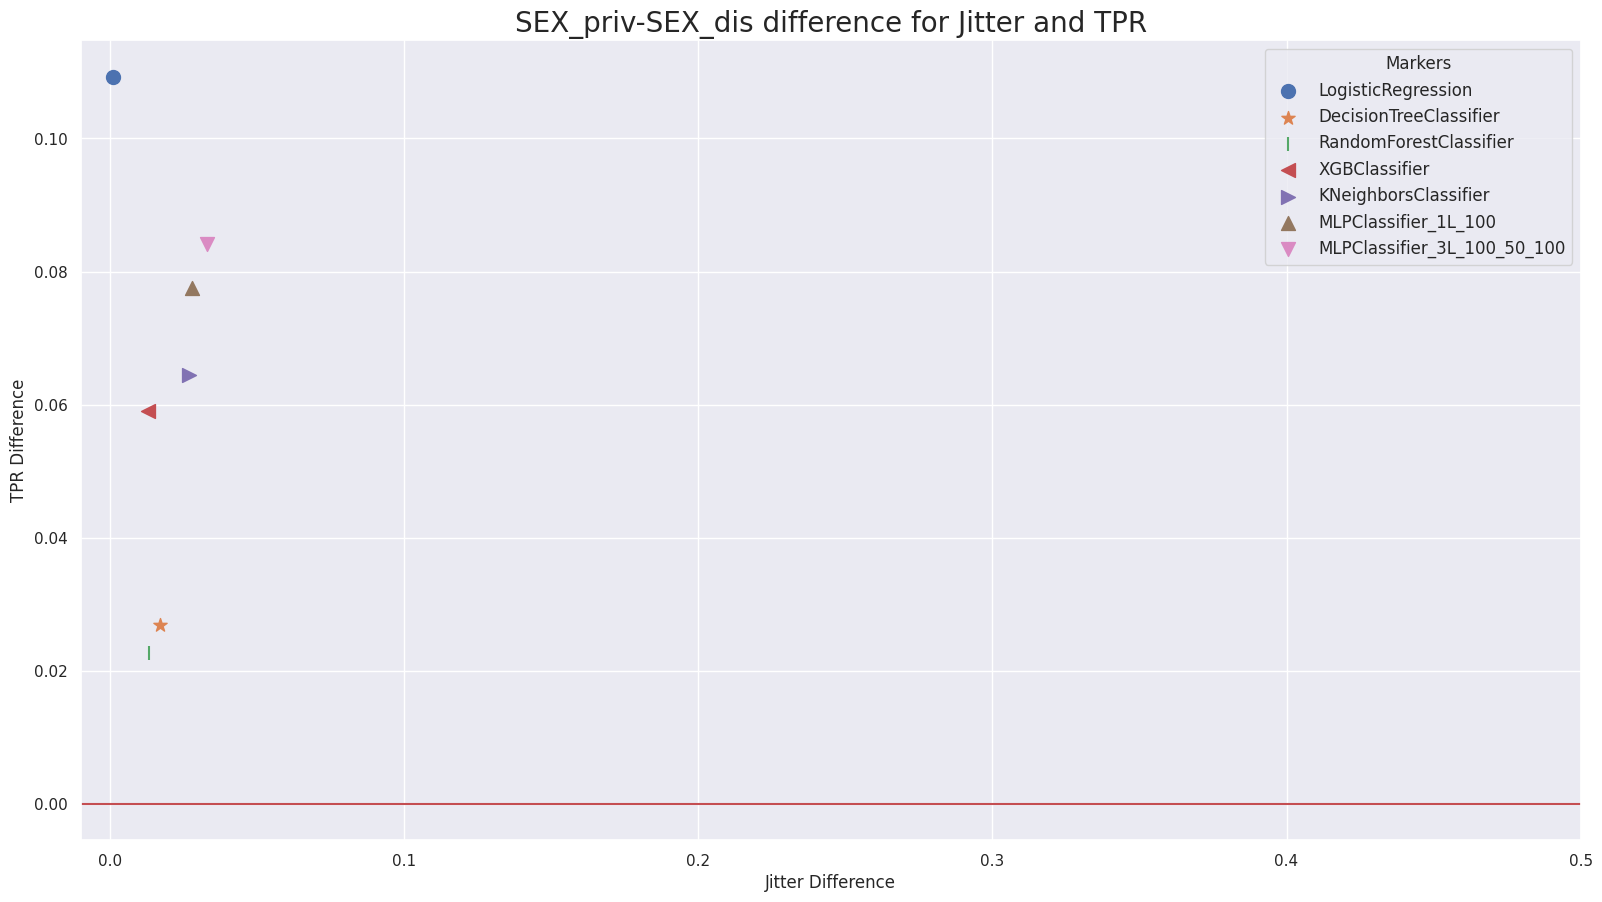

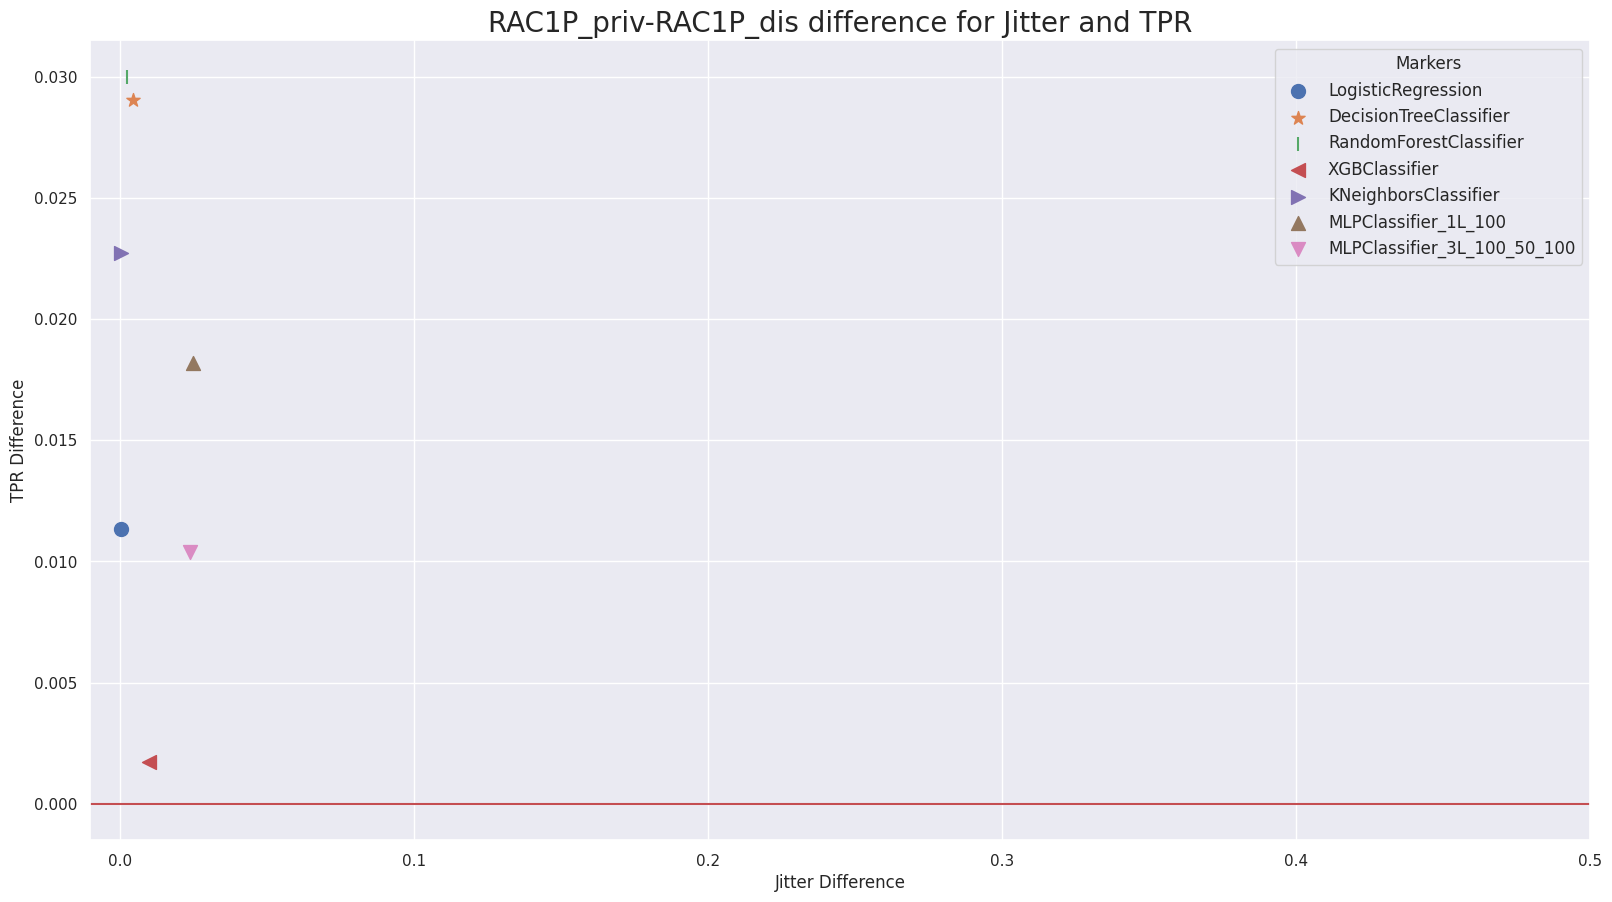

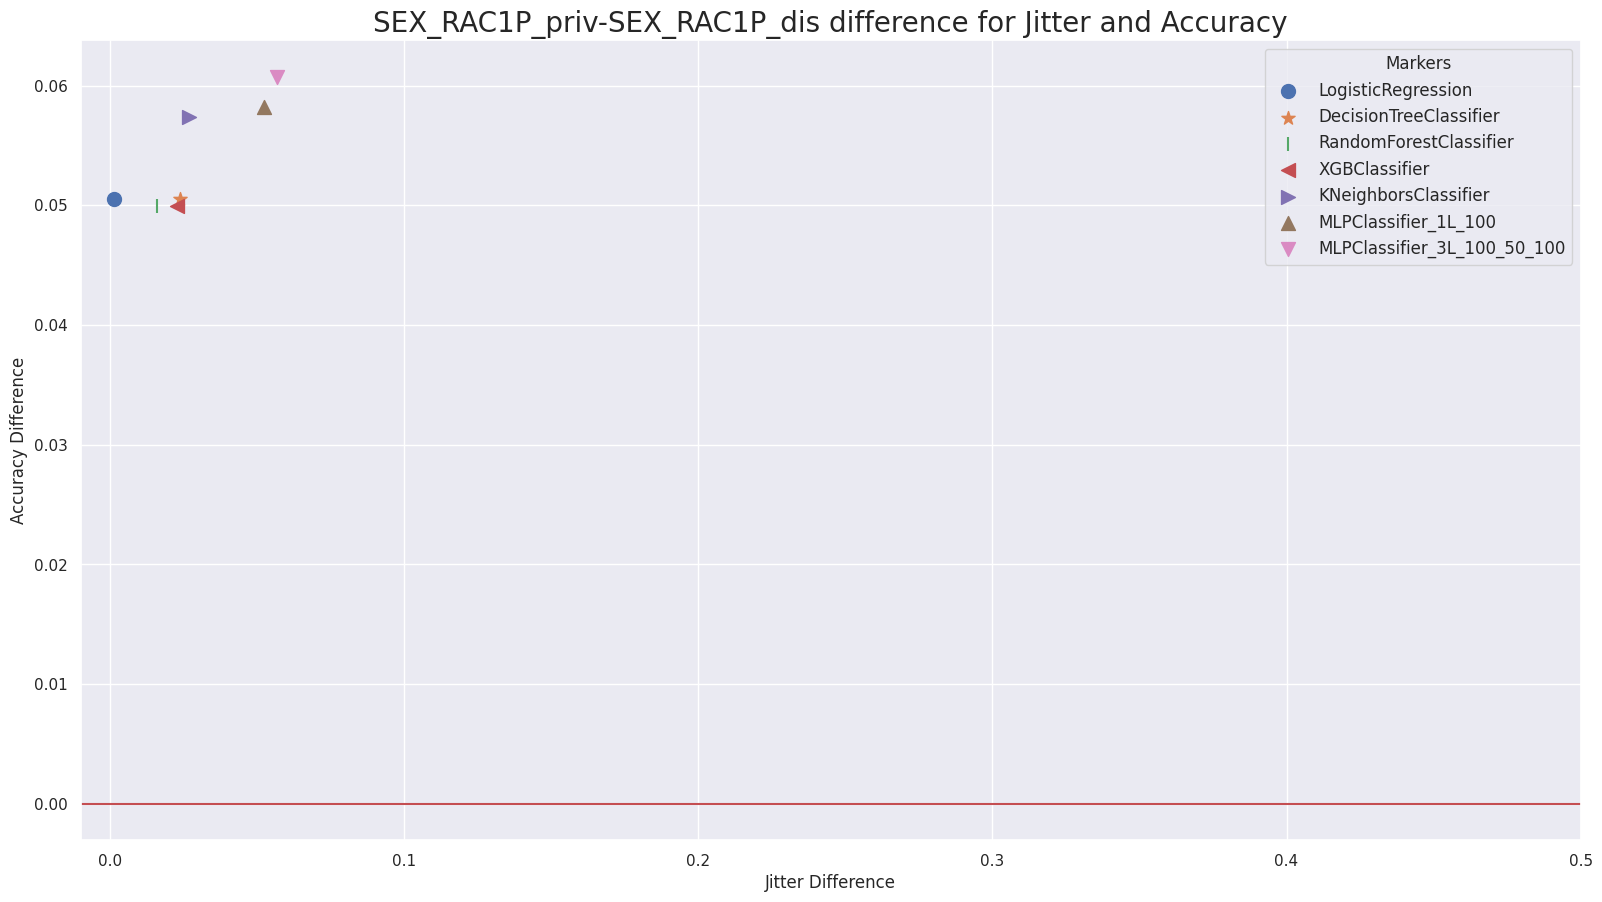

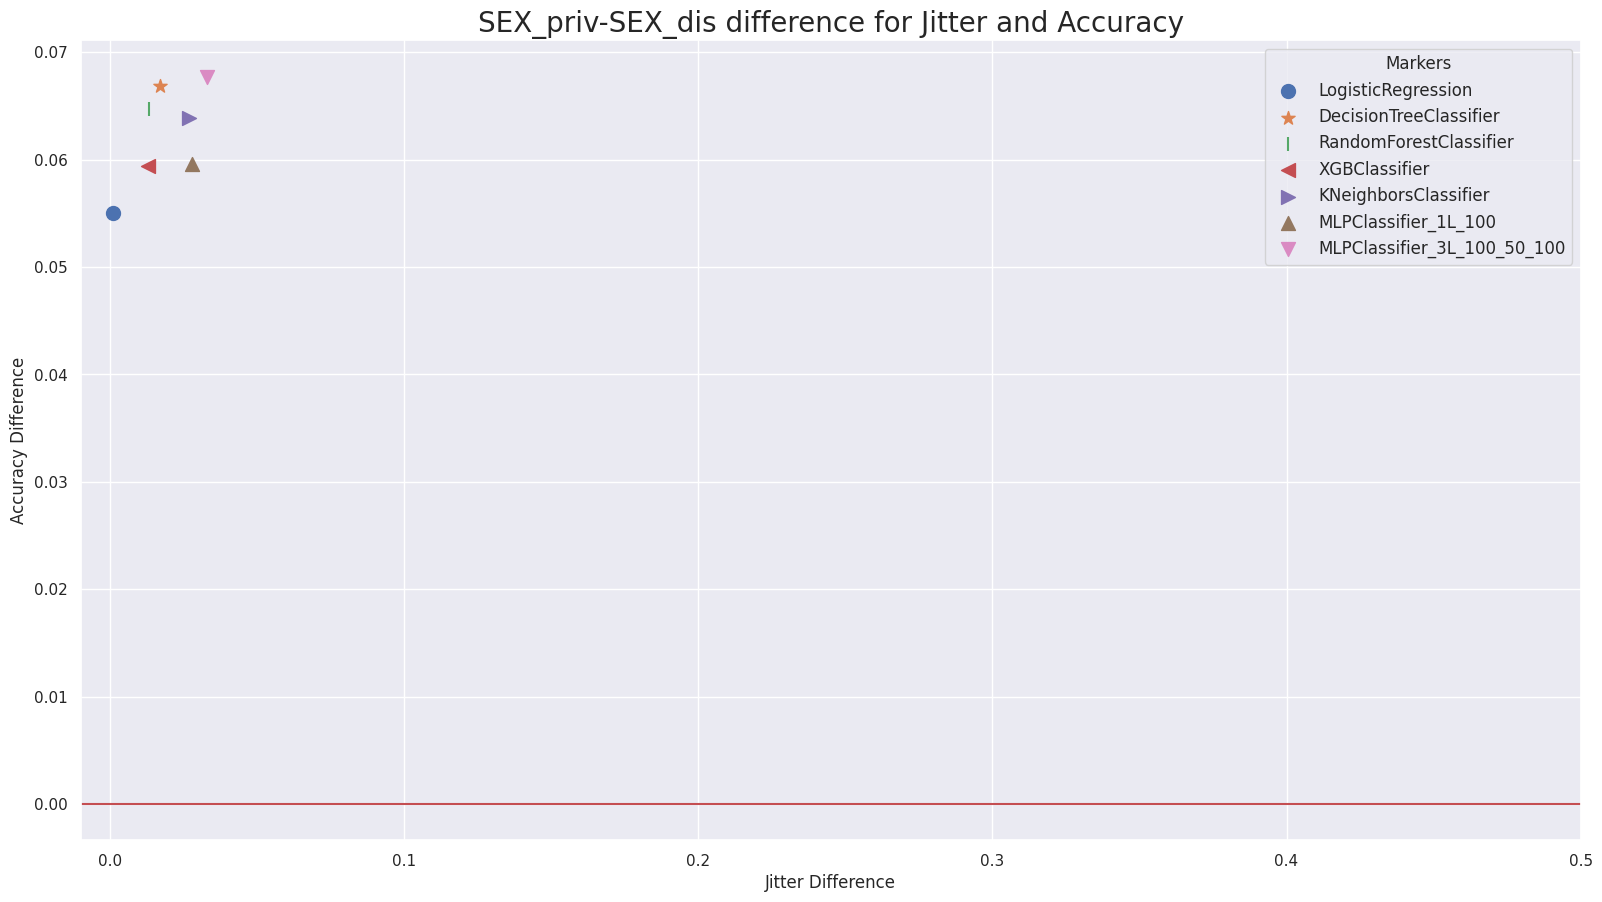

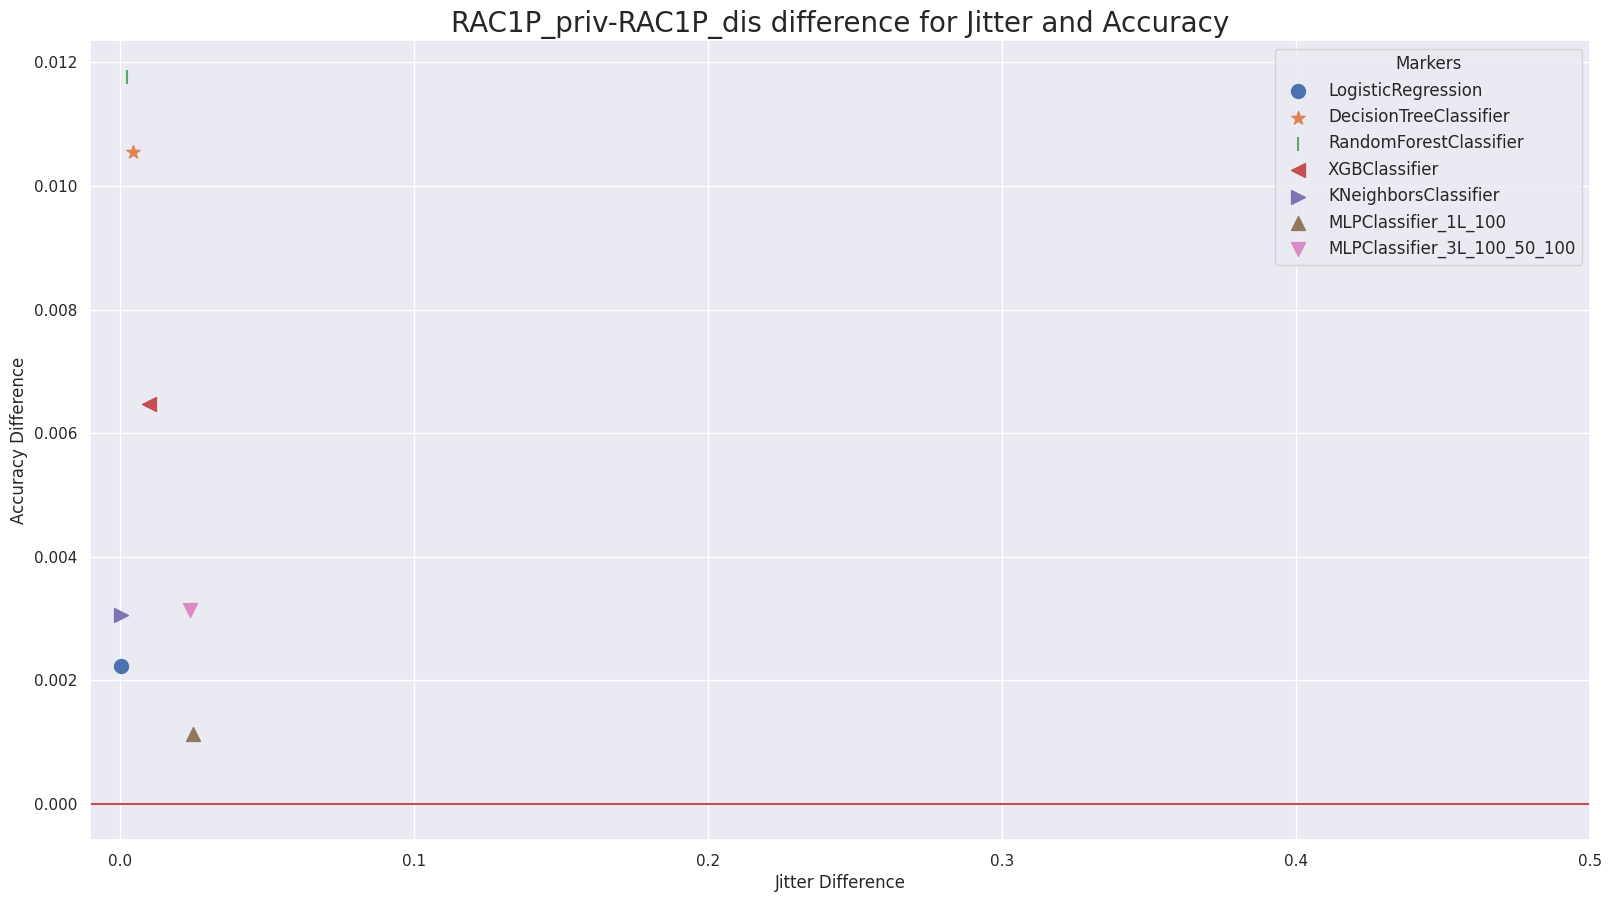

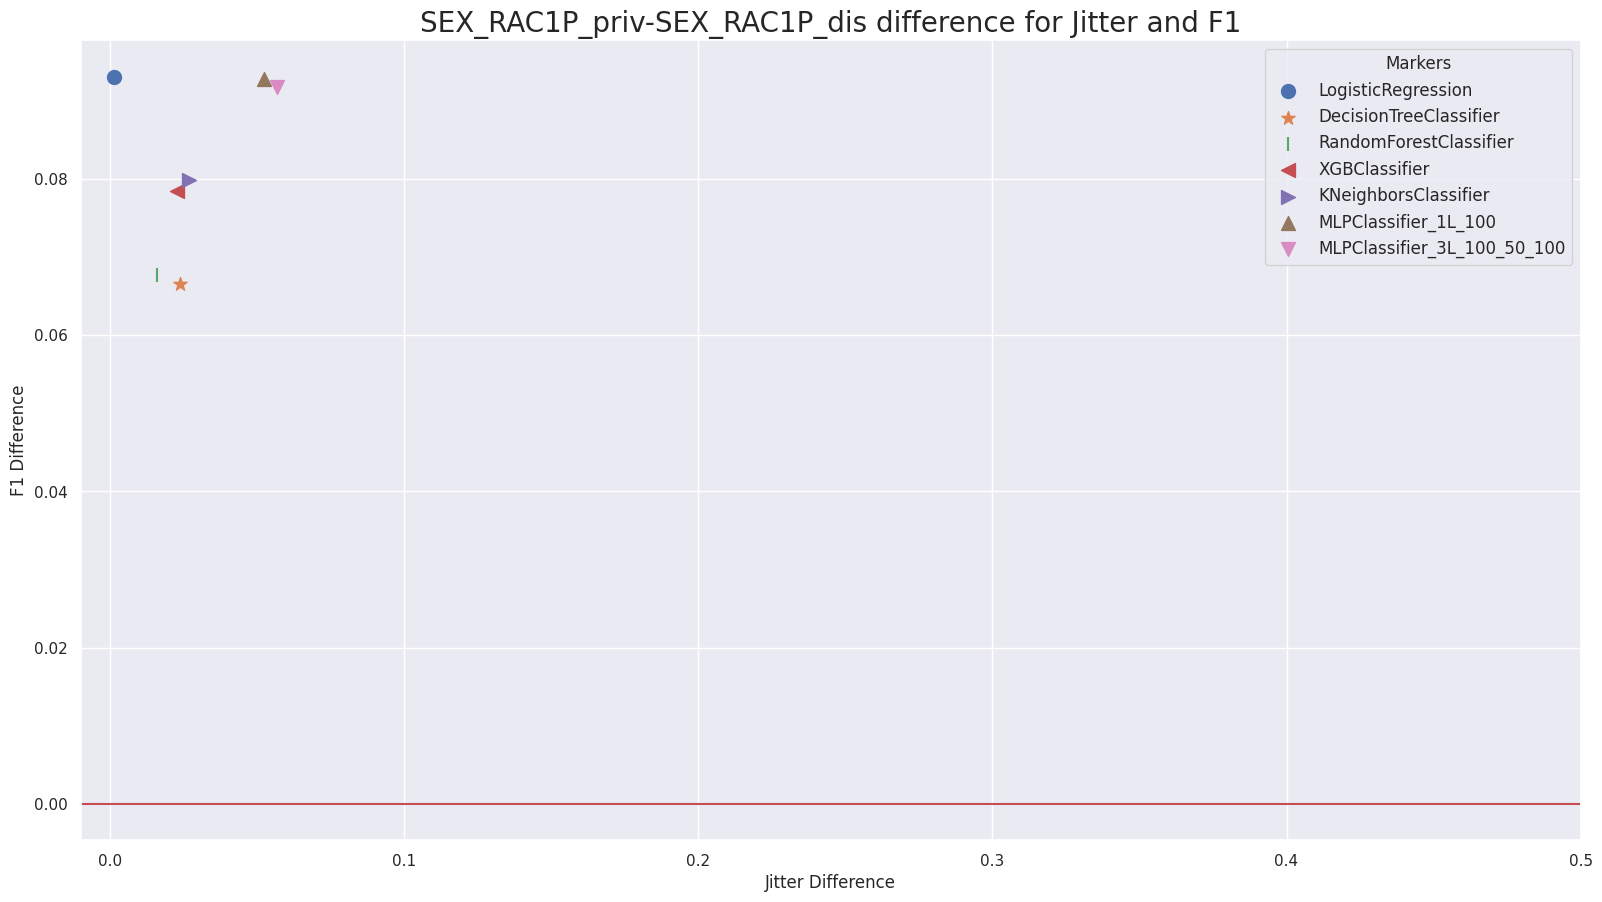

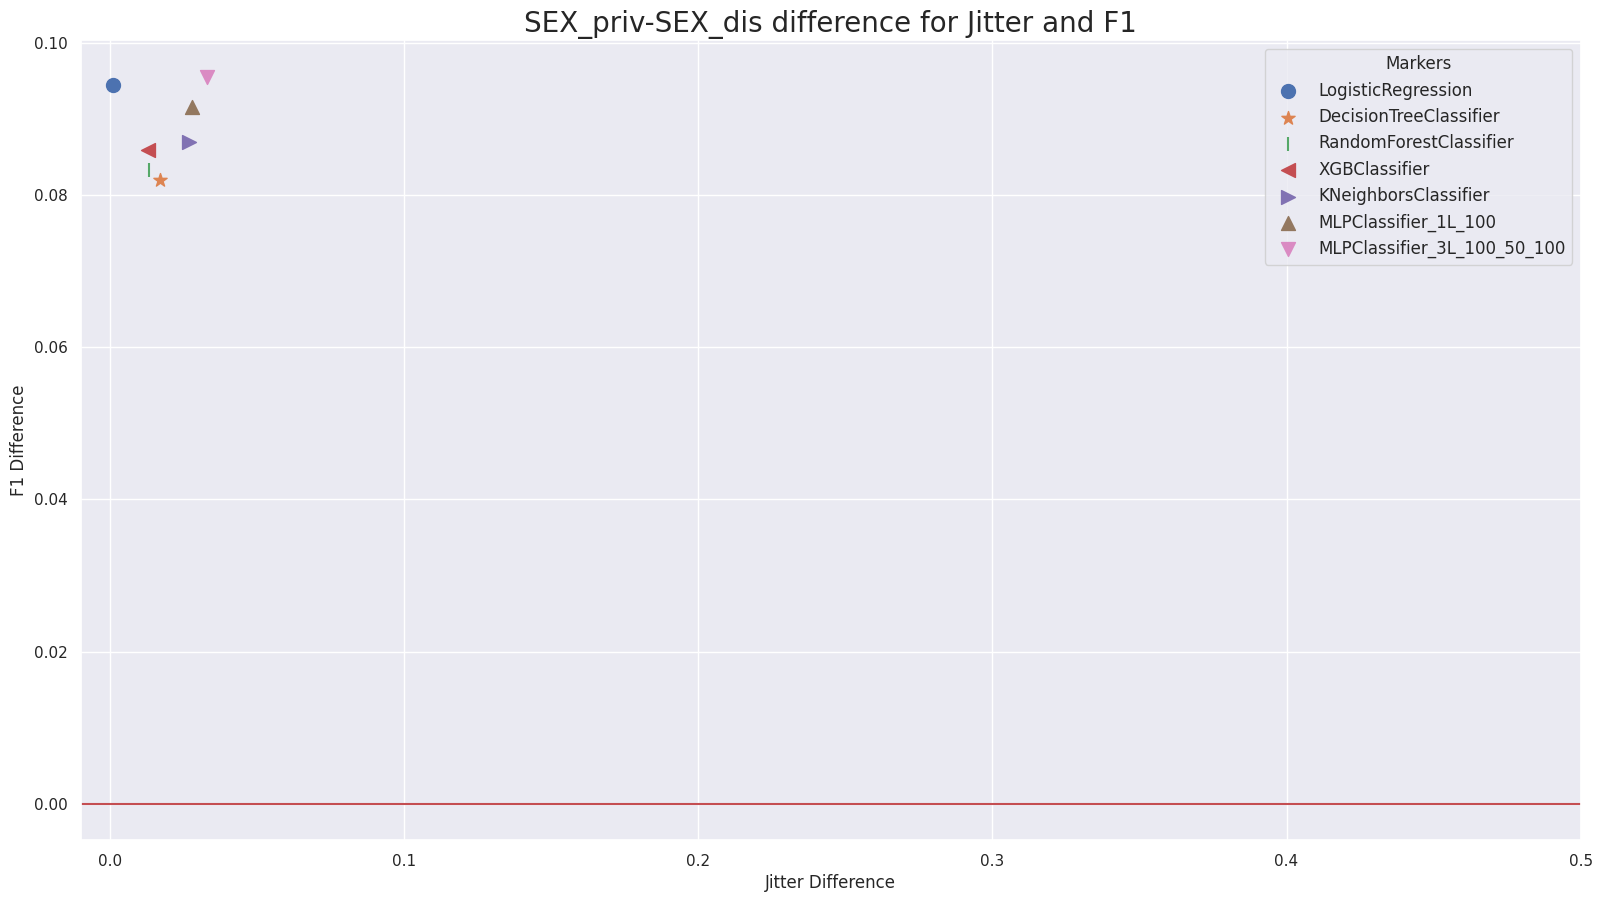

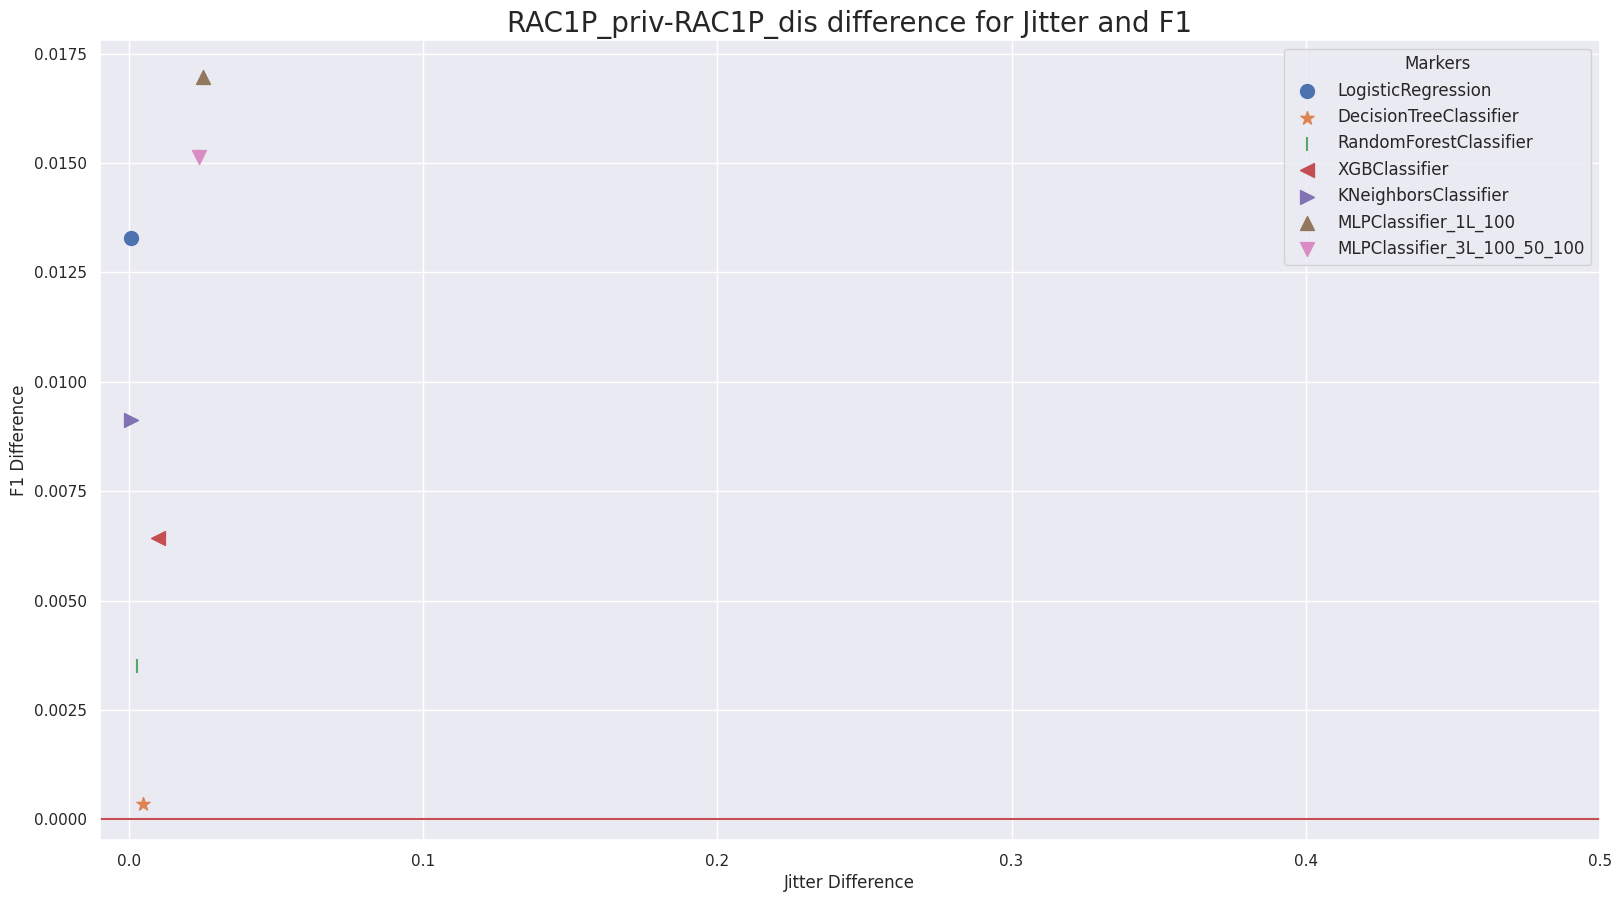

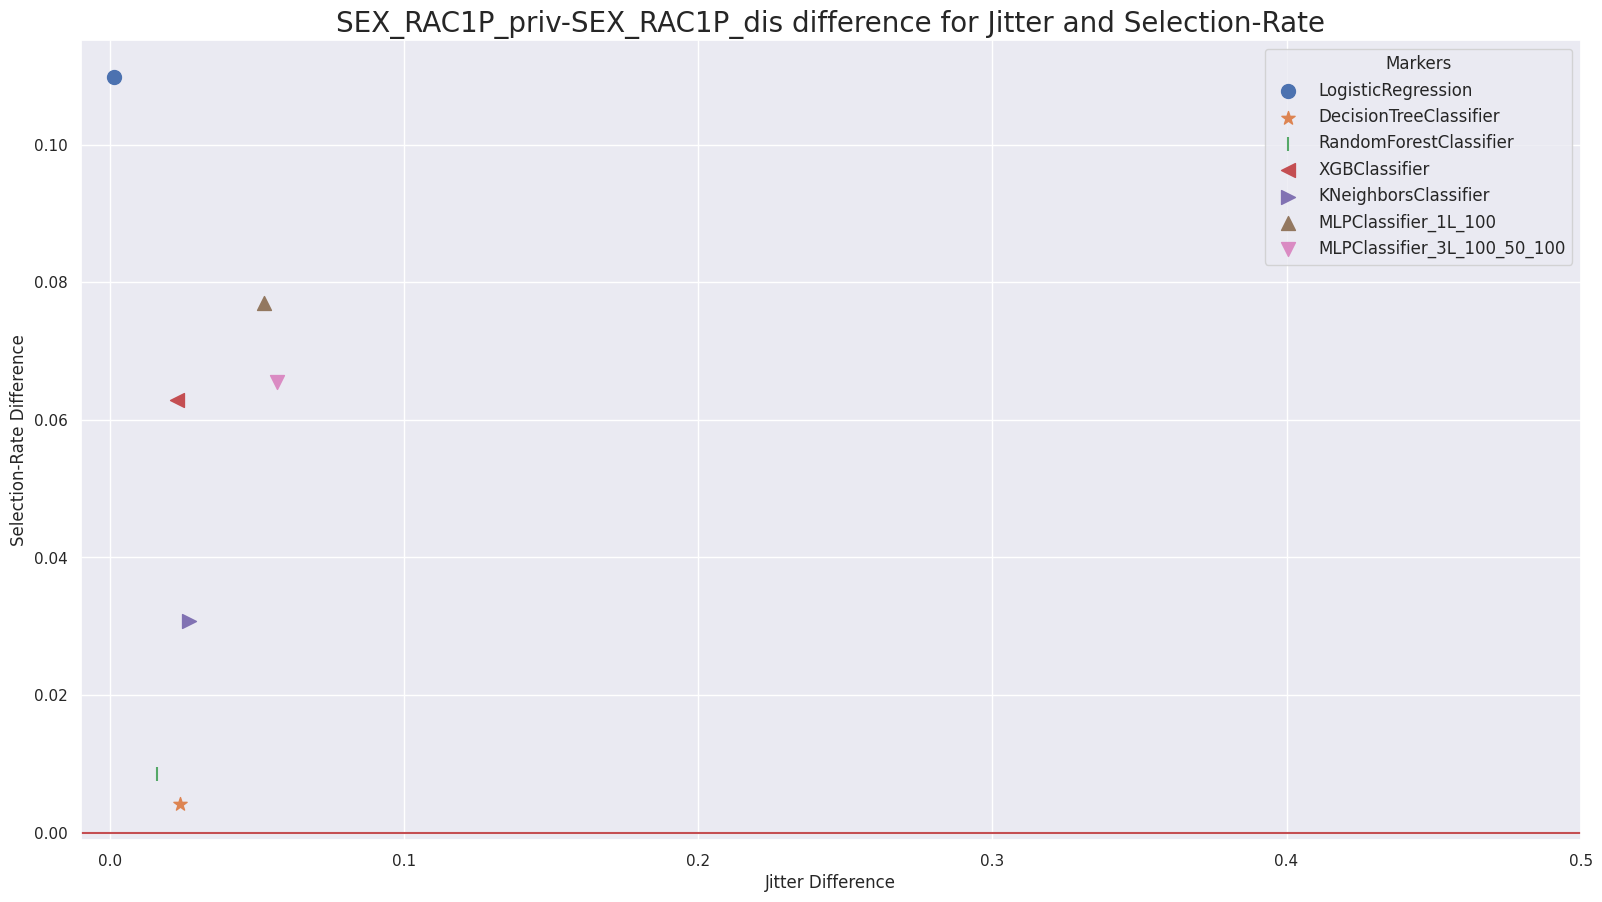

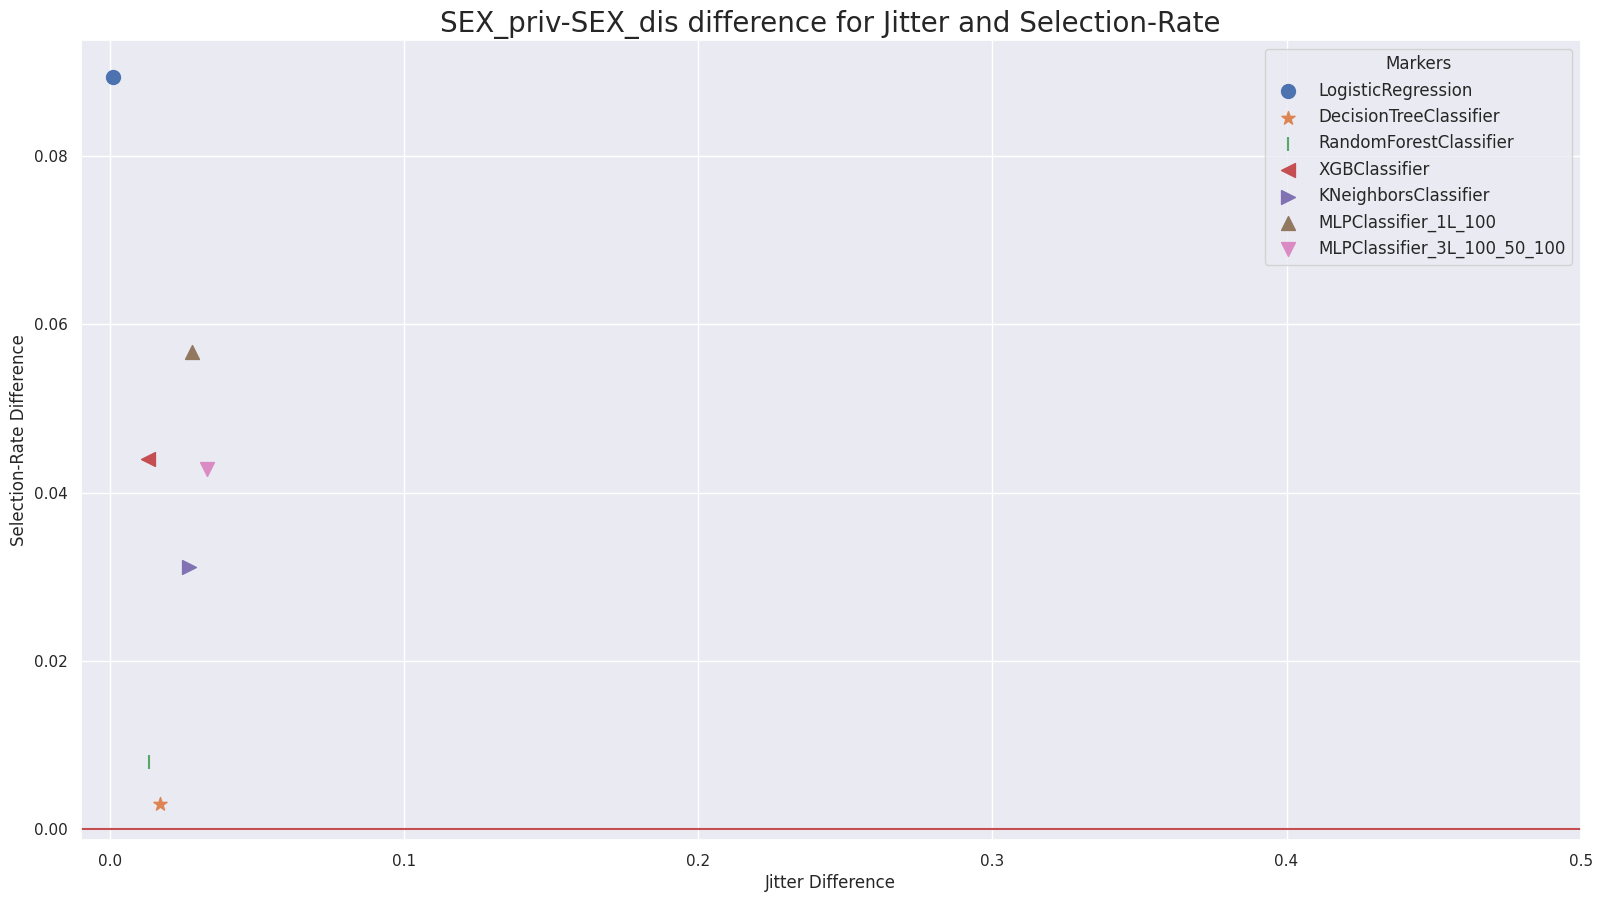

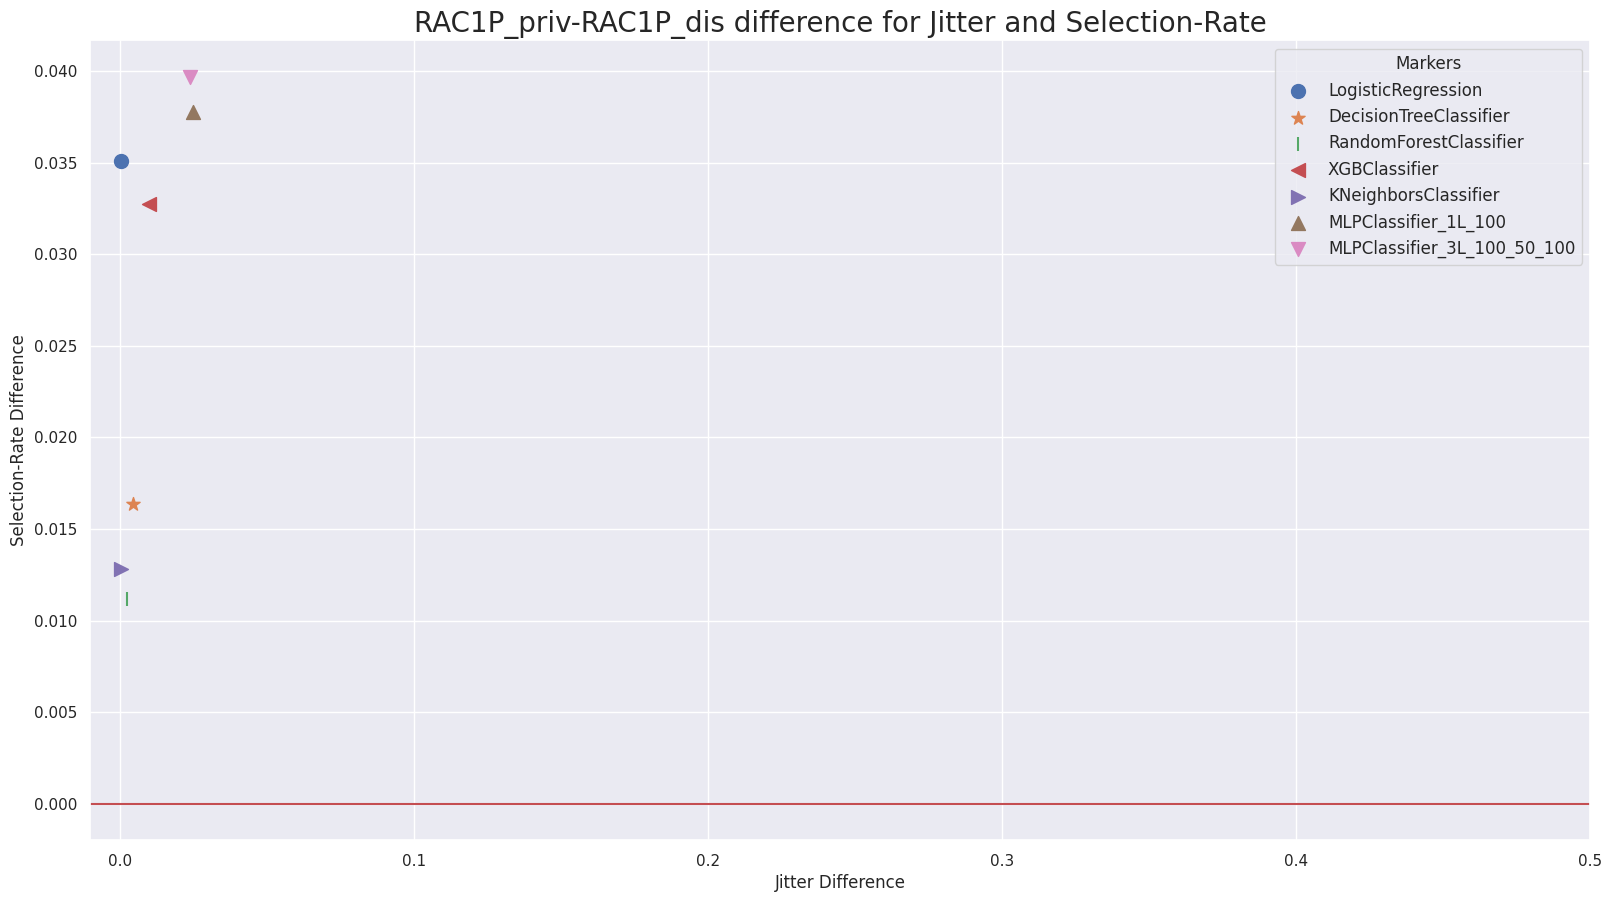

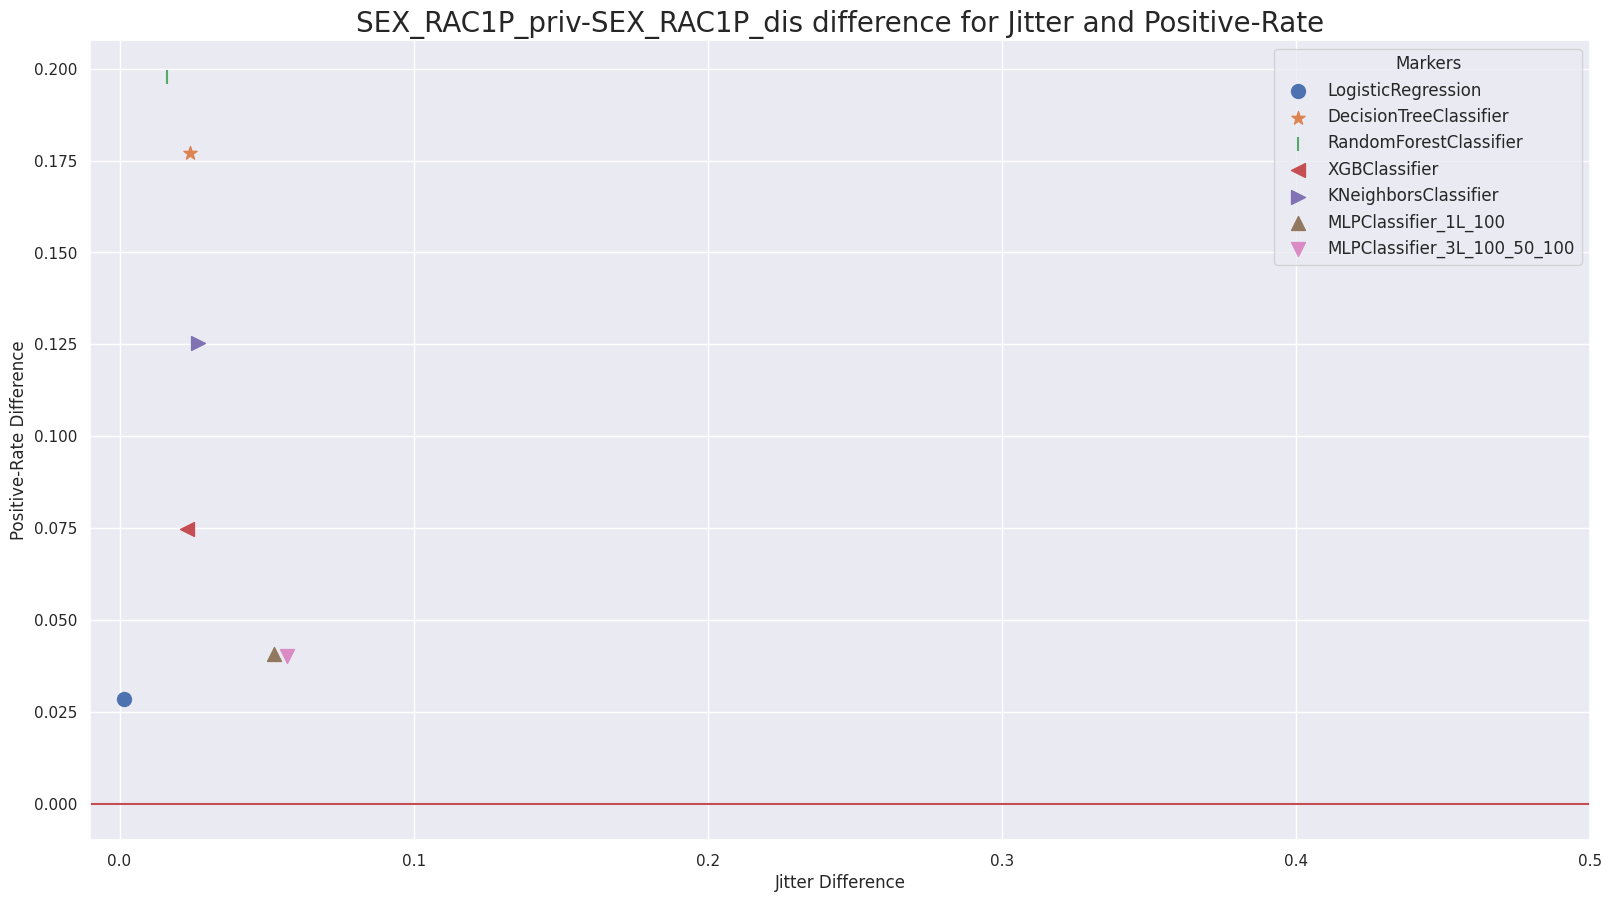

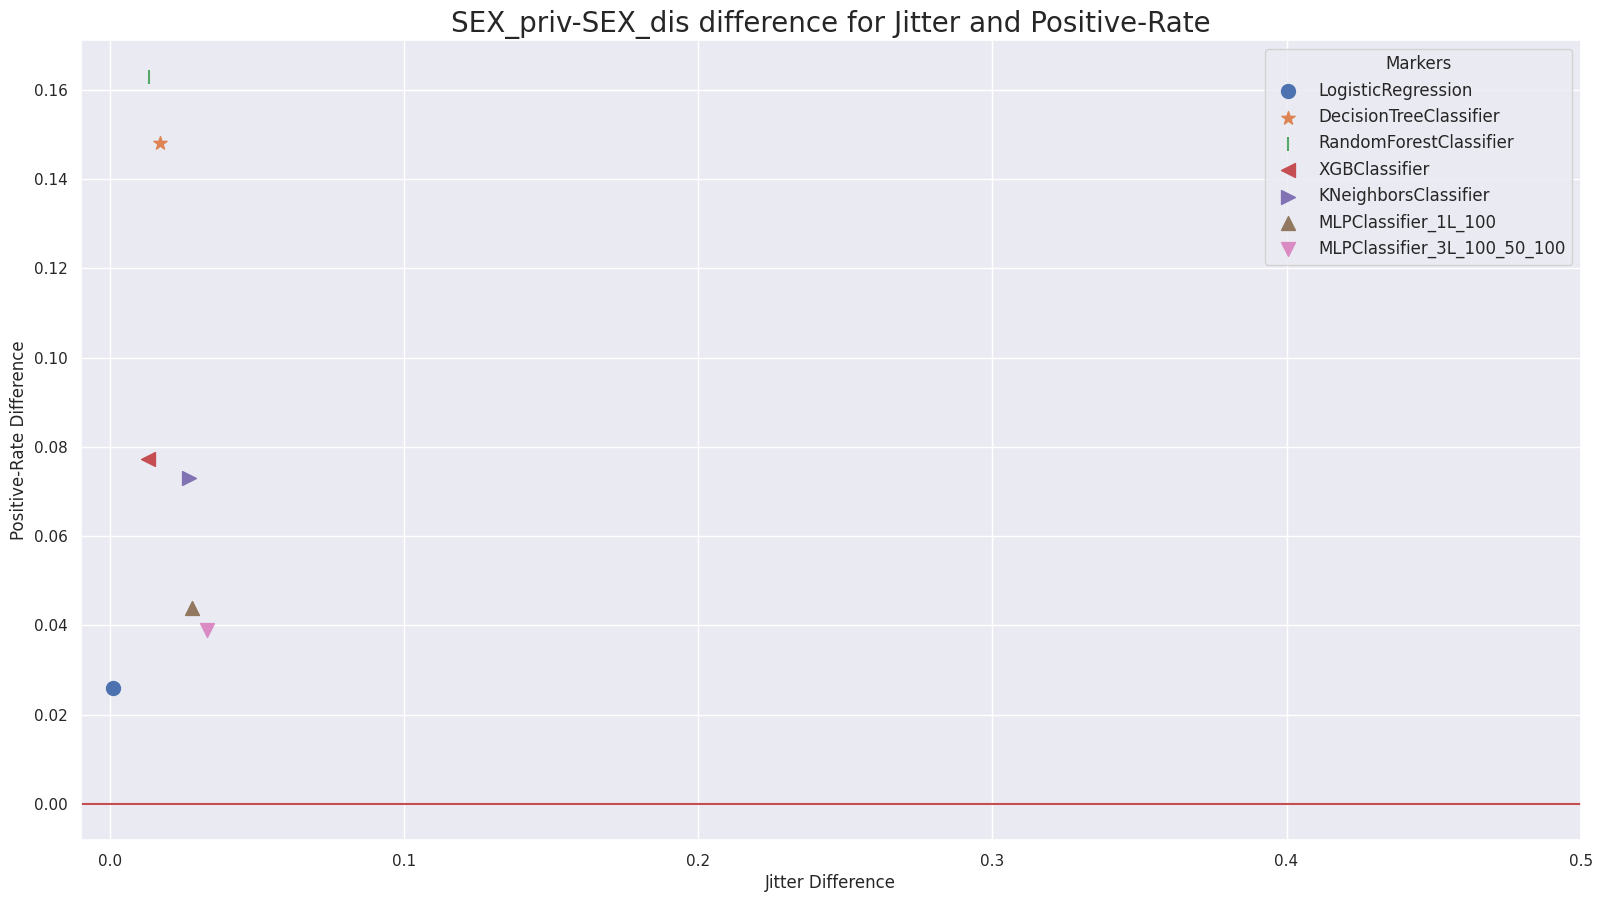

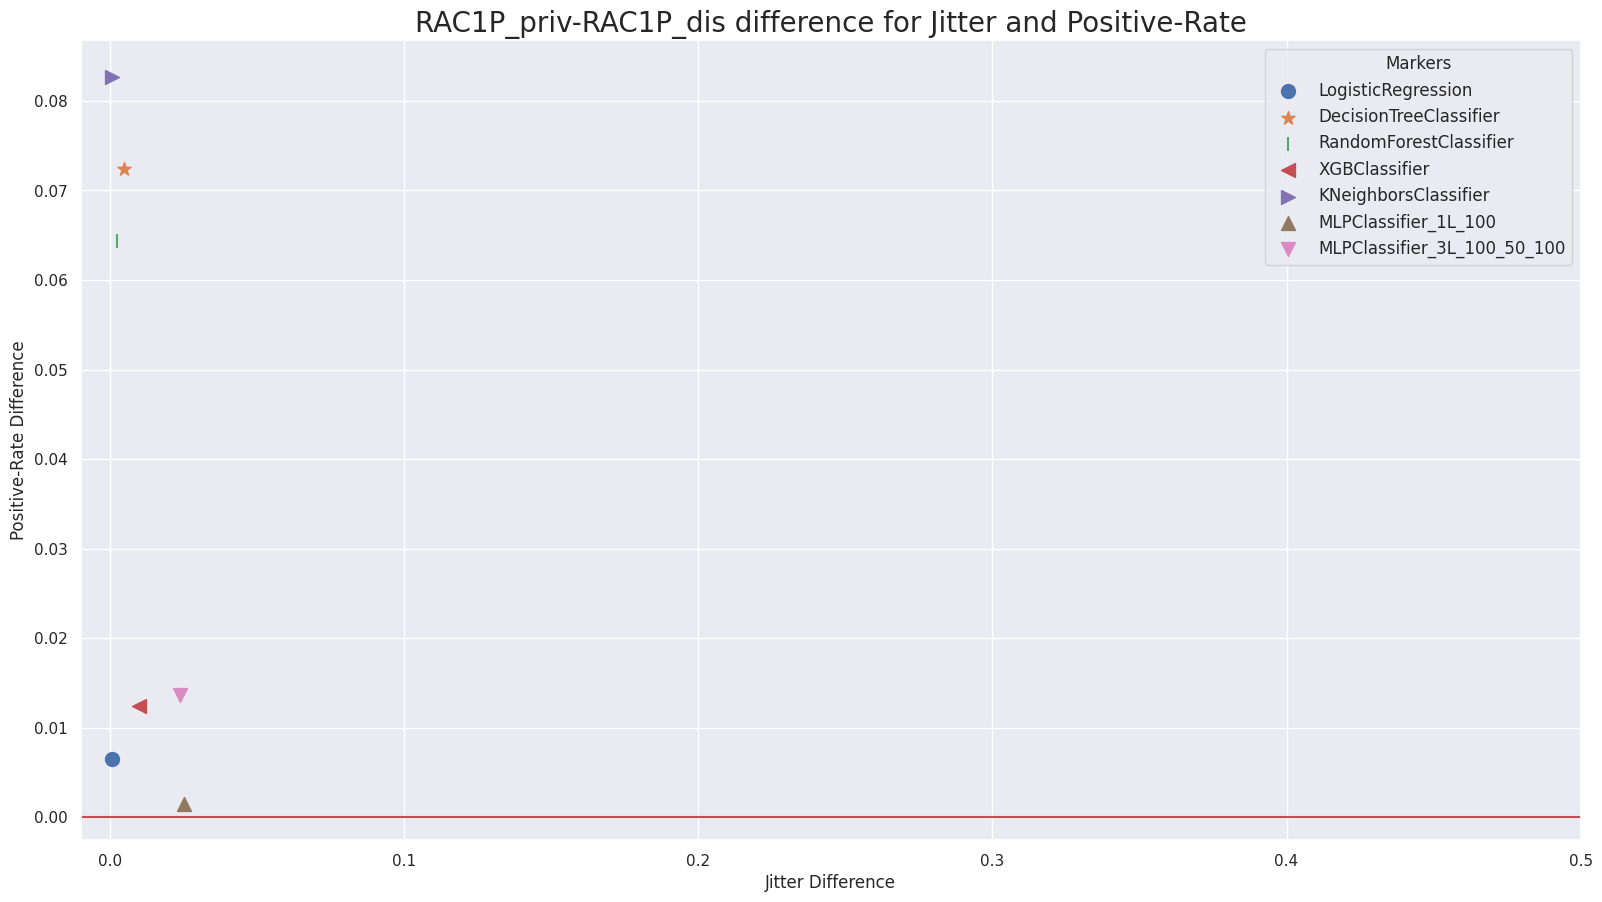

In [97]:
visualize_fairness_metrics_for_prediction_metric(models_average_results_dct,
                                                 x_metric='Jitter',
                                                 y_metrics=['TPR', 'Accuracy', 'F1', 'Selection-Rate', 'Positive-Rate'])

### STD

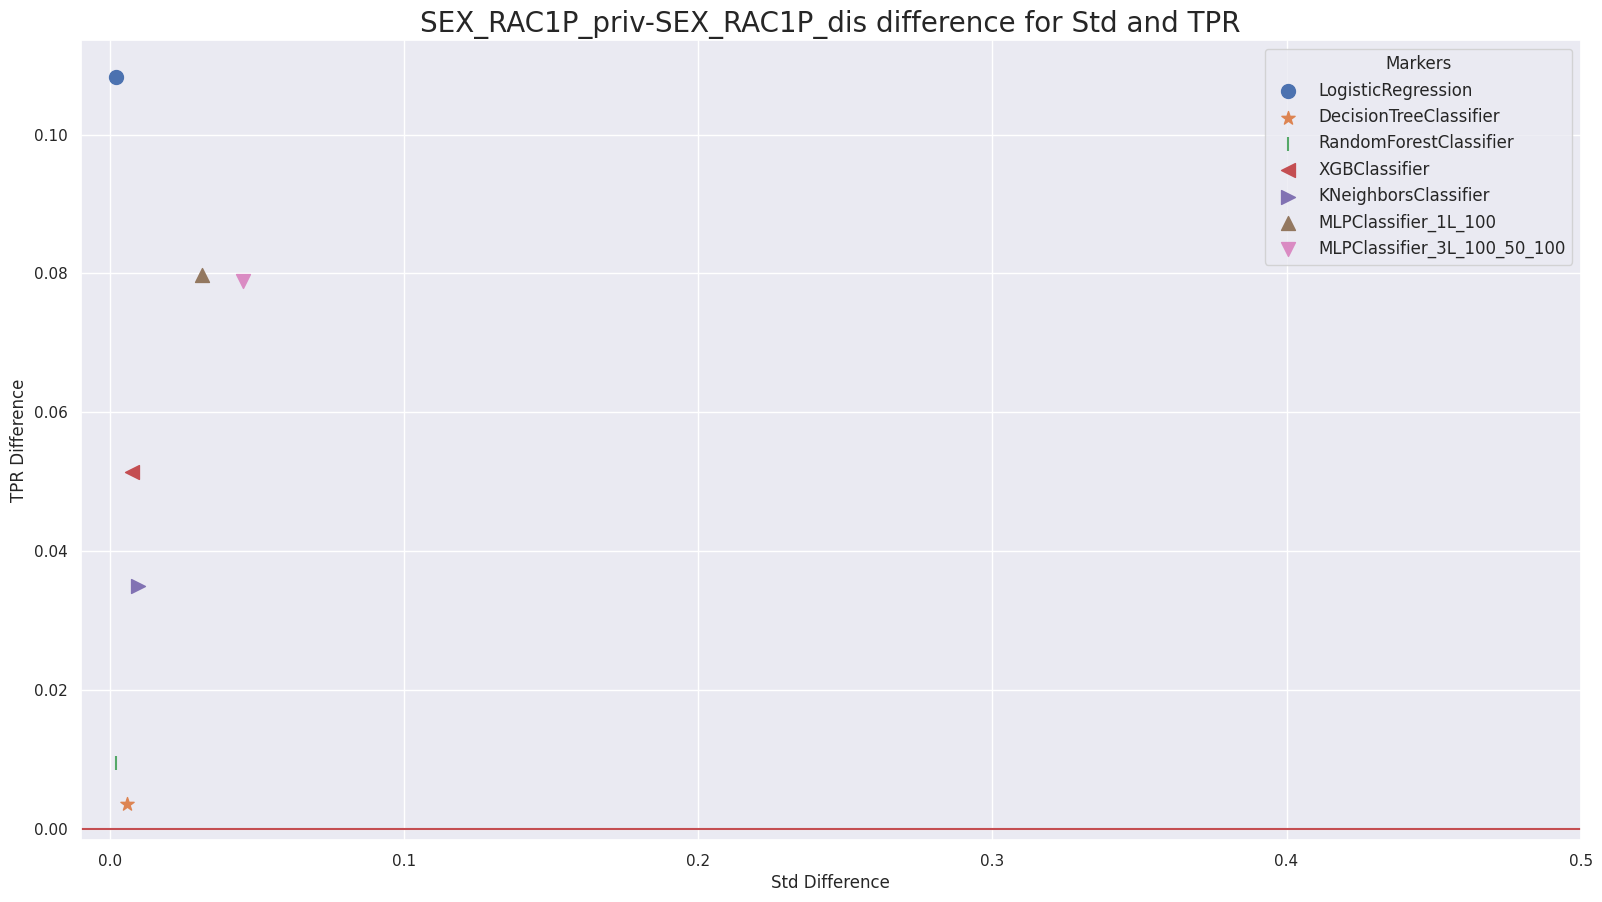

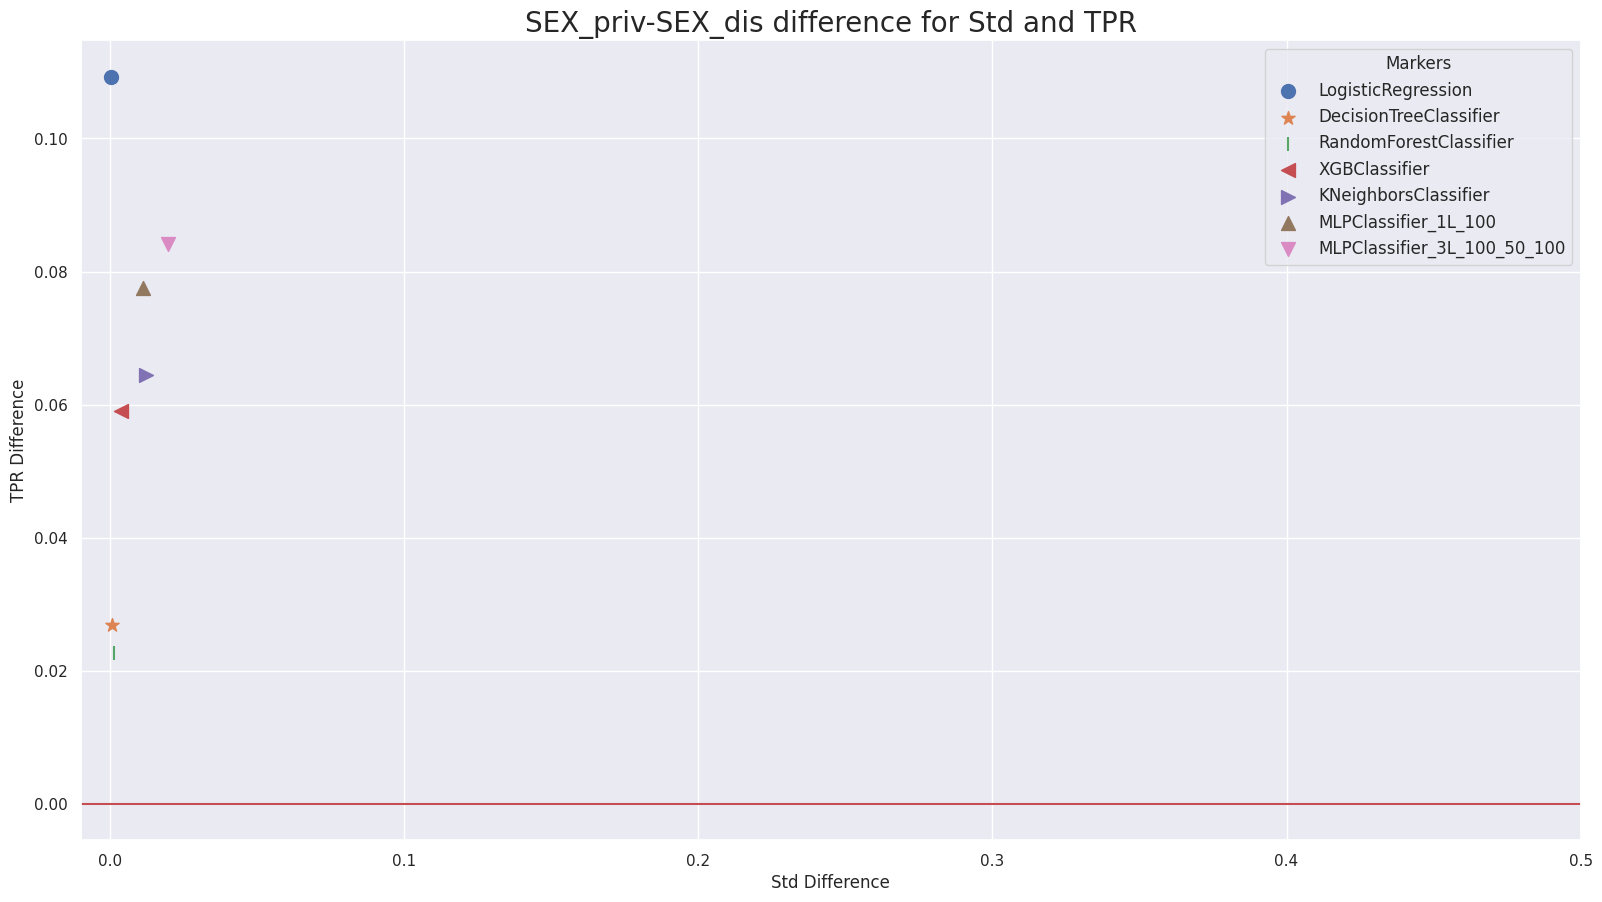

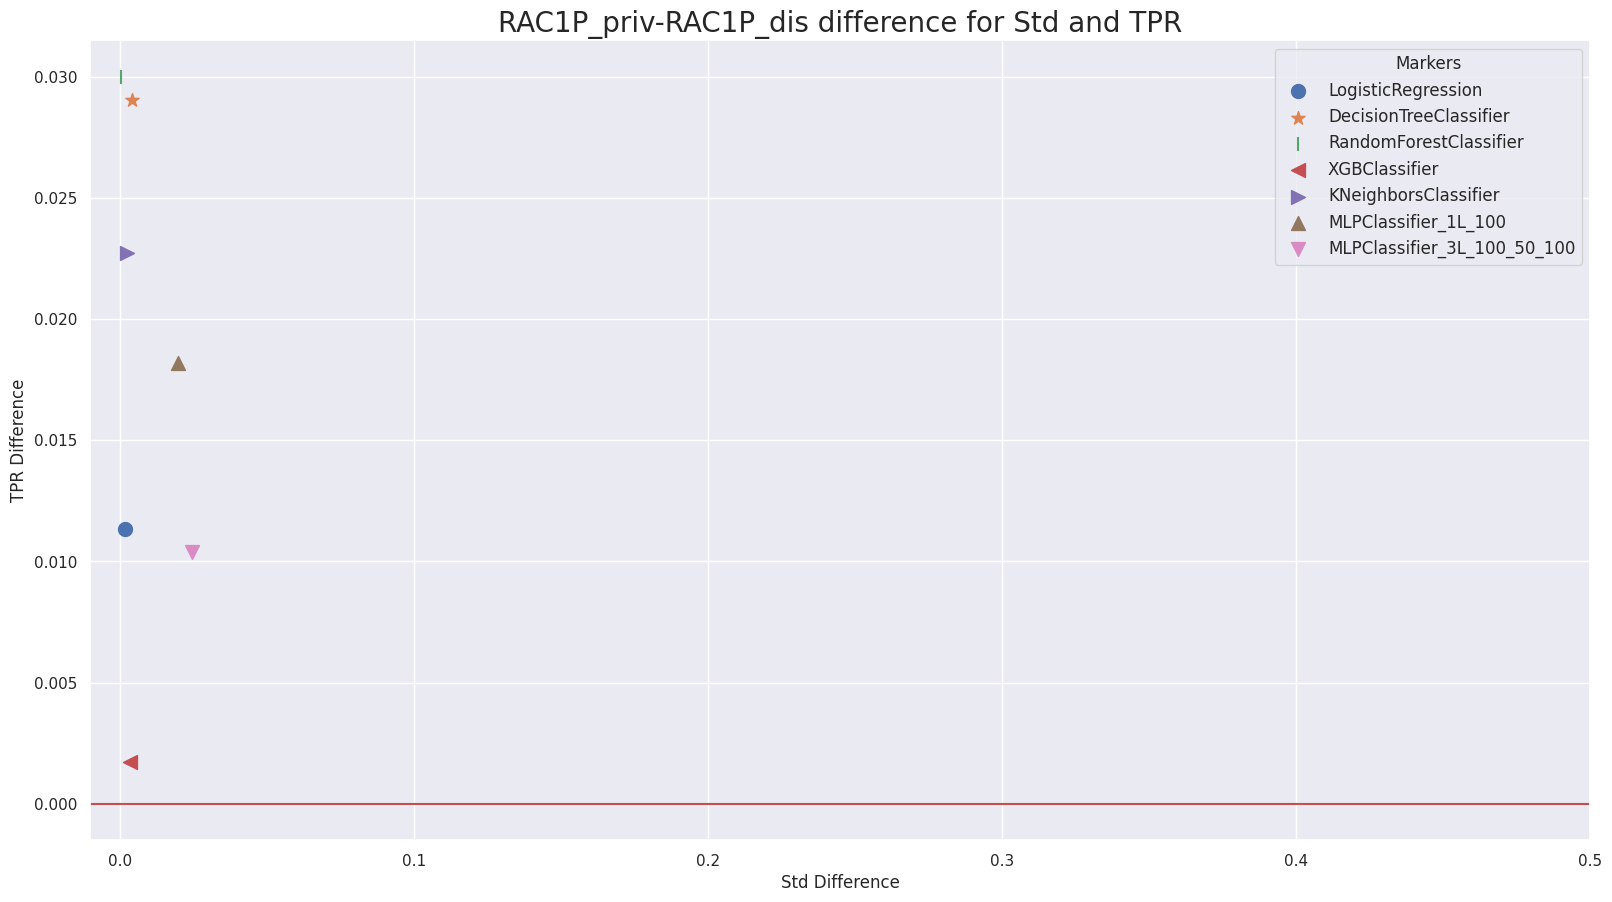

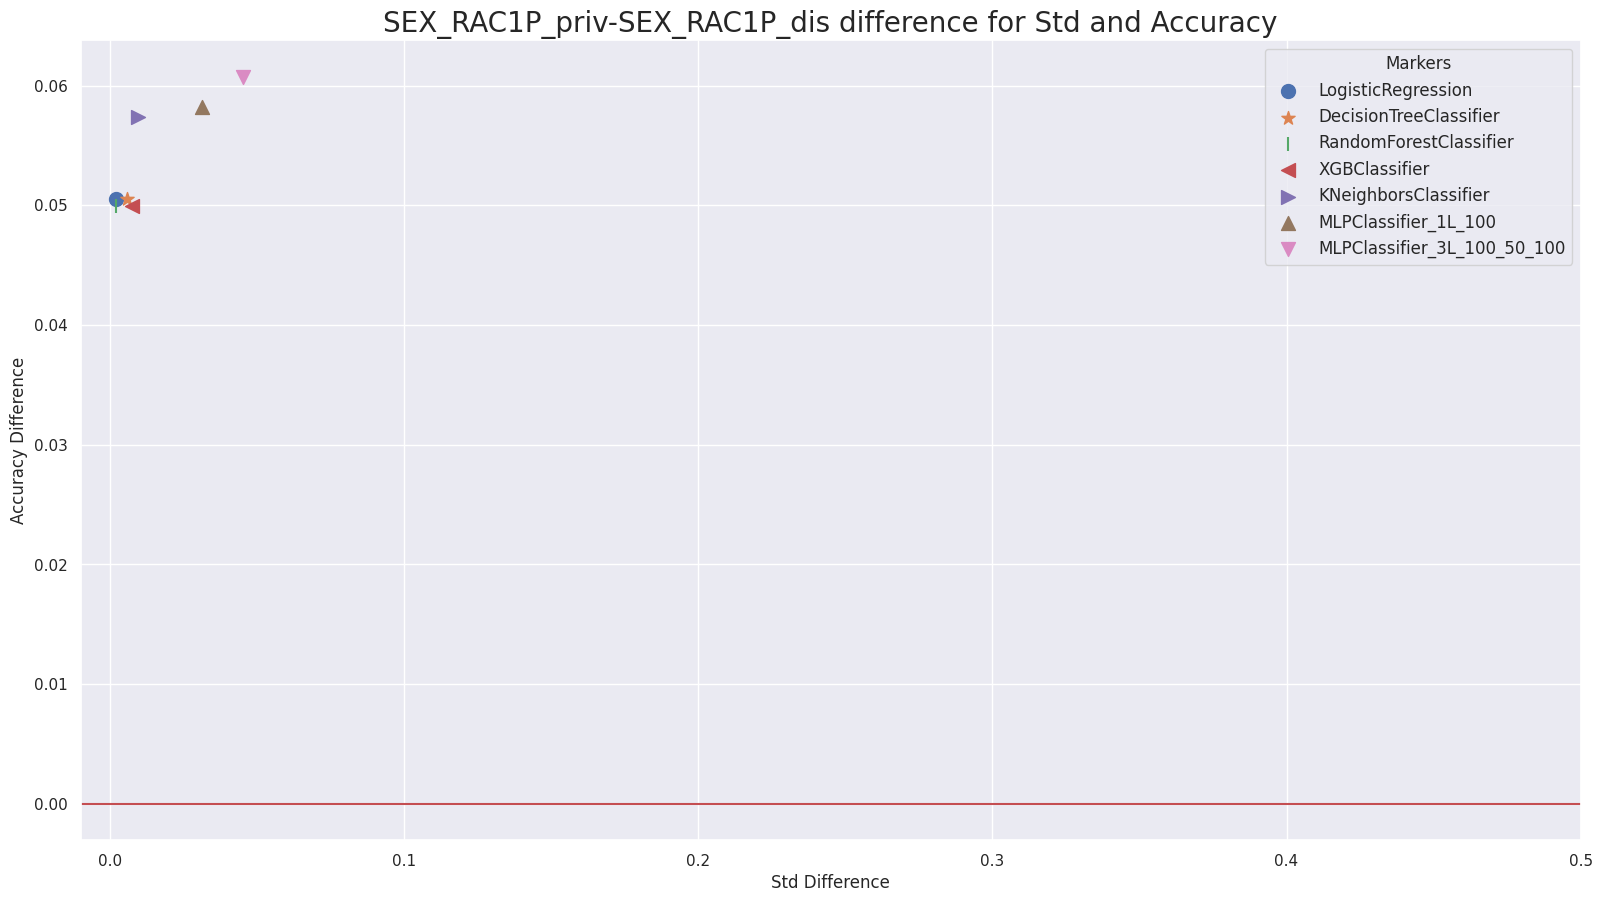

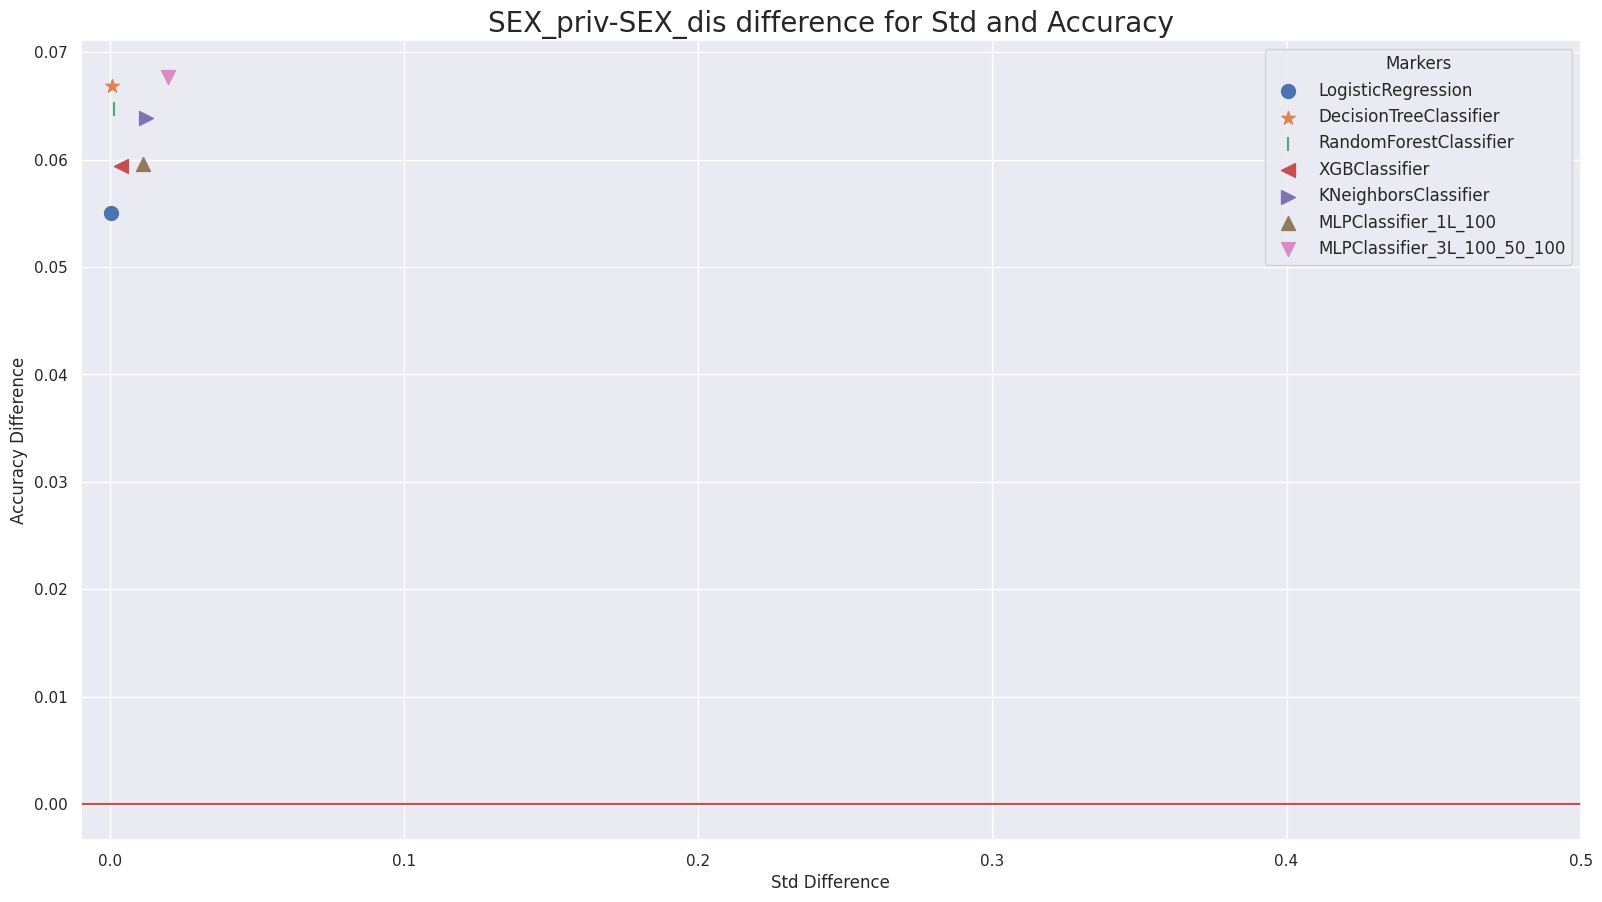

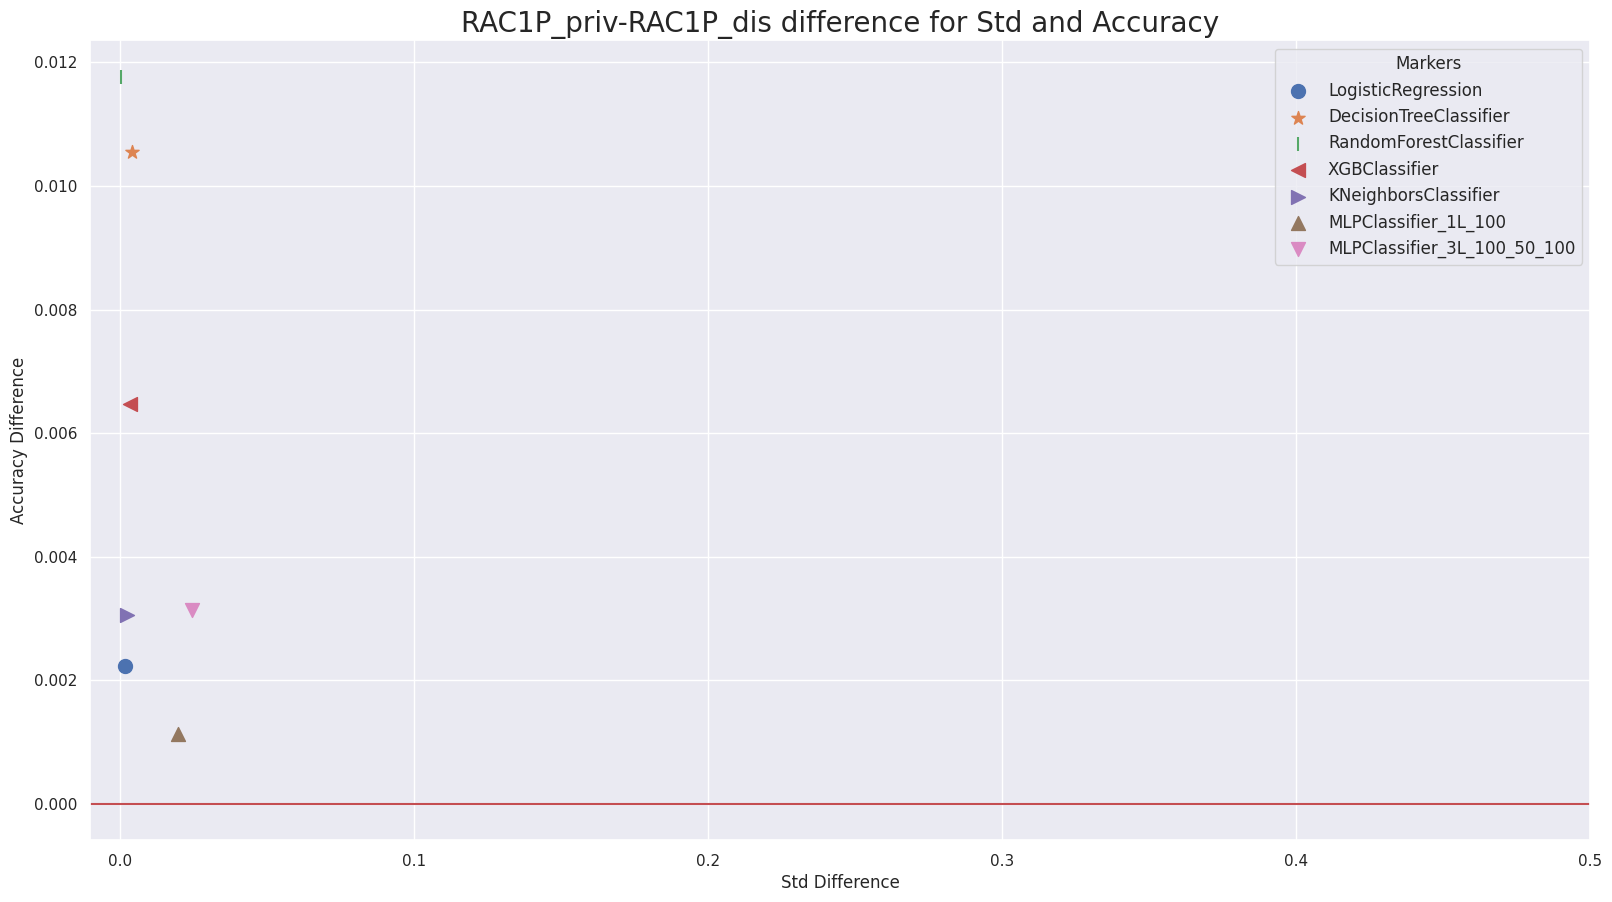

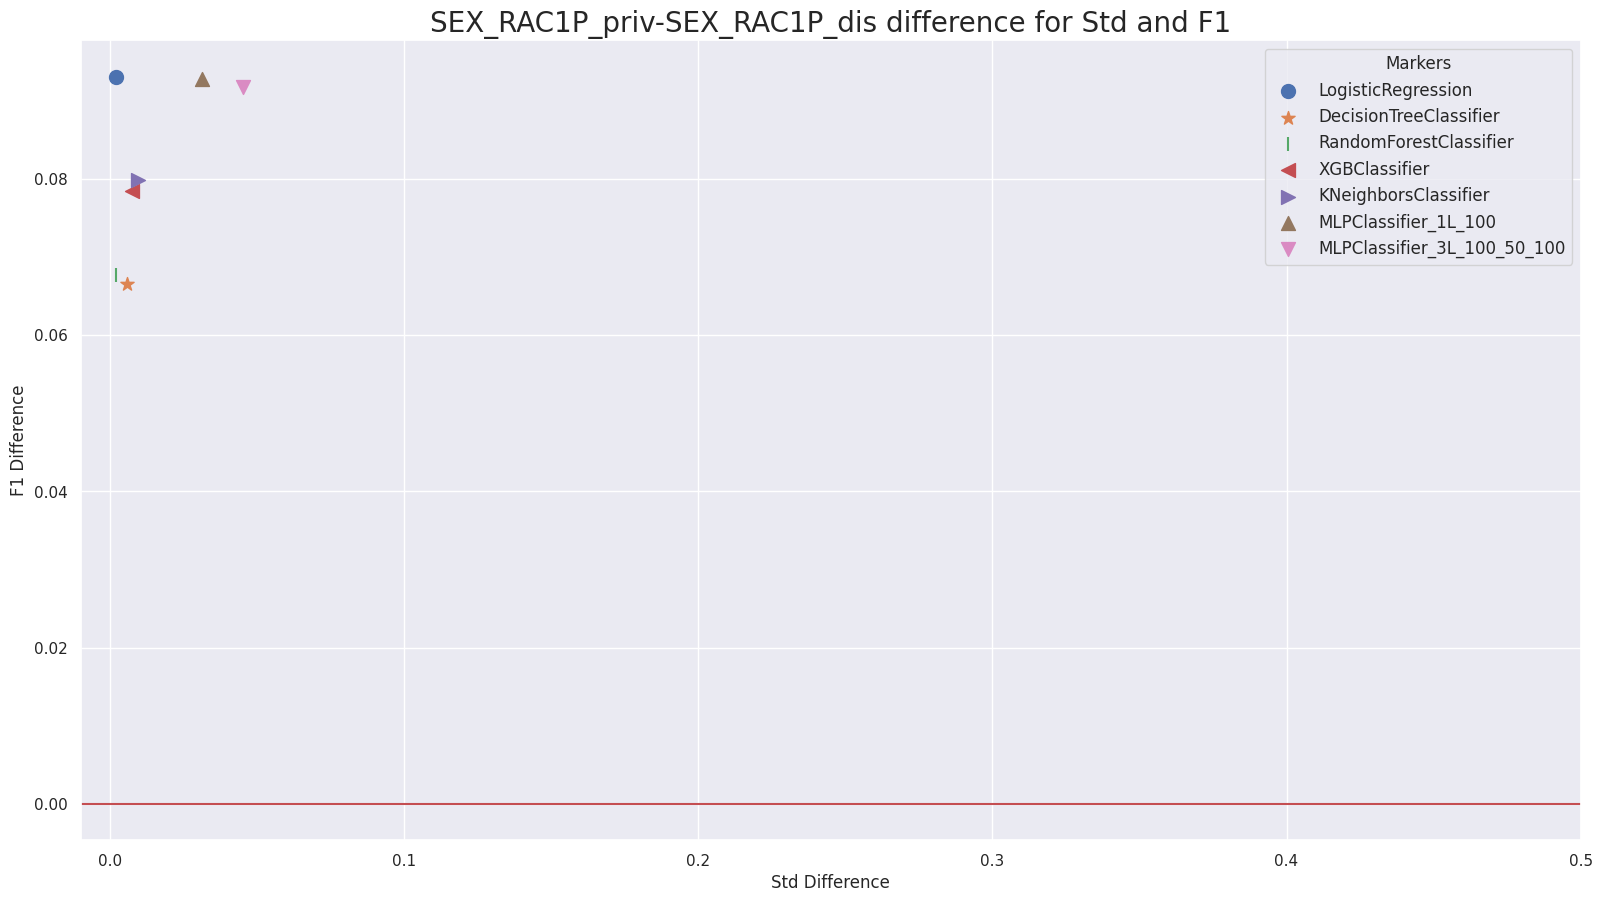

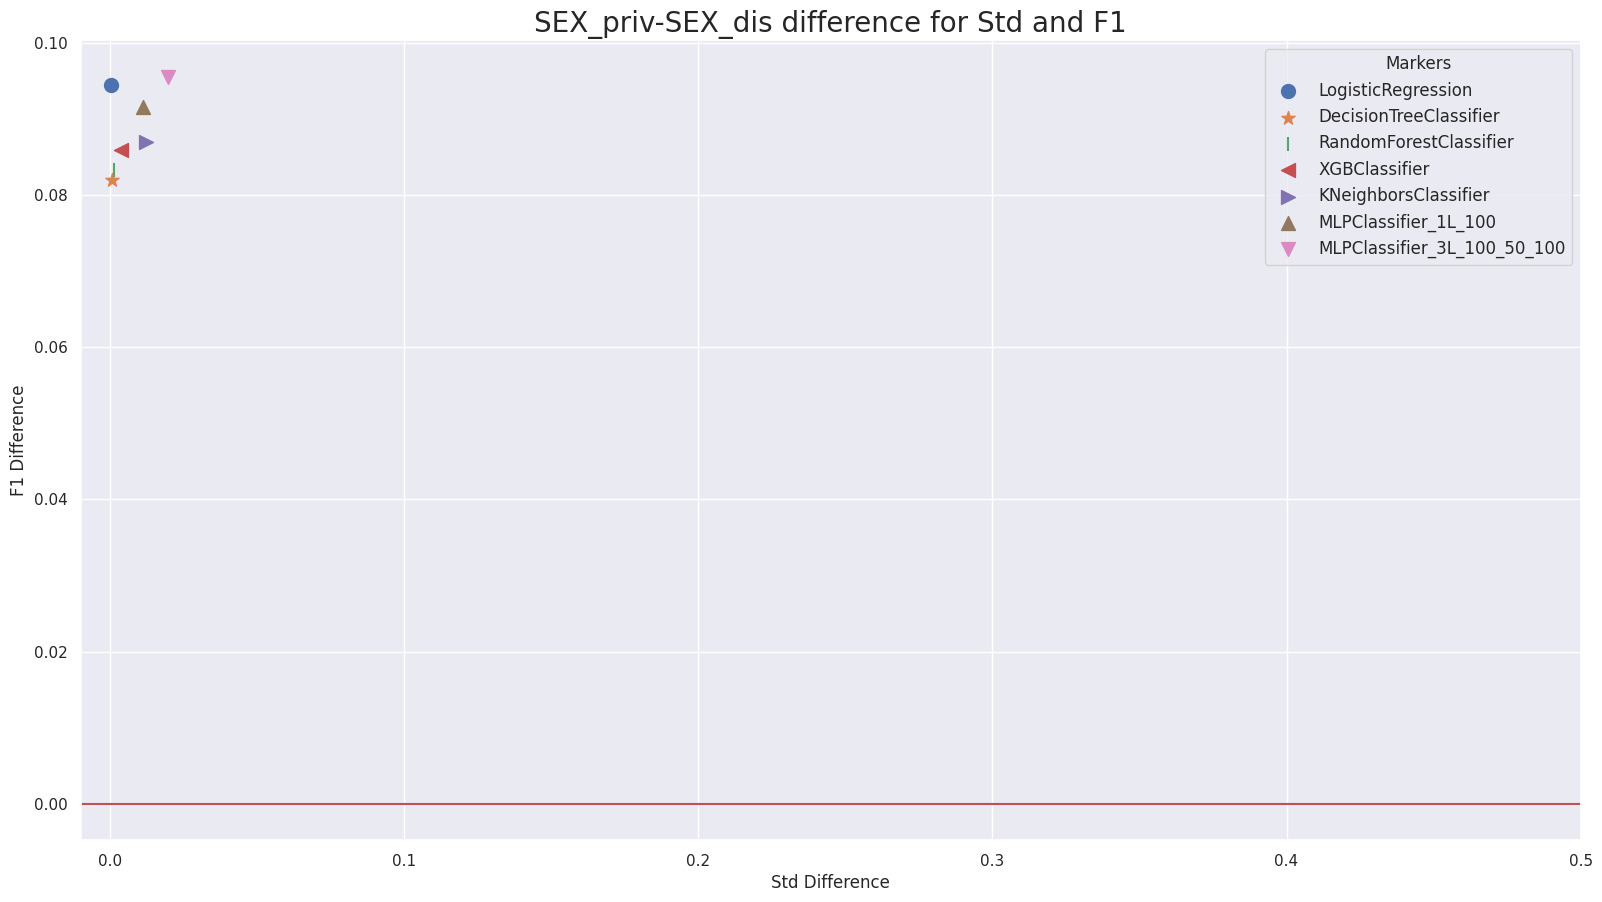

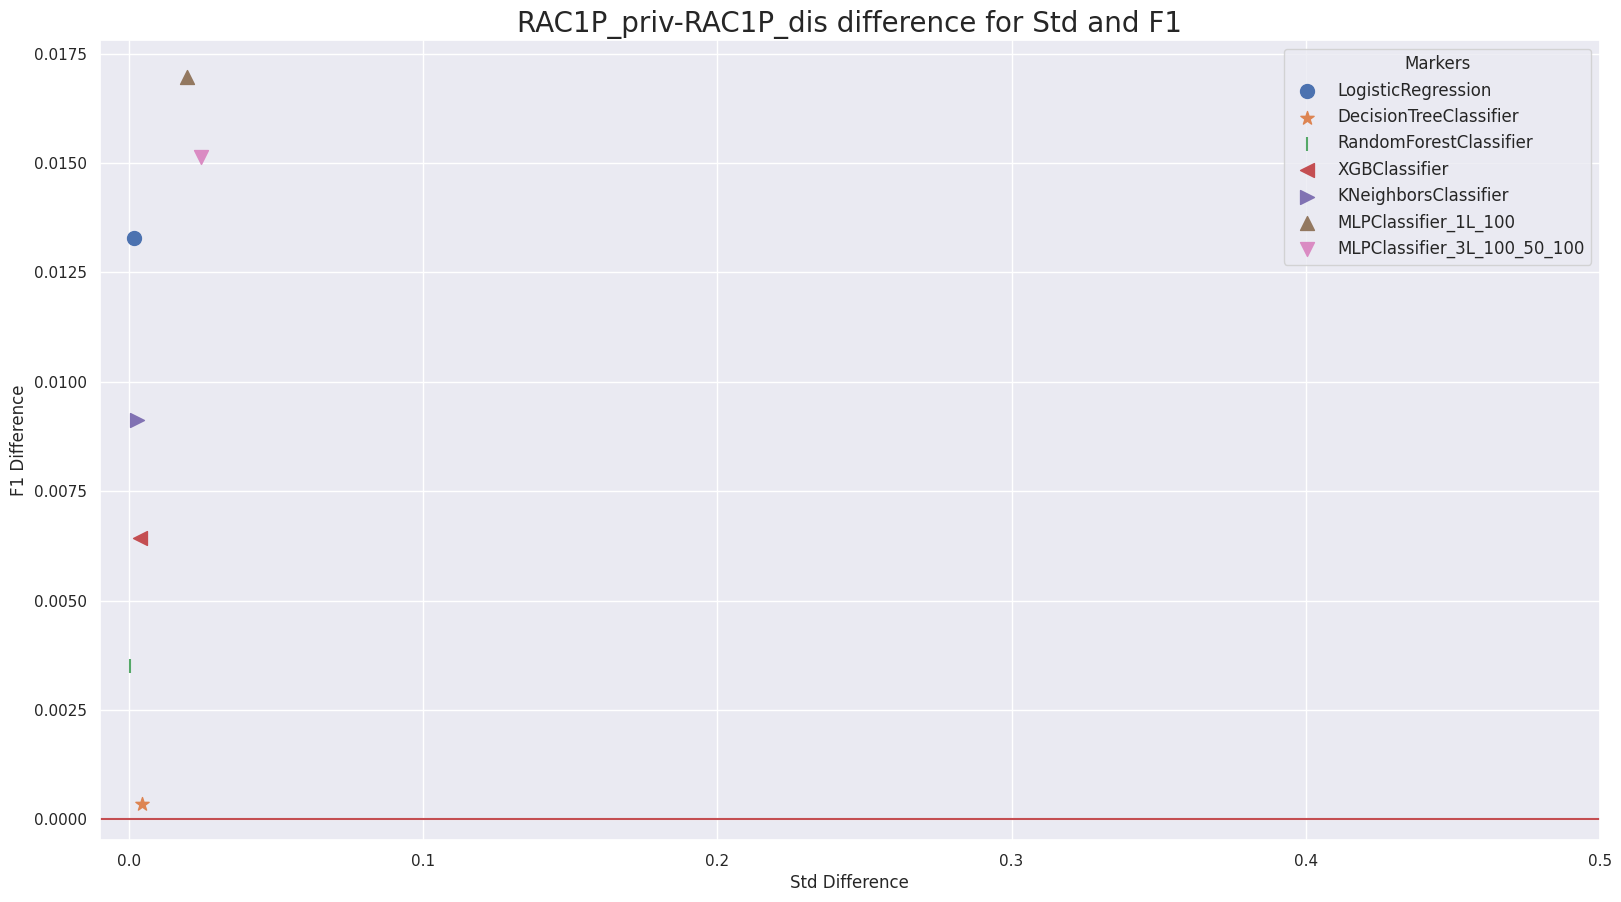

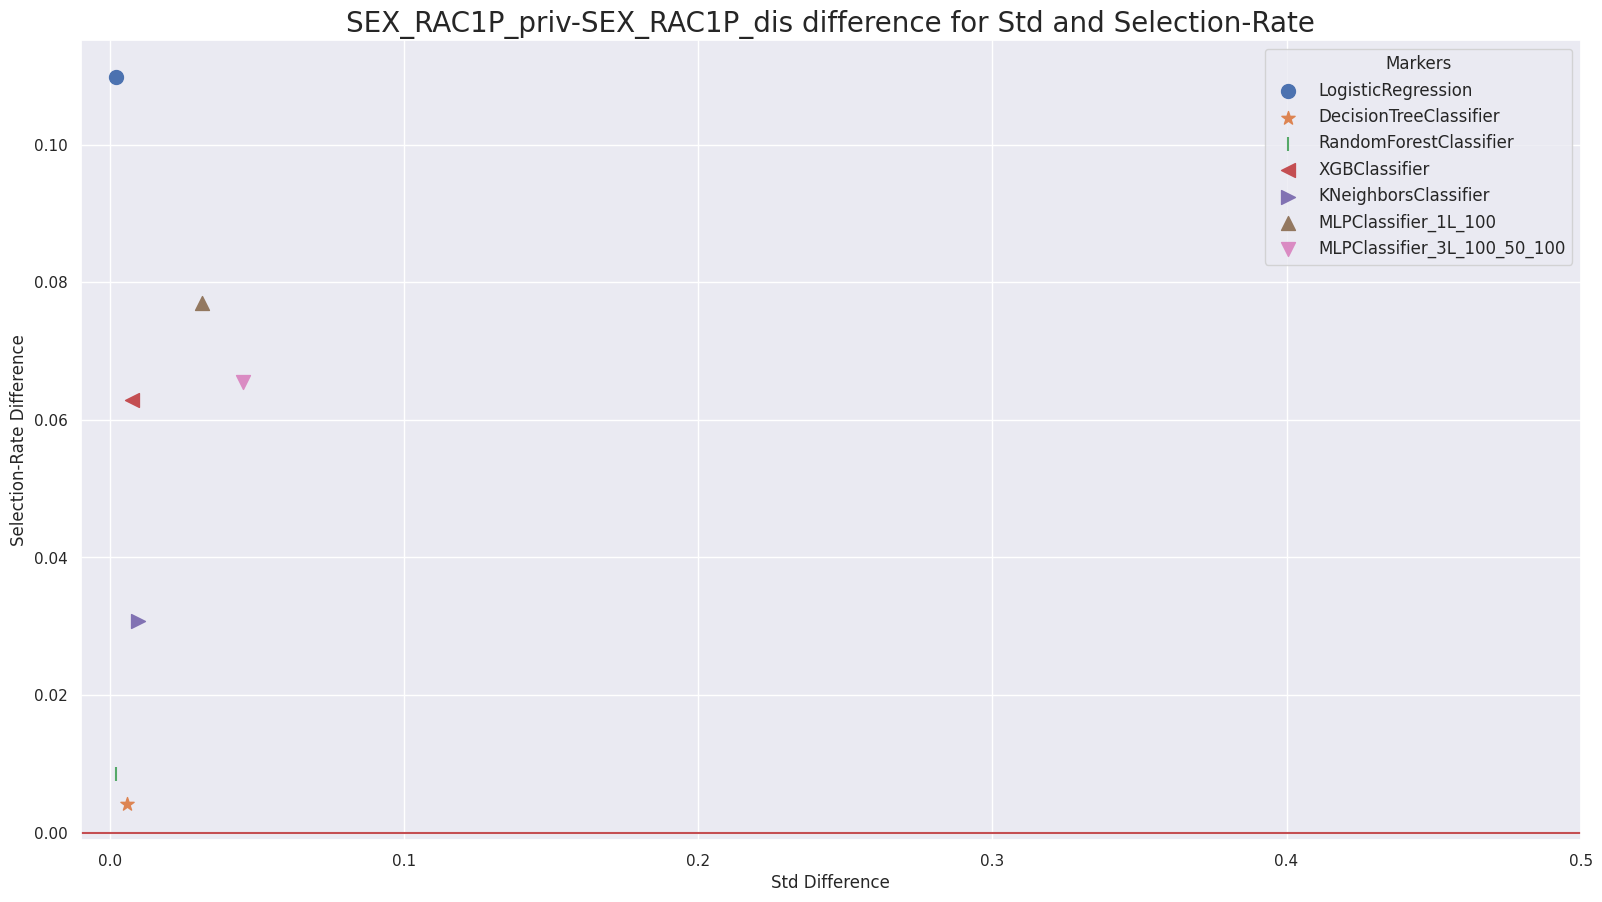

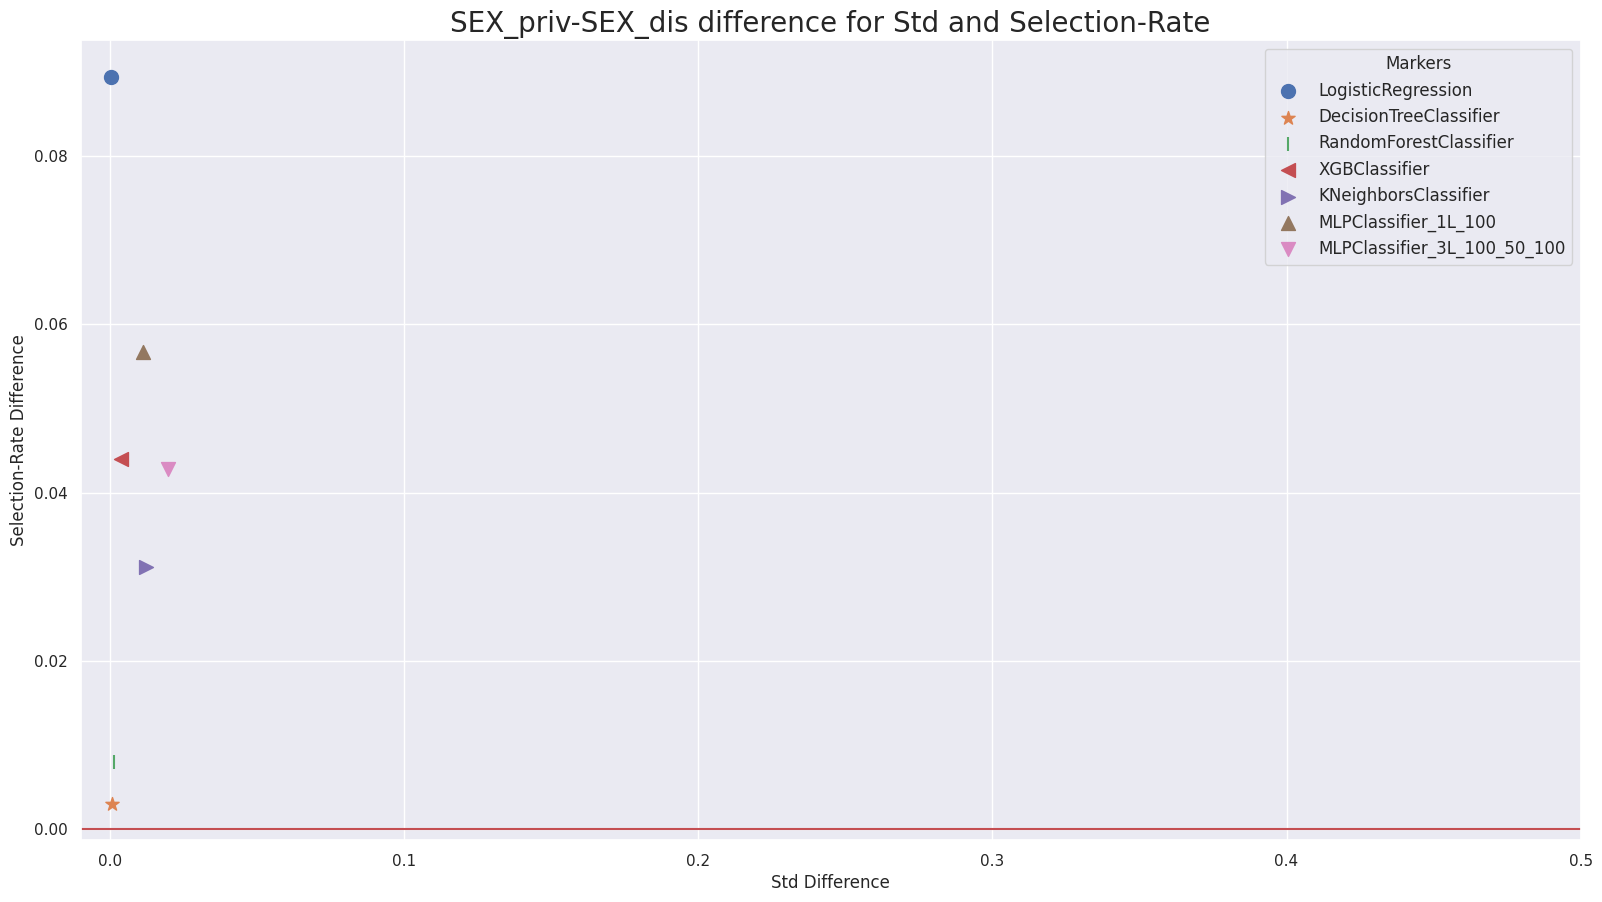

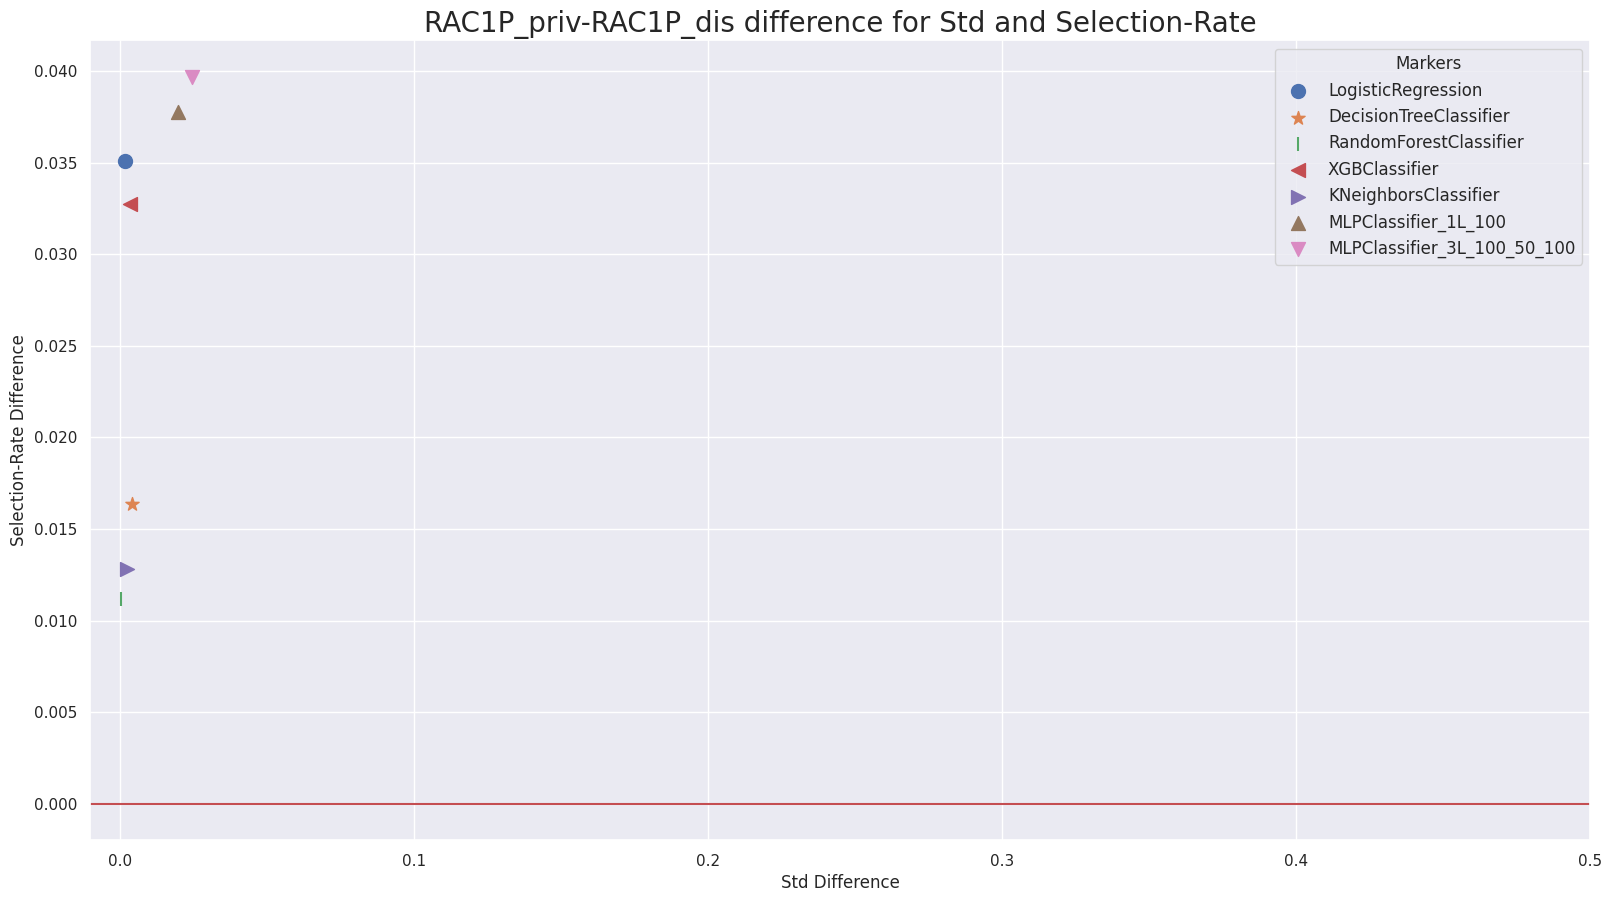

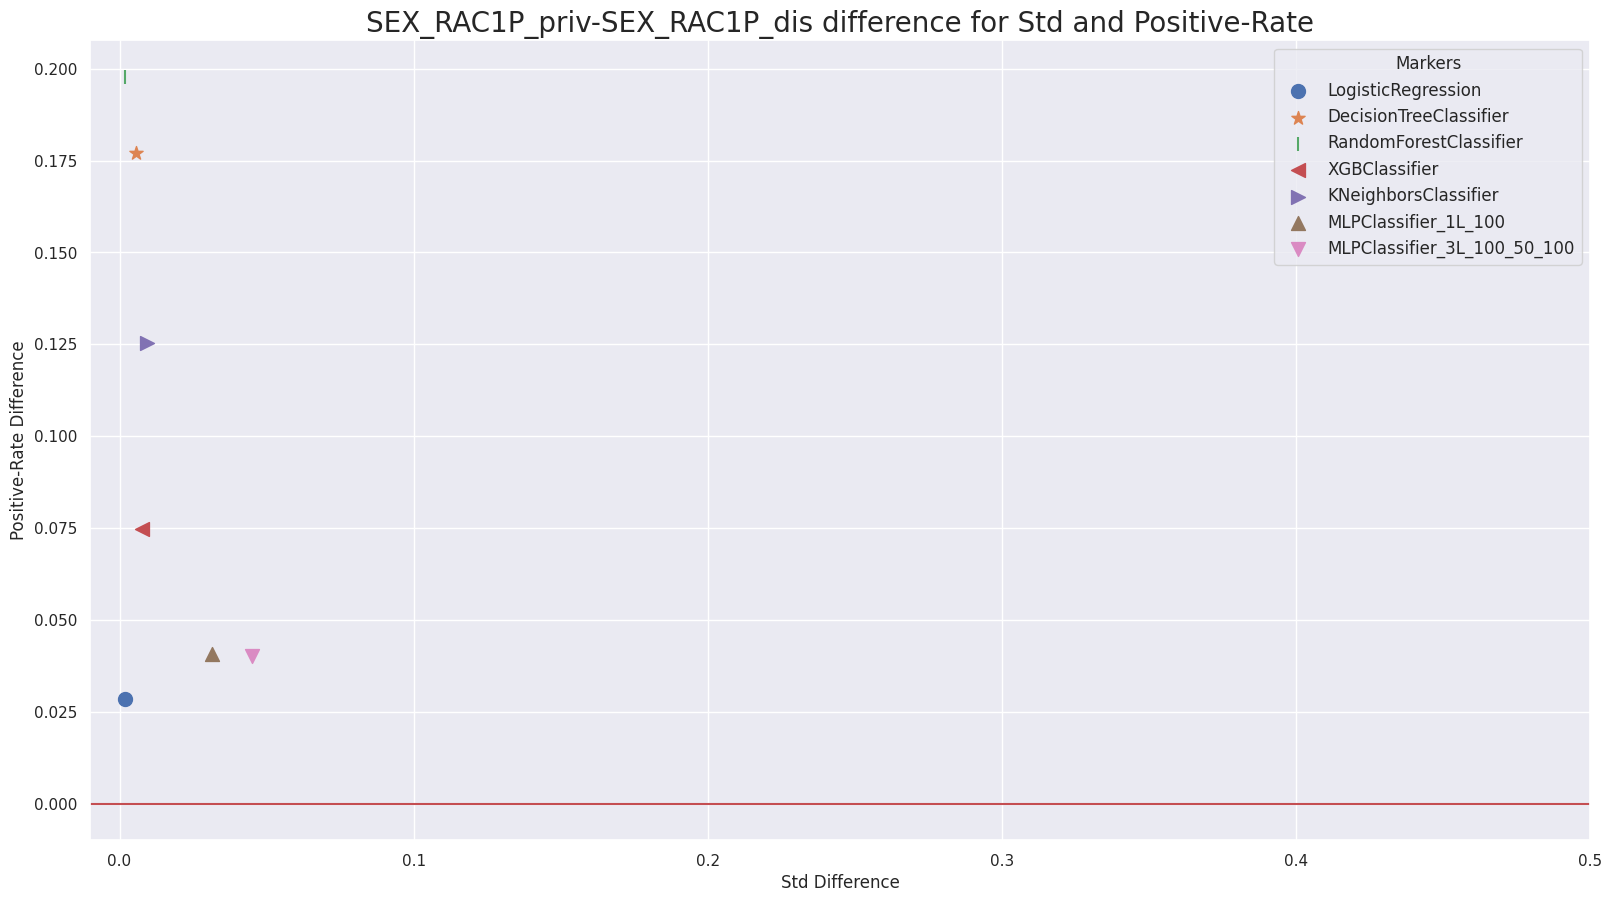

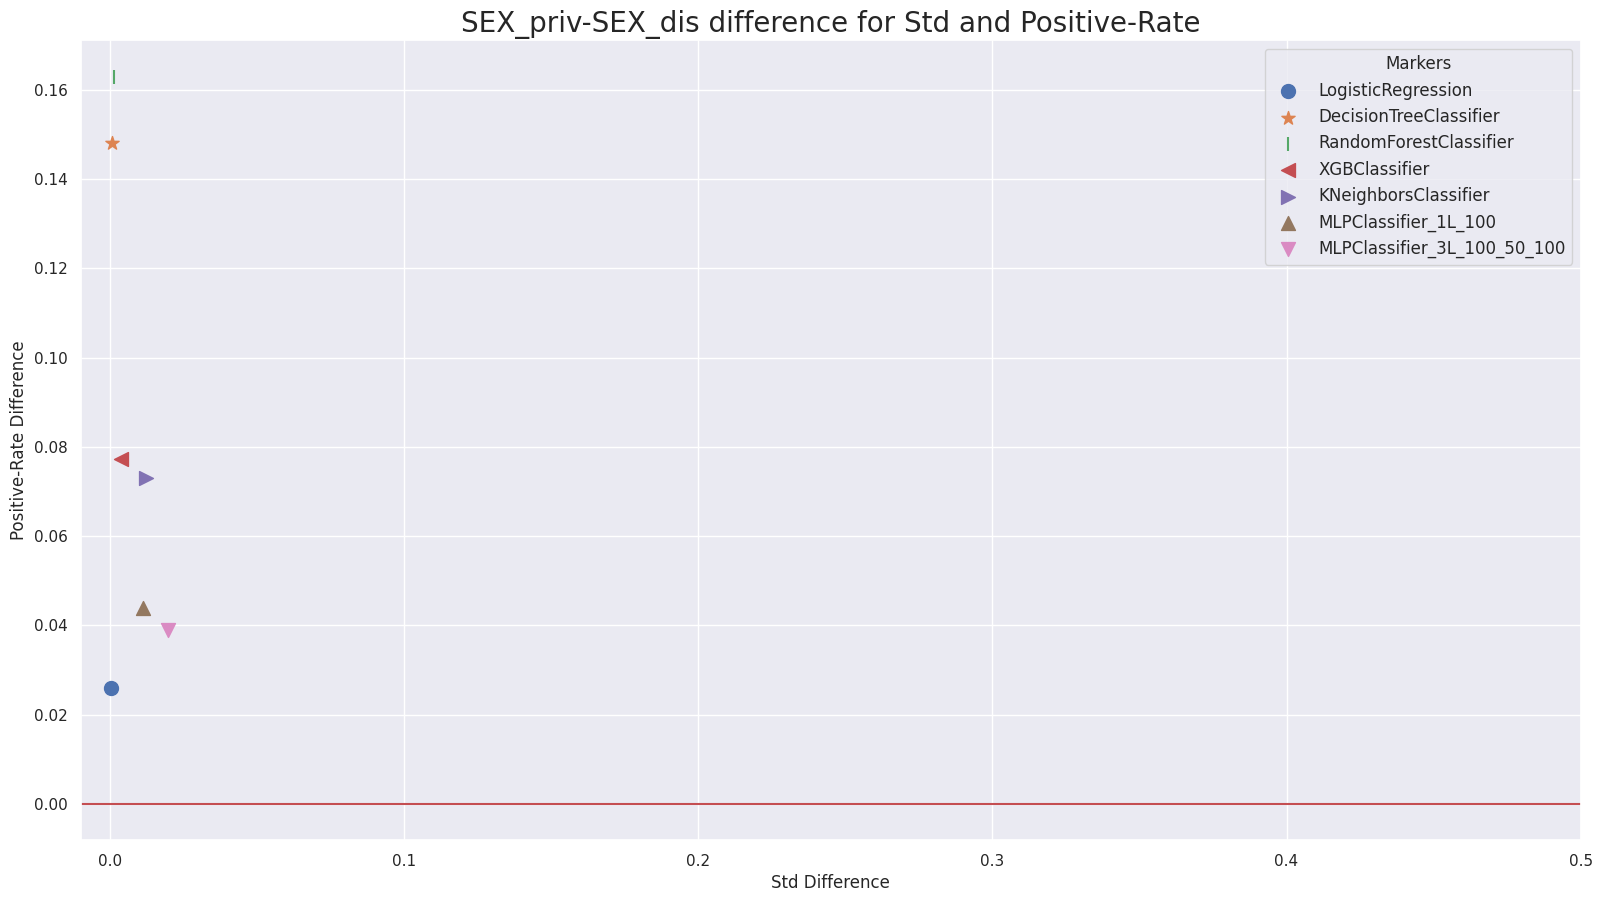

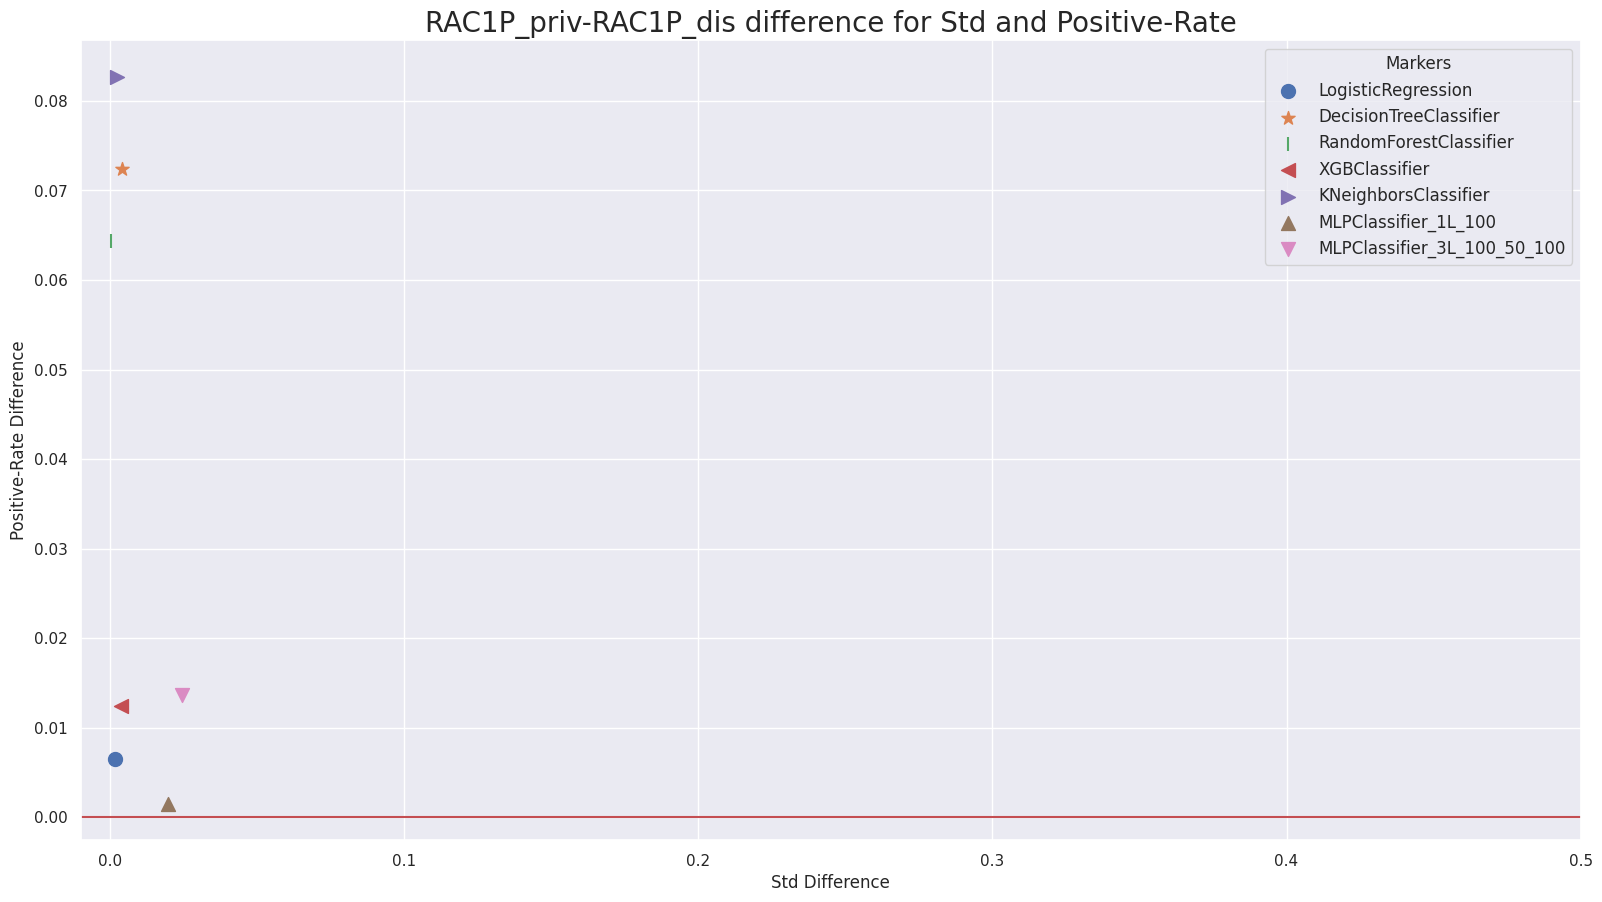

In [98]:
visualize_fairness_metrics_for_prediction_metric(models_average_results_dct,
                                                 x_metric='Std',
                                                 y_metrics=['TPR', 'Accuracy', 'F1', 'Selection-Rate', 'Positive-Rate'])